# Machine-Intelligence-Watanebe

A machine intelligence that uses HTM to memorize music in associative memory.

In [1]:
from music21 import *

inputMidi = converter.parse('./data/NorwegianWood.mid')
parseMidi = inputMidi.parts[1].recurse()
pitch = []
quarterLength = []
for element in parseMidi:
    if isinstance(element, note.Note):
        pitch.append(int(element.pitch.ps))
        quarterLength.append(float(round(element.quarterLength,6)))

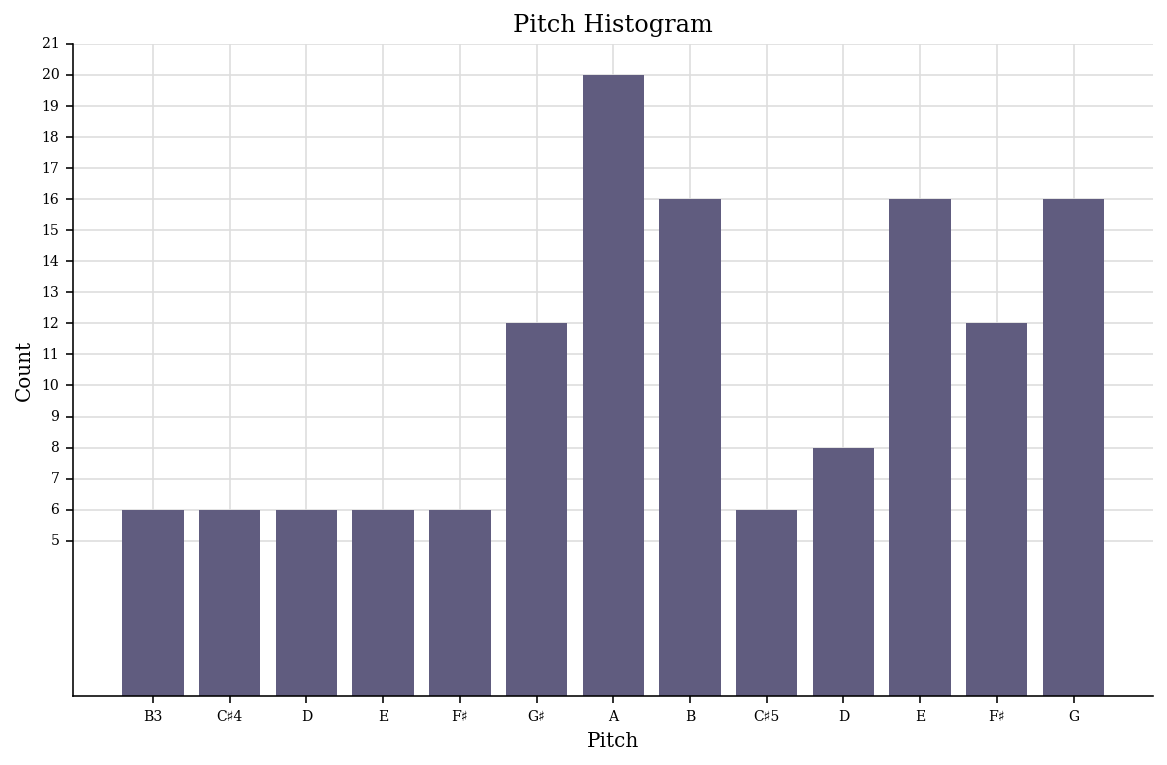

In [2]:
import matplotlib
import matplotlib.pyplot as plt

parseMidi.plot('histogram', 'pitch')
plt.show()

Score of parseMidi.mid


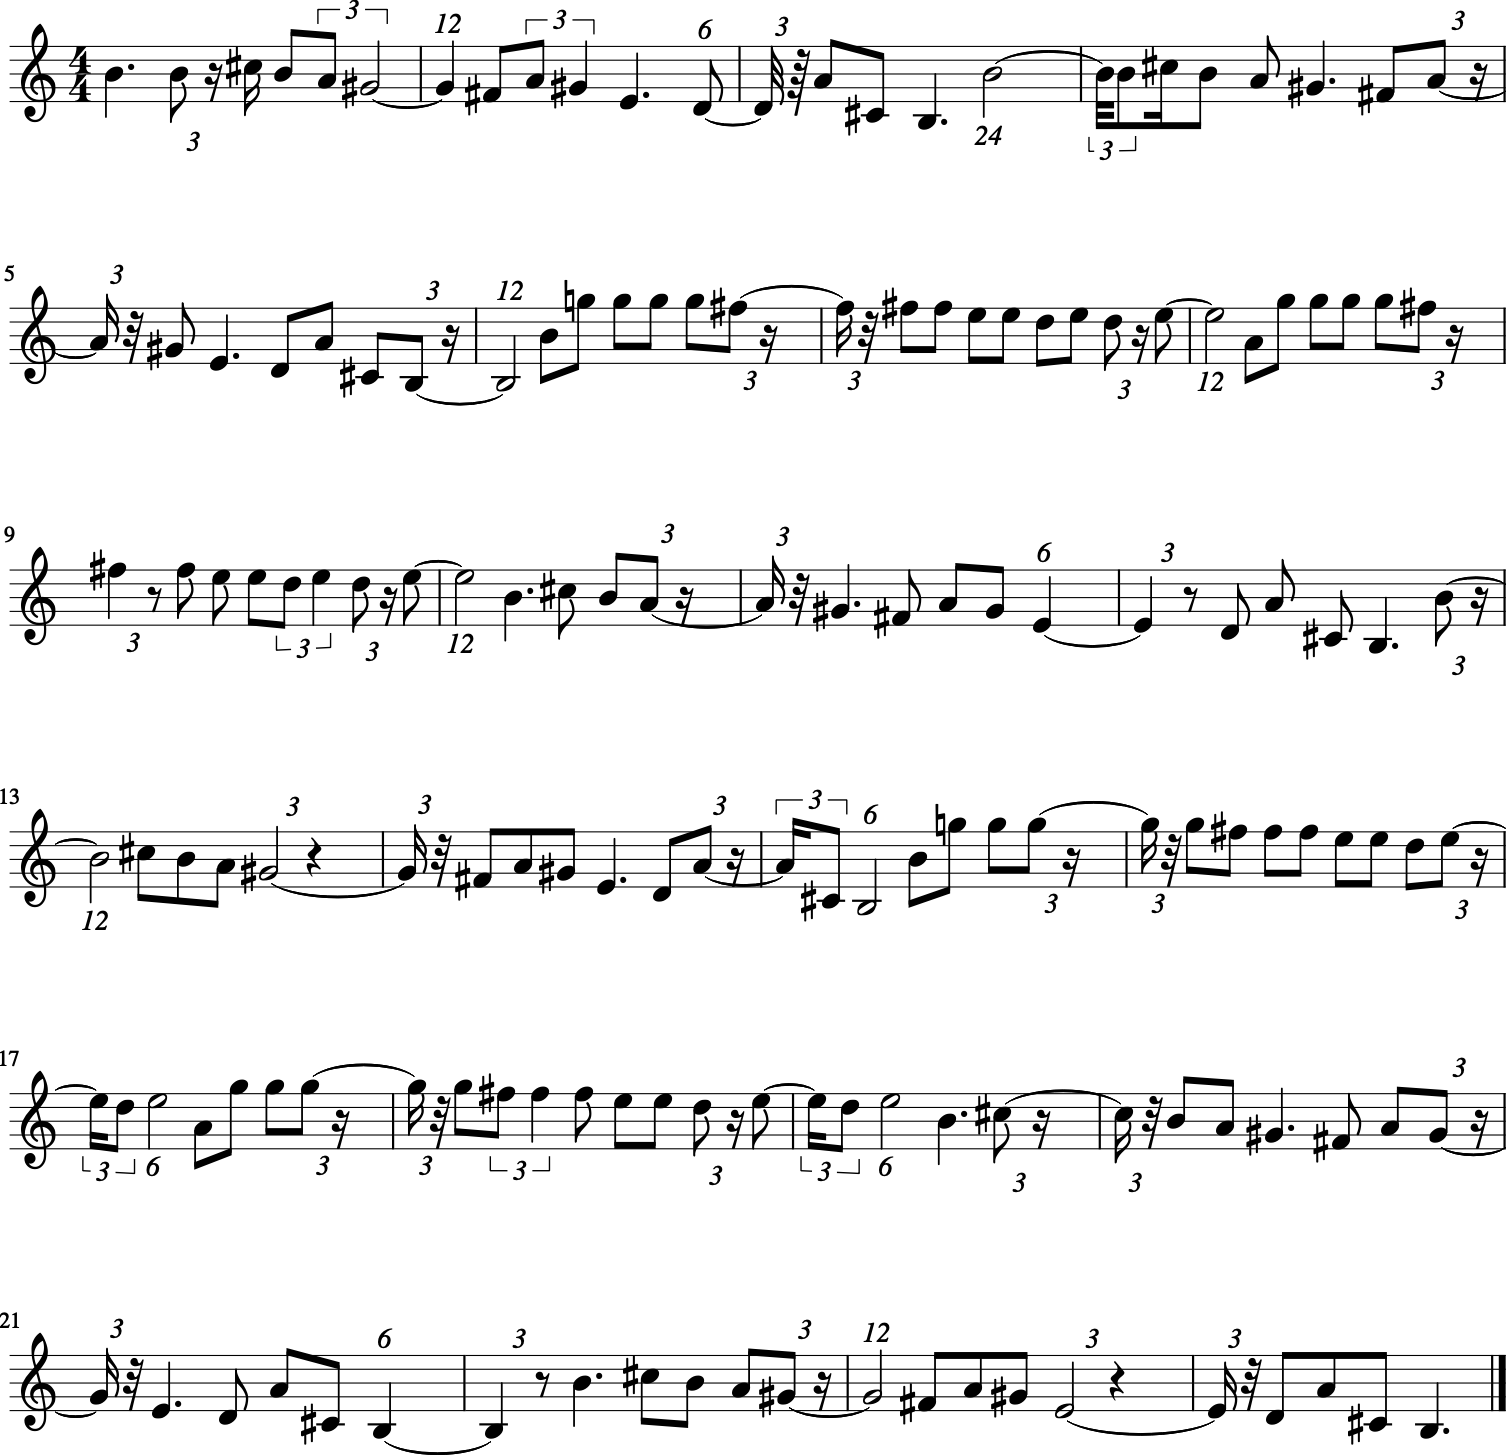

'./data/parseMidi.mid'

In [3]:
s1 = stream.Stream()

for n in range(len(pitch)):
    noteMidi = pitch[n]
    noteLength=quarterLength[n]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s1.append(n)
    
print("Score of parseMidi.mid")
s1.show()
s1.write("midi","./data/parseMidi.mid")

In [4]:
!python3 play.py "./data/parseMidi.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file ./data/parseMidi.mid loaded!


In [4]:
notes = []
for i in range(len(pitch)):
    notes.append([pitch[i],quarterLength[i]])
print(notes)

[[71, 1.5], [71, 0.333333], [73, 0.25], [71, 0.5], [69, 0.333333], [68, 1.666667], [66, 0.5], [69, 0.333333], [68, 0.666667], [64, 1.5], [62, 0.5], [69, 0.5], [61, 0.5], [59, 1.5], [71, 1.5], [71, 0.333333], [73, 0.25], [71, 0.5], [69, 0.5], [68, 1.5], [66, 0.5], [69, 0.5], [68, 0.5], [64, 1.5], [62, 0.5], [69, 0.5], [61, 0.5], [59, 1.5], [71, 0.5], [79, 0.5], [79, 0.5], [79, 0.5], [79, 0.5], [78, 0.5], [78, 0.5], [78, 0.5], [76, 0.5], [76, 0.5], [74, 0.5], [76, 0.5], [74, 0.333333], [76, 1.666667], [69, 0.5], [79, 0.5], [79, 0.5], [79, 0.5], [79, 0.5], [78, 0.333333], [78, 0.666667], [78, 0.5], [76, 0.5], [76, 0.5], [74, 0.333333], [76, 0.666667], [74, 0.333333], [76, 1.666667], [71, 1.5], [73, 0.5], [71, 0.5], [69, 0.5], [68, 1.5], [66, 0.5], [69, 0.5], [68, 0.5], [64, 1.5], [62, 0.5], [69, 0.5], [61, 0.5], [59, 1.5], [71, 1.5], [73, 0.5], [71, 0.5], [69, 0.5], [68, 1.5], [66, 0.5], [69, 0.5], [68, 0.5], [64, 1.5], [62, 0.5], [69, 0.5], [61, 0.333333], [59, 1.666667], [71, 0.5], [79,

In [5]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [6]:
pitchParams = ScalarEncoderParameters()
pitchParams.minimum = 48
pitchParams.maximum = 83
pitchParams.activeBits = 3
pitchParams.size = 24
pitchParams.clipInput  = True

encPitch = ScalarEncoder(pitchParams)
print(encPitch.encode(60))
print(encPitch.encode(65))
print(encPitch.encode(71))

SDR( 24 ) 7, 8, 9
SDR( 24 ) 10, 11, 12
SDR( 24 ) 14, 15, 16


In [7]:
lengthParams = ScalarEncoderParameters()
lengthParams.minimum = 0
lengthParams.maximum = 1
lengthParams.activeBits = 3
lengthParams.size = 24
lengthParams.clipInput  = True

encLength = ScalarEncoder(lengthParams)
print(encLength.encode(0.25))
print(encLength.encode(0.333333))
print(encLength.encode(0.5))

SDR( 24 ) 5, 6, 7
SDR( 24 ) 7, 8, 9
SDR( 24 ) 10, 11, 12


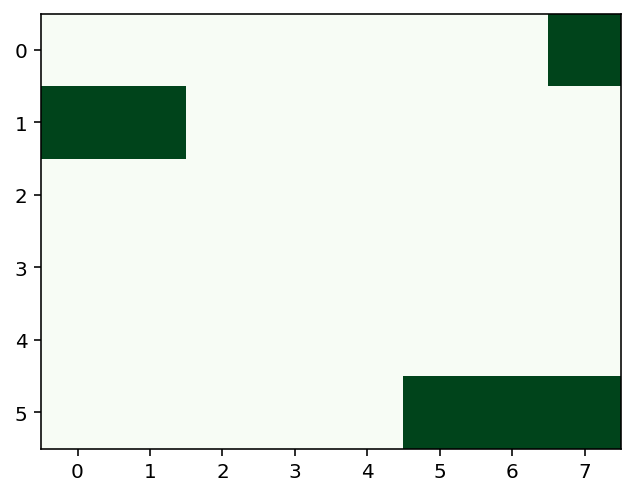

In [9]:
for i in range(len(notes)):
    pitchBits        = encPitch.encode(notes[i][0])
    lengthBits = encLength.encode(notes[i][1])

    encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    print(encoding)
    
    clear_output(wait = True)
    plt.cla
    encodingSDR=encoding.dense.reshape(6,8)
    plt.imshow(encodingSDR, cmap = "Greens")
    plt.pause(0.01)

In [8]:
inputSDR  = SDR( dimensions = (48, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)
print(sp)

Spatial Pooler Connections:
    Inputs (48) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 17 / 17 / 17
    Connected Synapses on Segment Min/Mean/Max 3 / 8.3941 / 15
    Synapses Dead (0%) Saturated (0%)
    Synapses pruned (0%) Segments pruned (0%)



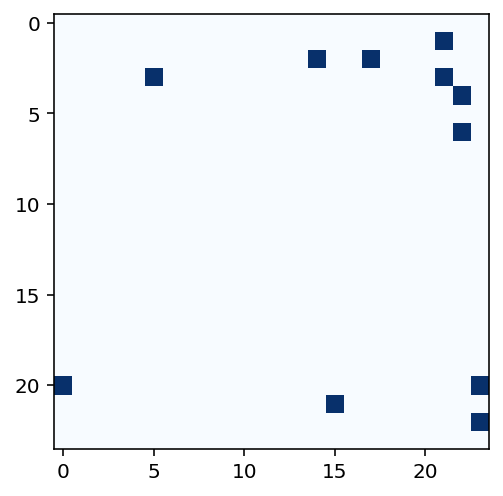

In [11]:
for i in range(len(notes)):
    pitchBits        = encPitch.encode(notes[i][0])
    lengthBits = encLength.encode(notes[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)

    clear_output(wait = True)
    plt.cla
    sampleSDR=activeSDR.dense.reshape(24,24)
    plt.imshow(sampleSDR, cmap = "Blues")
    plt.pause(0.01)

In [9]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (4608) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



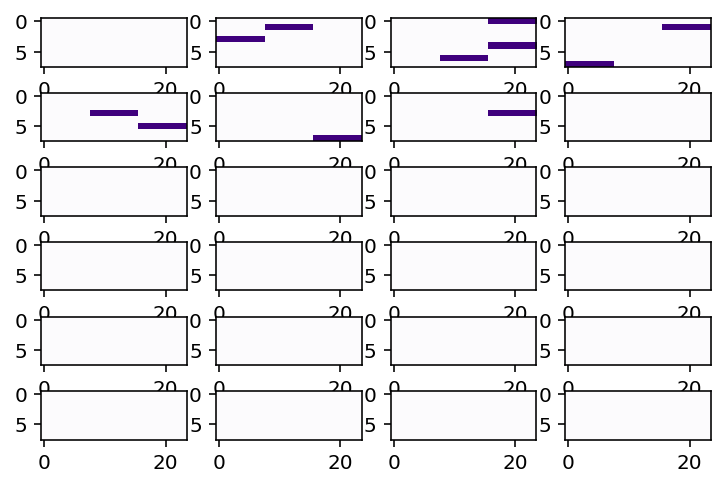

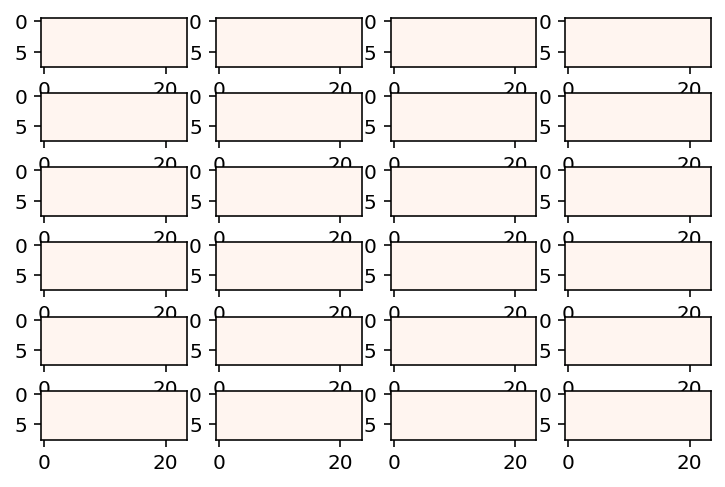

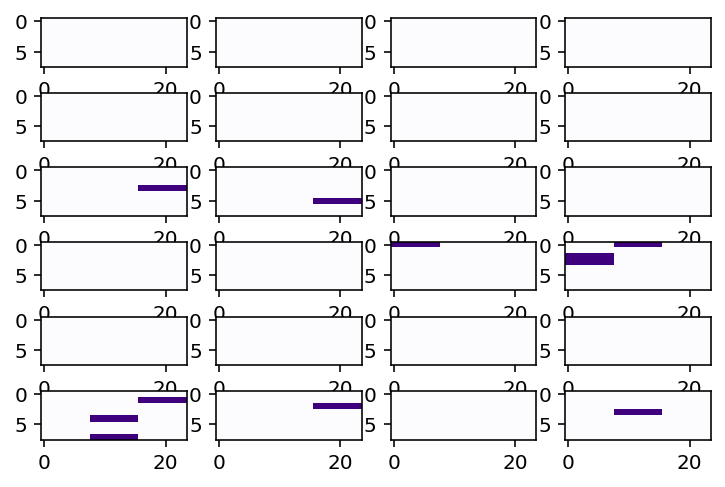

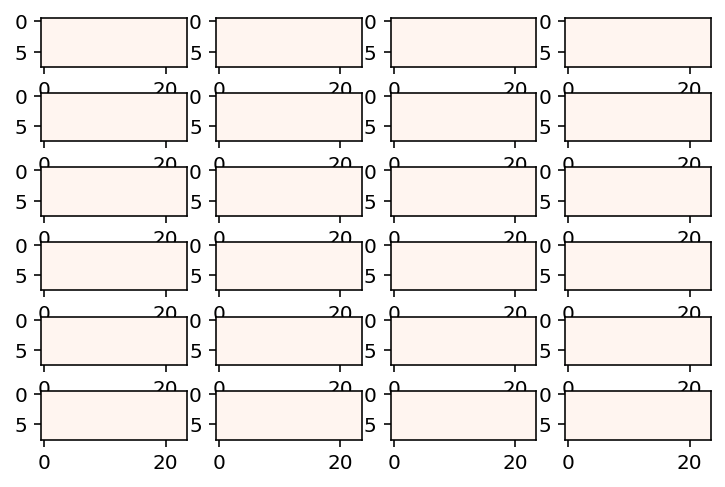

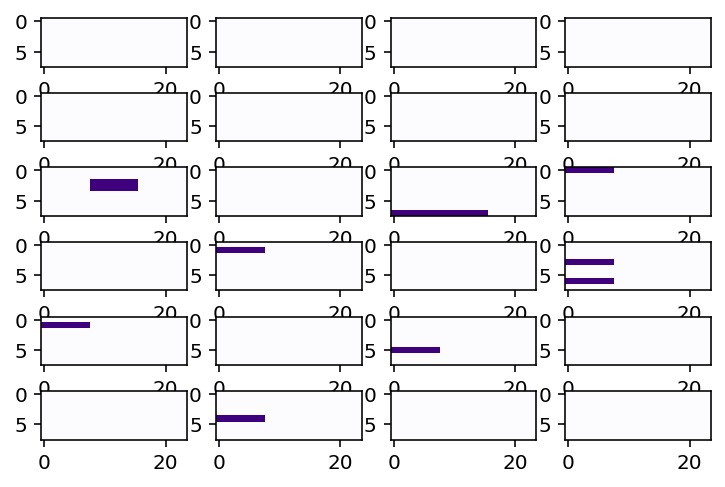

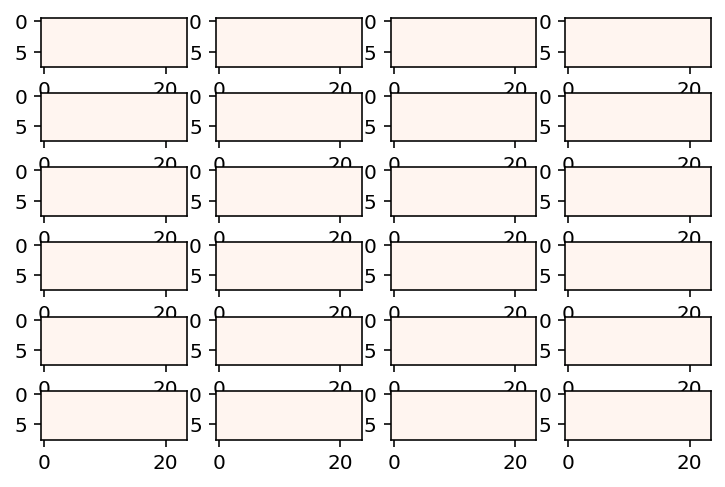

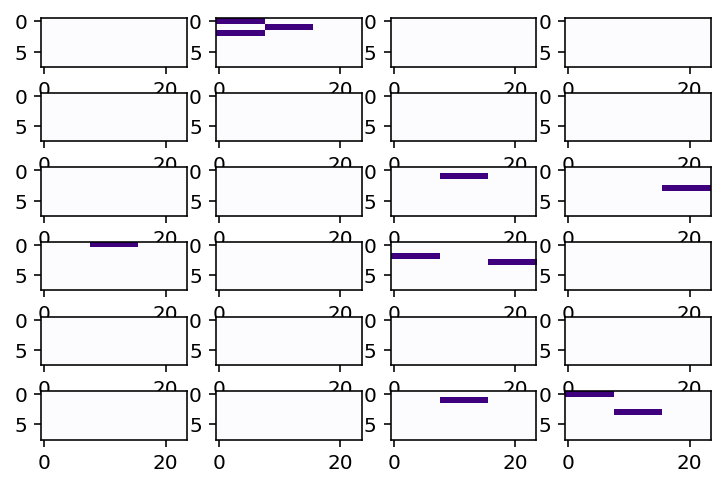

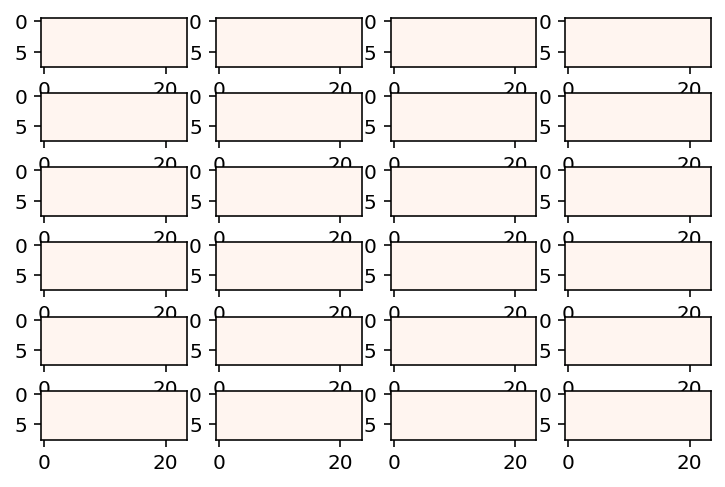

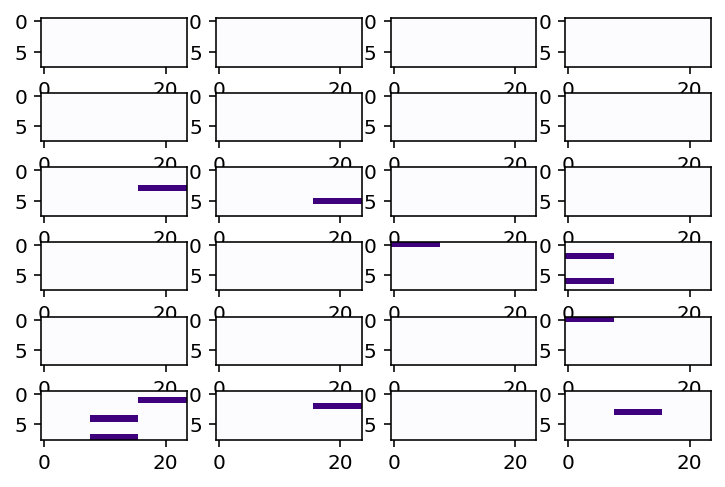

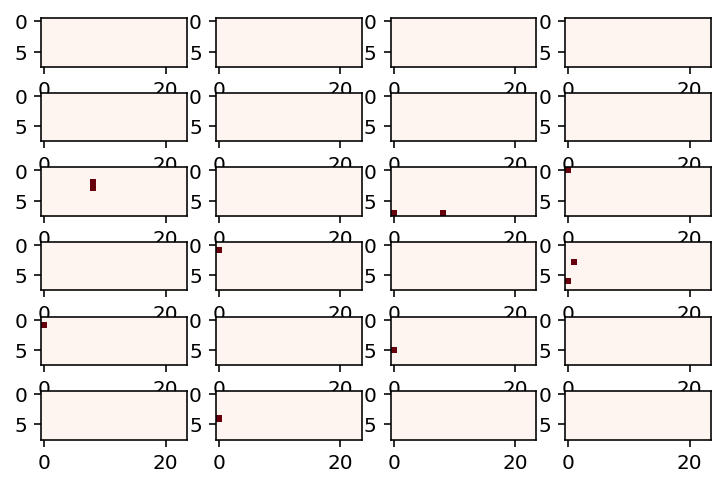

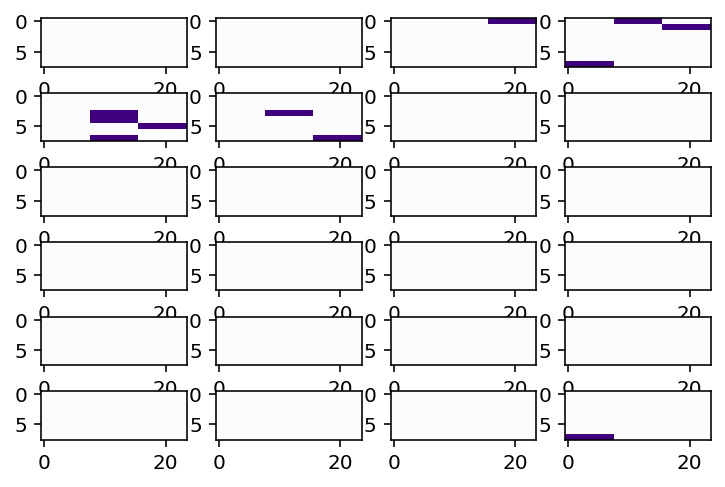

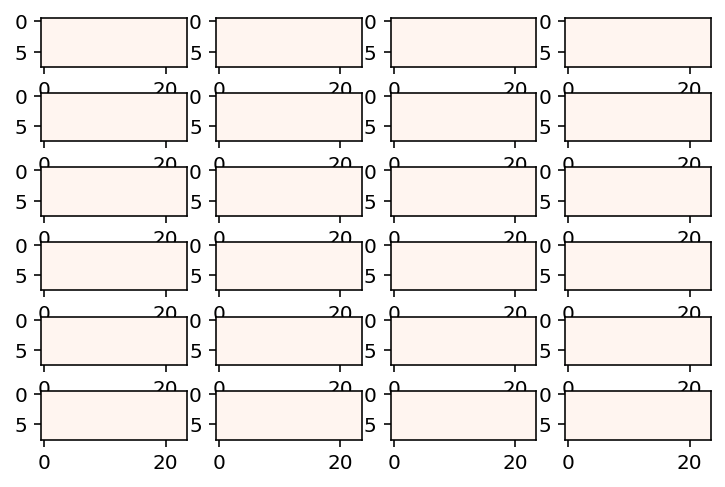

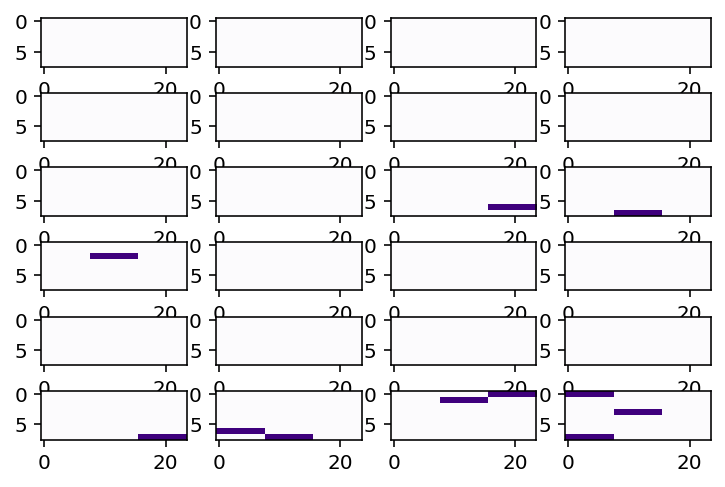

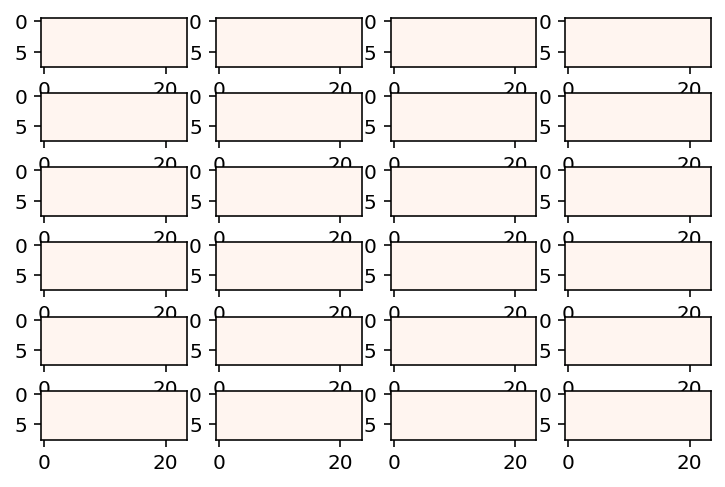

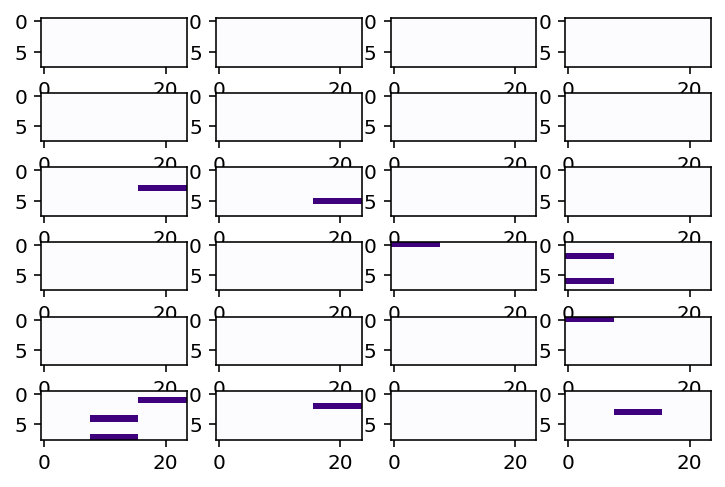

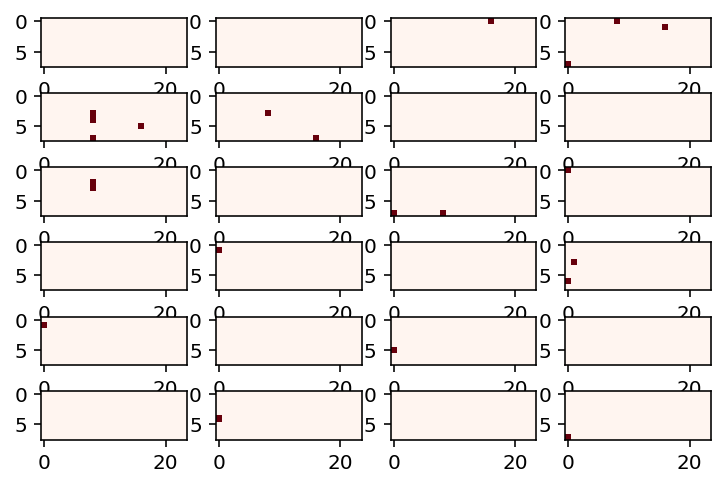

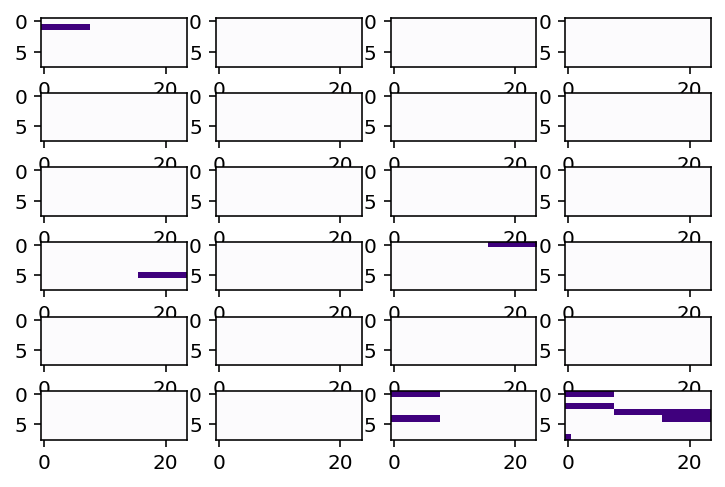

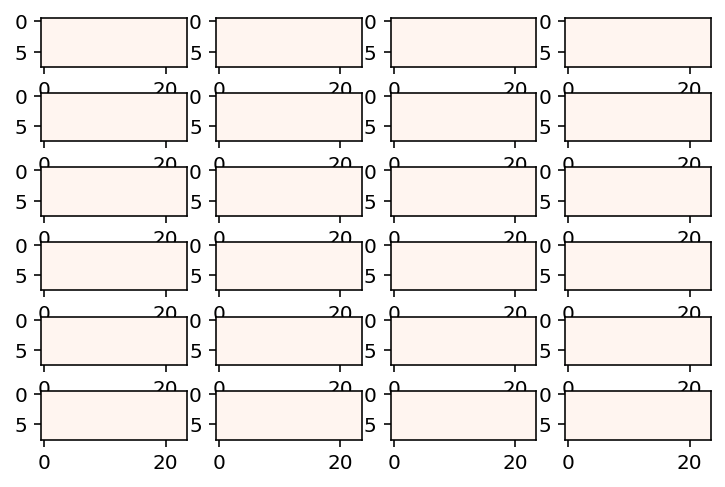

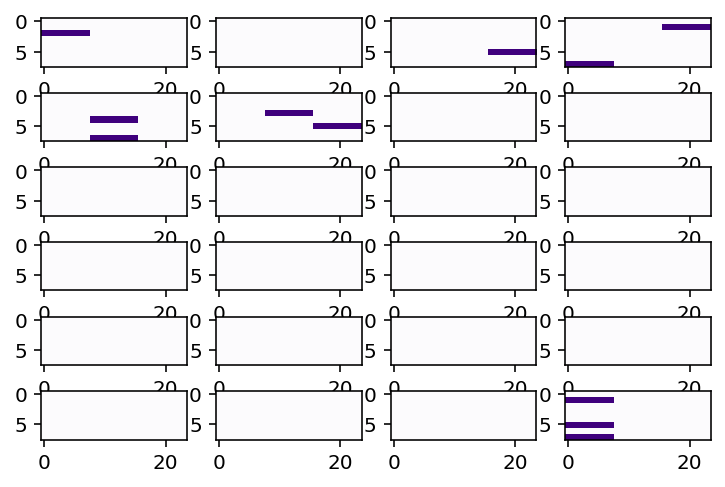

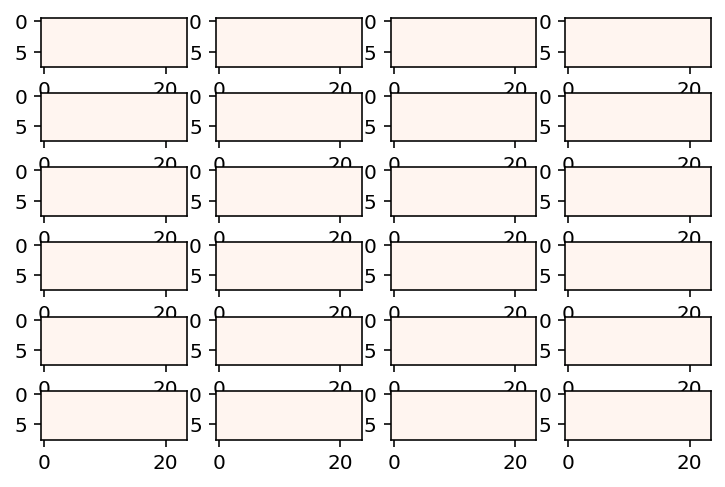

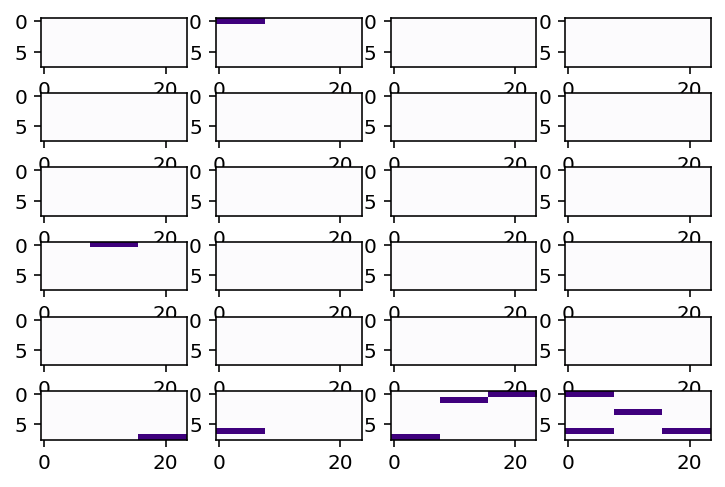

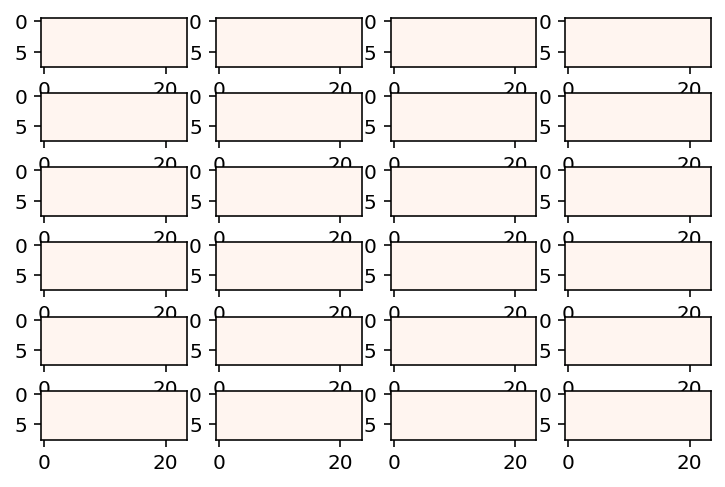

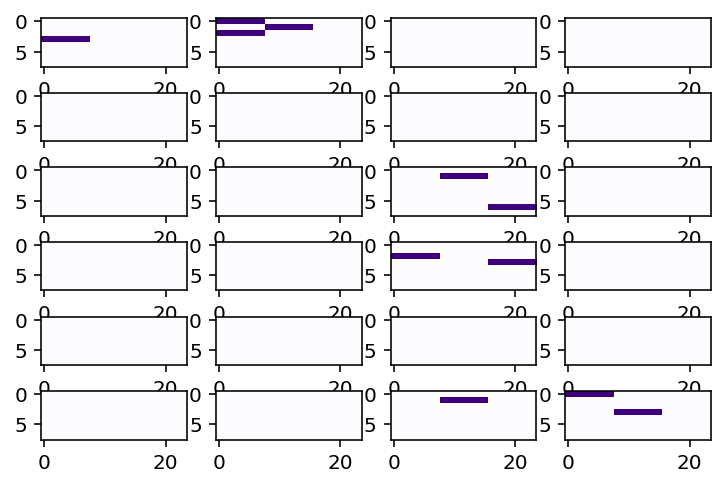

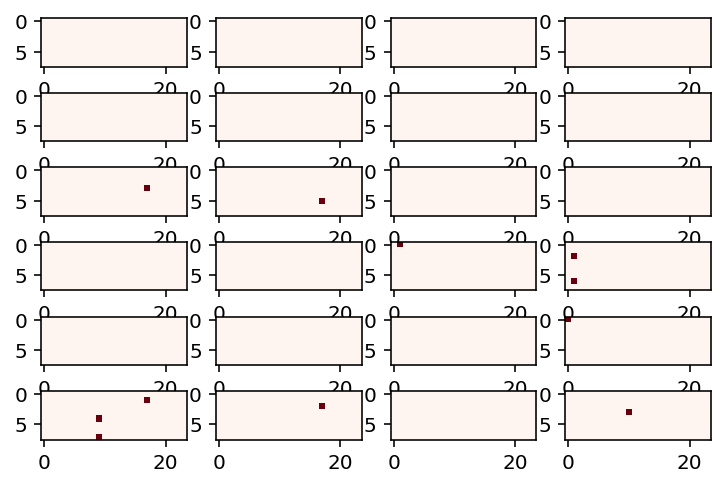

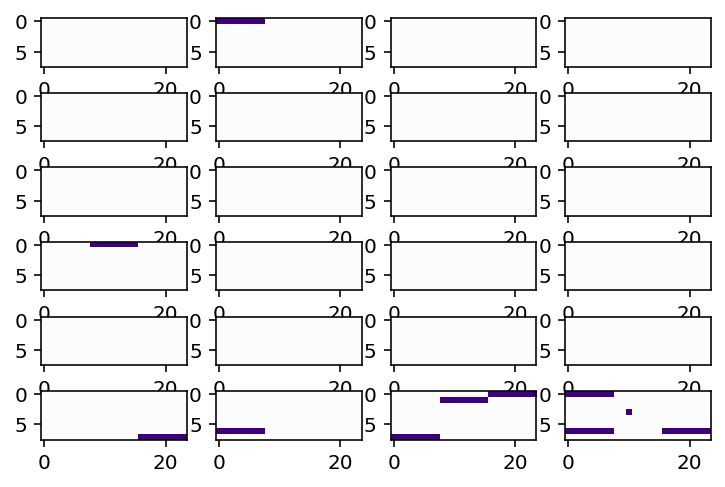

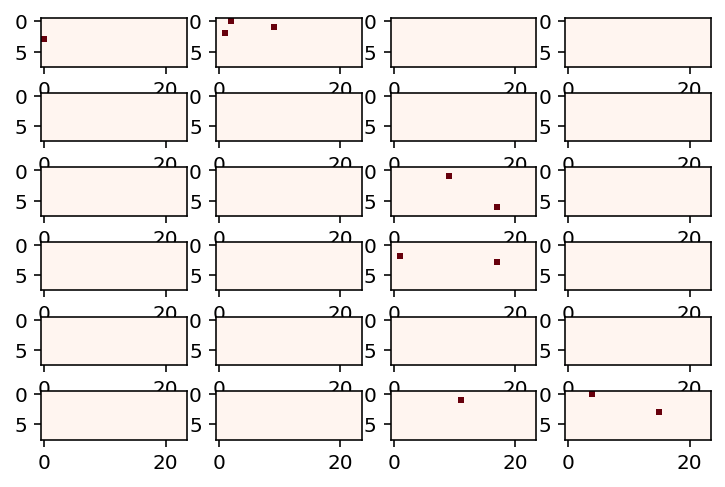

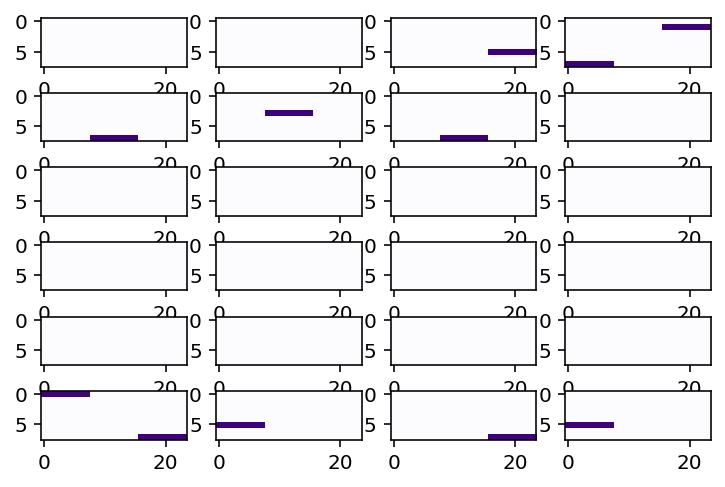

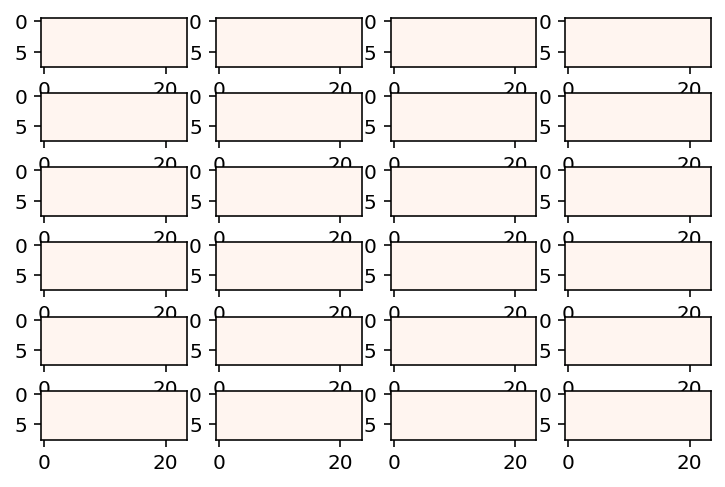

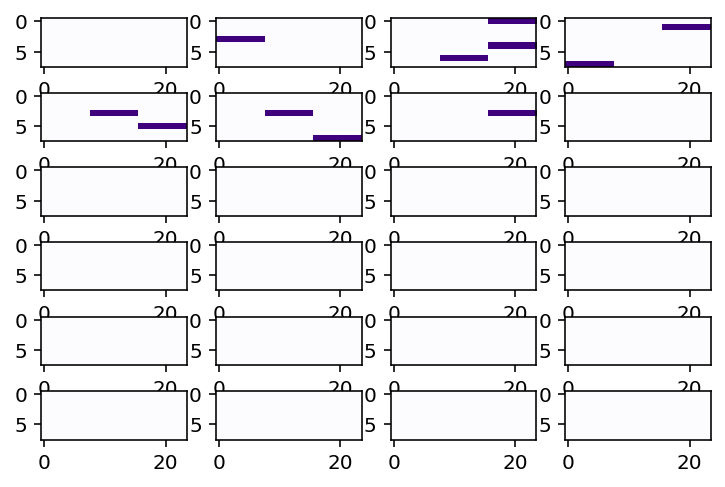

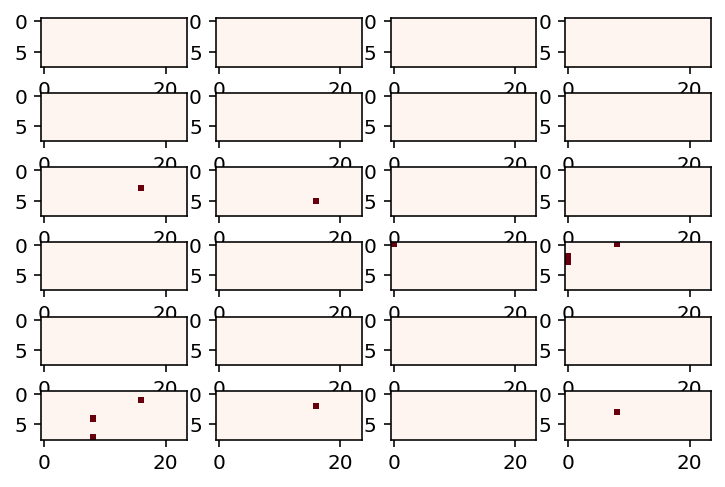

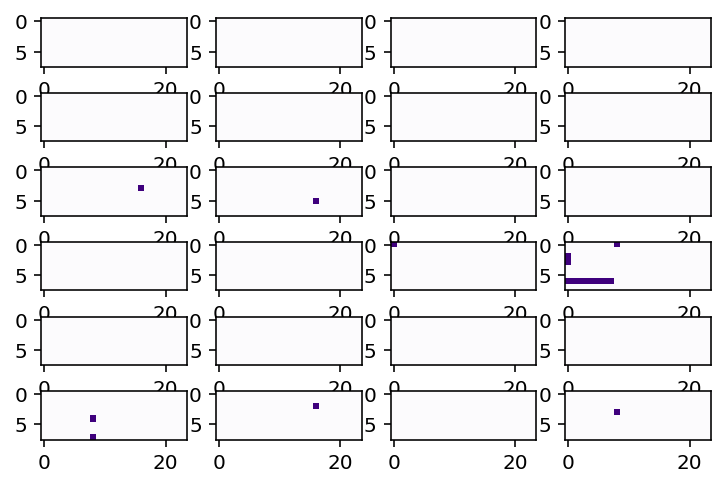

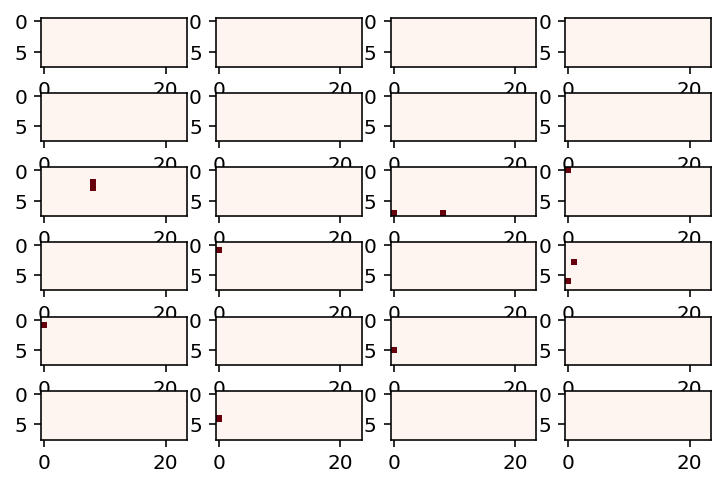

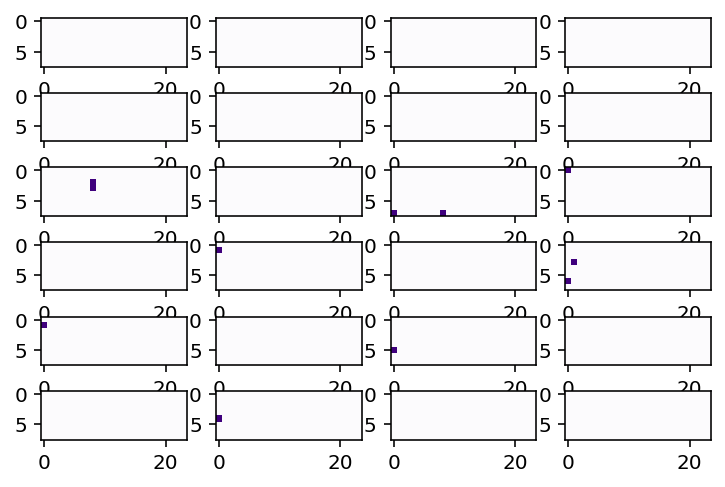

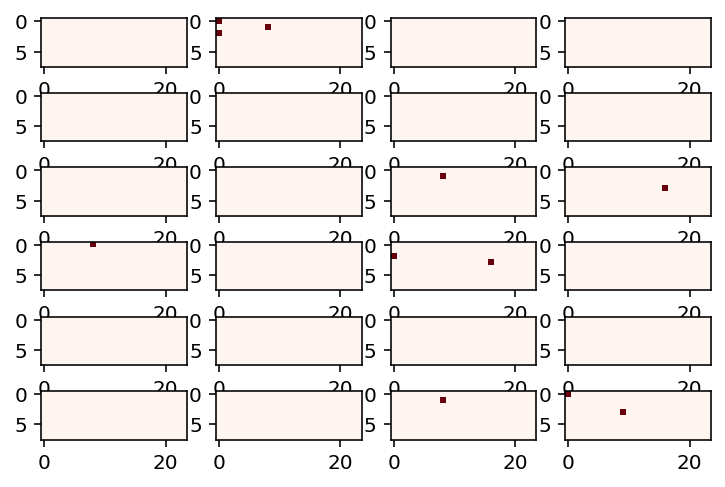

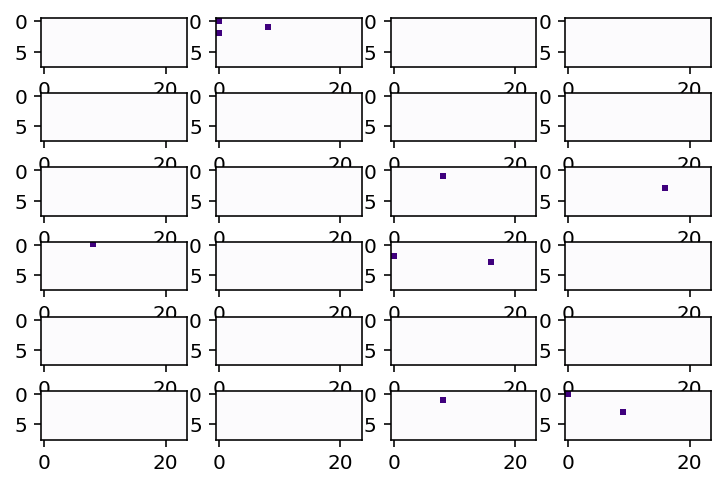

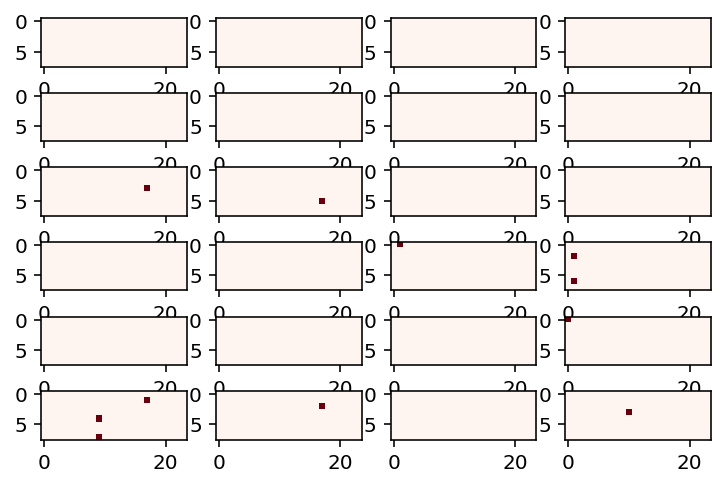

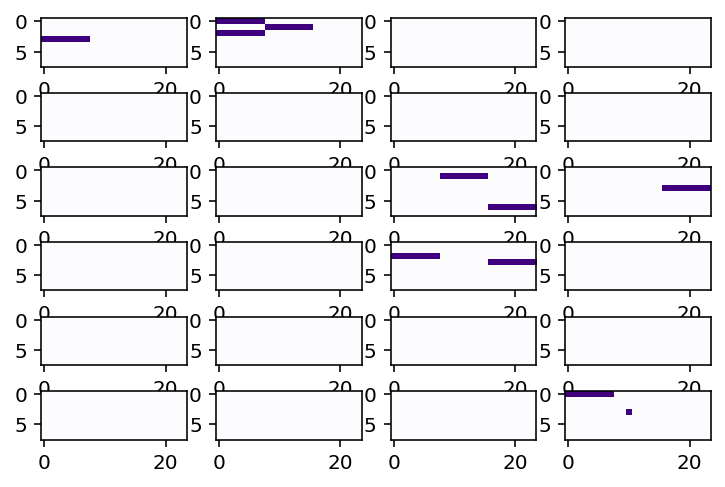

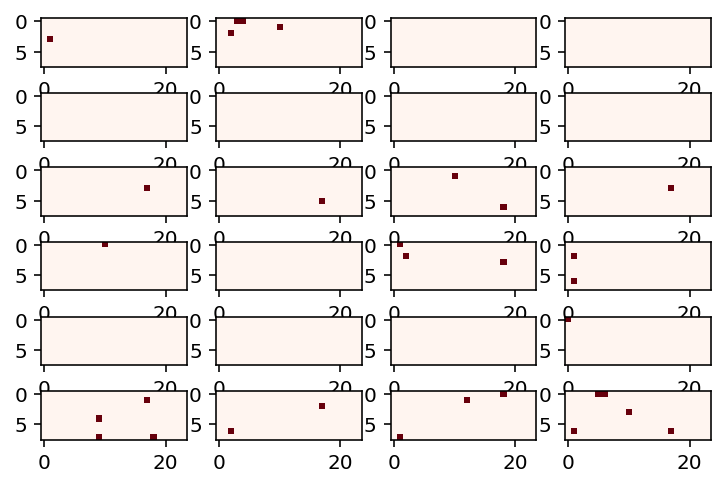

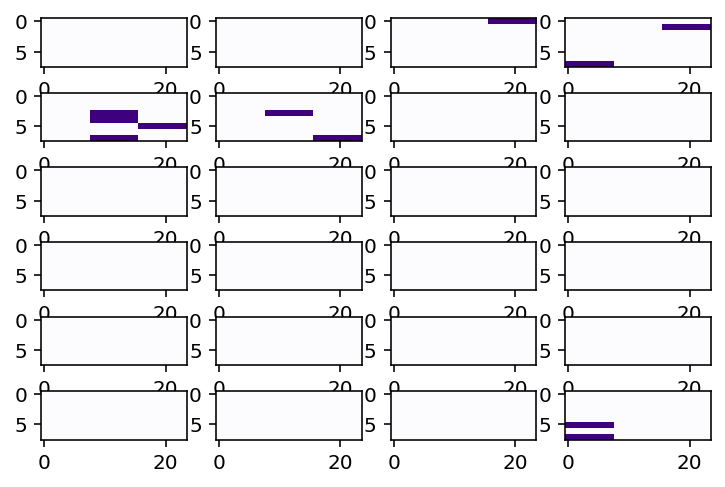

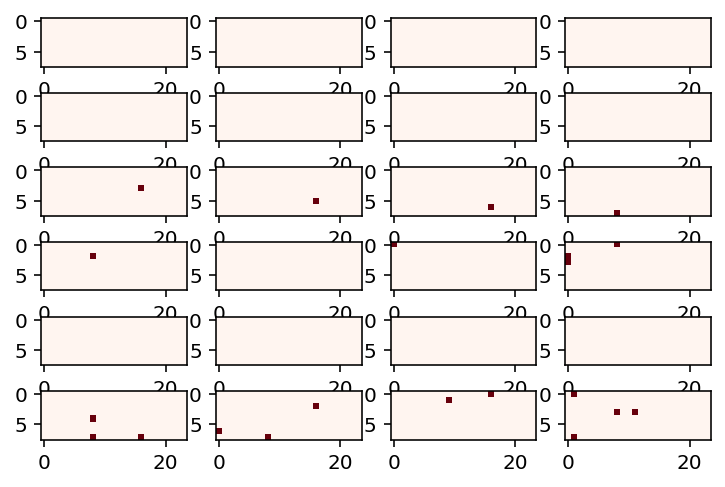

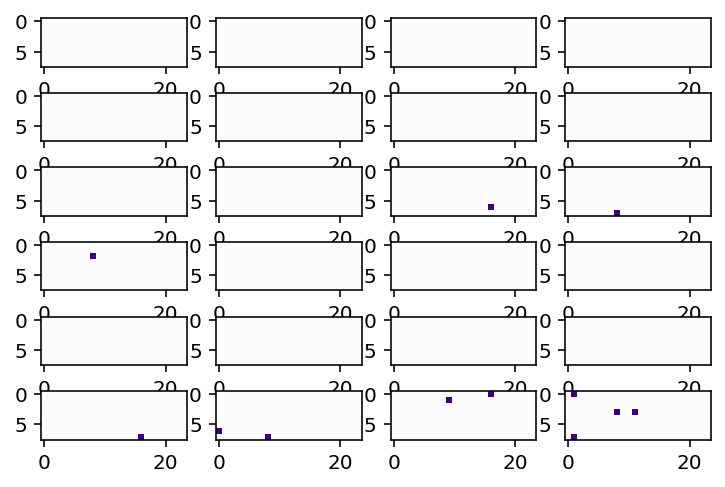

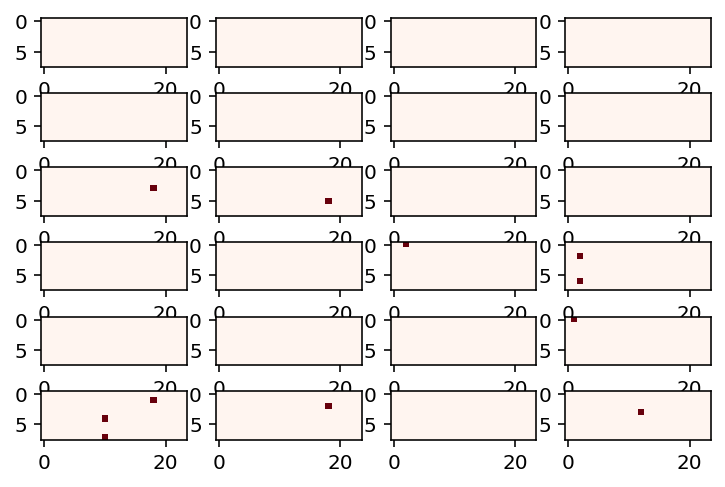

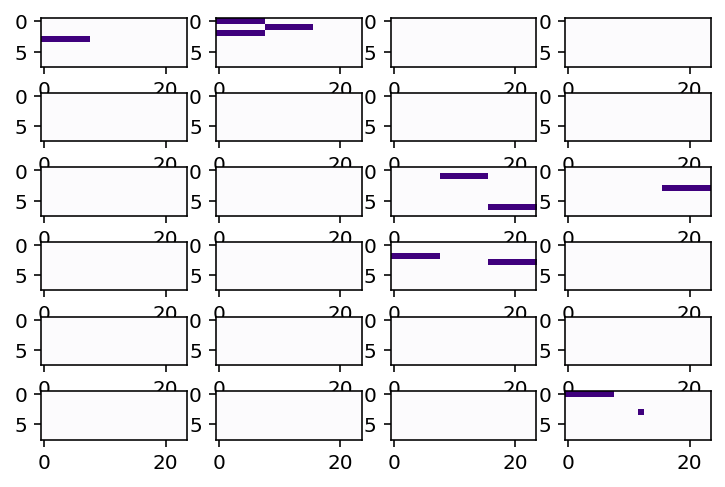

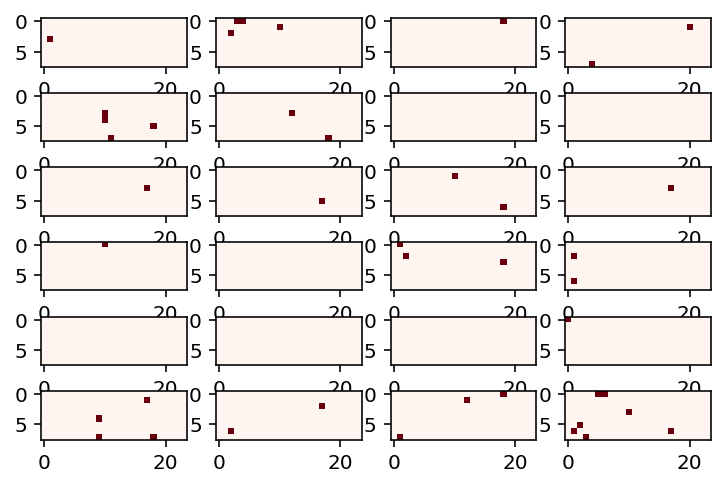

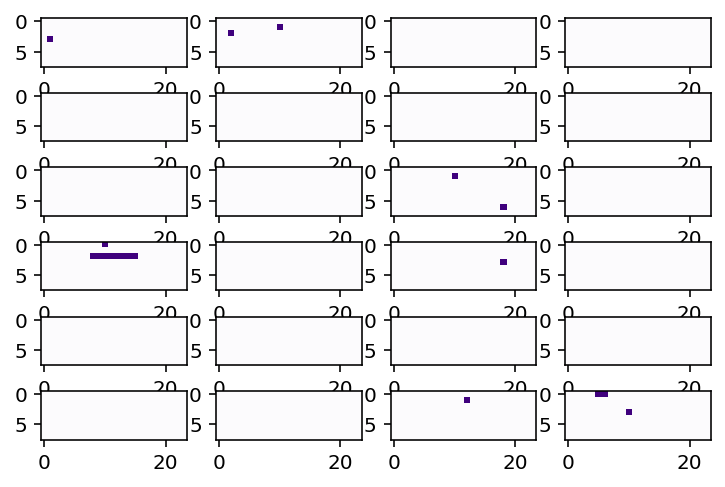

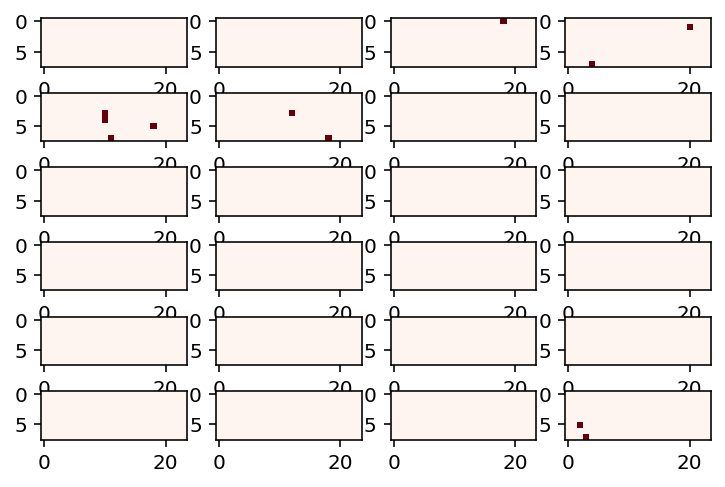

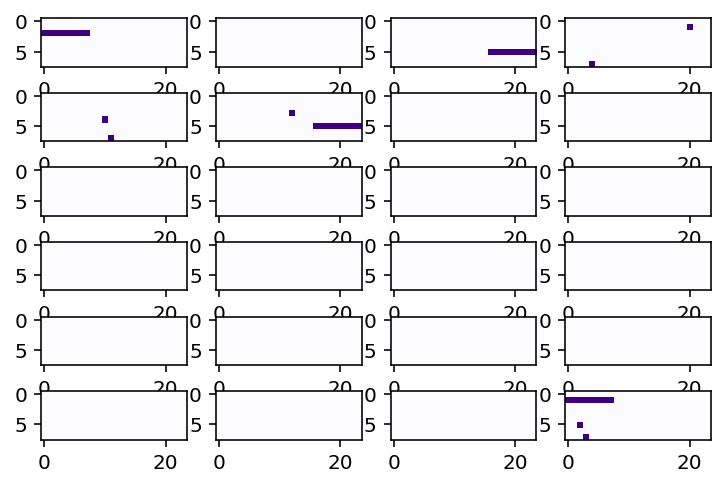

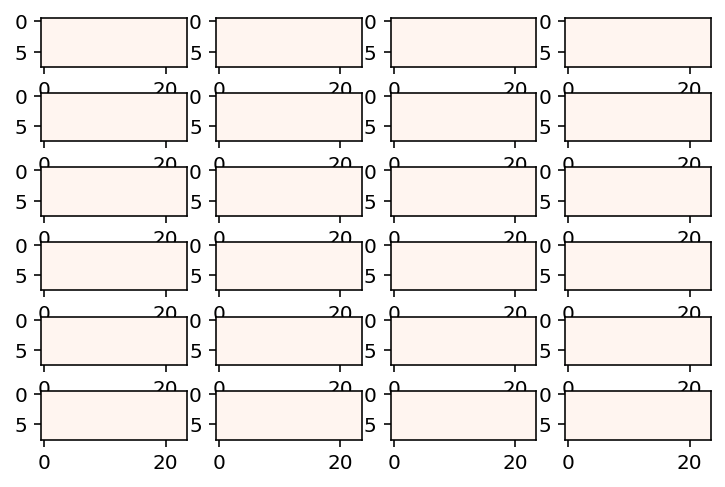

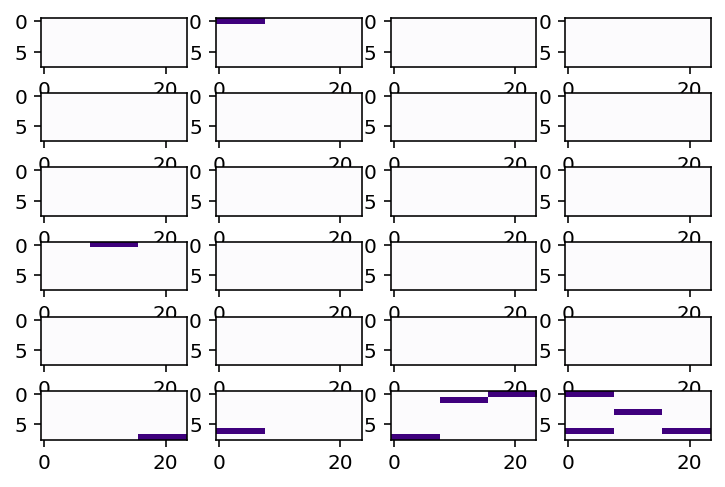

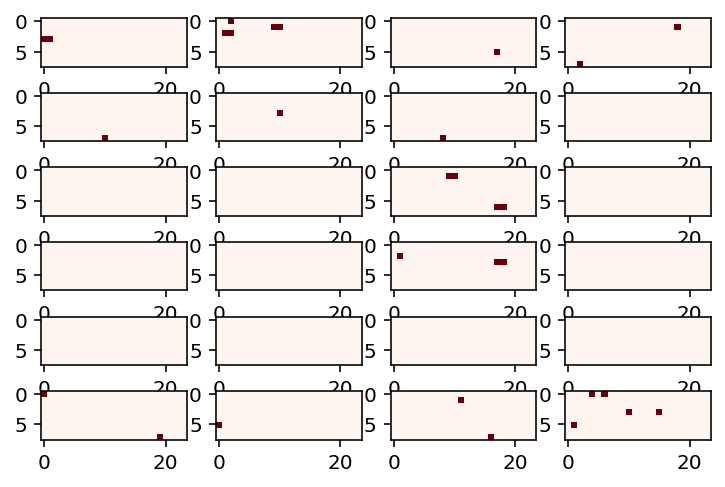

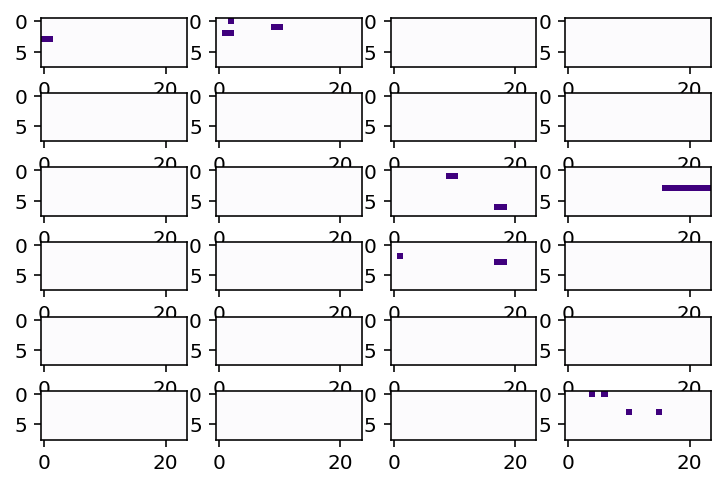

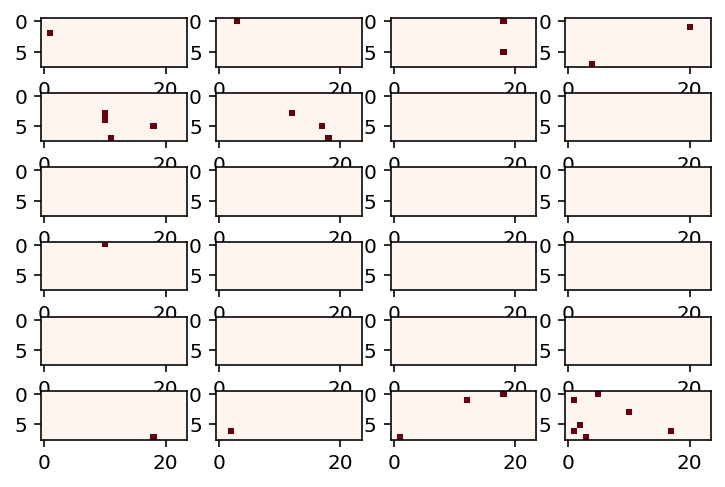

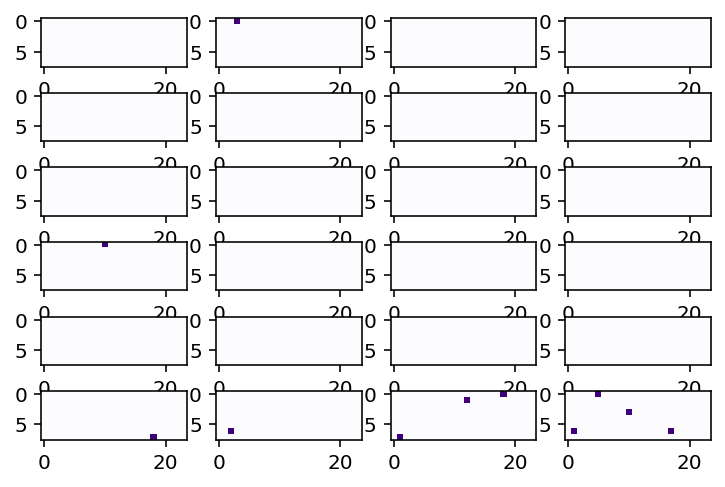

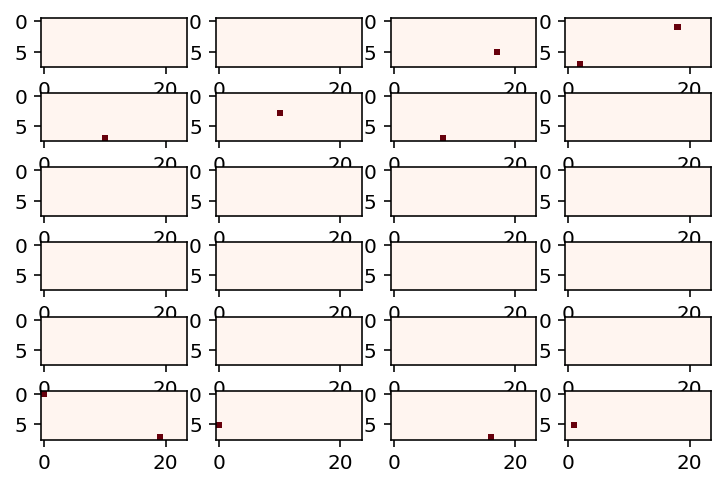

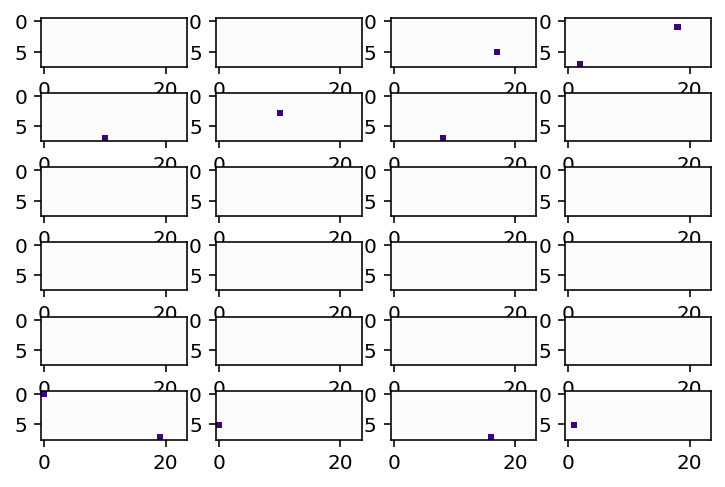

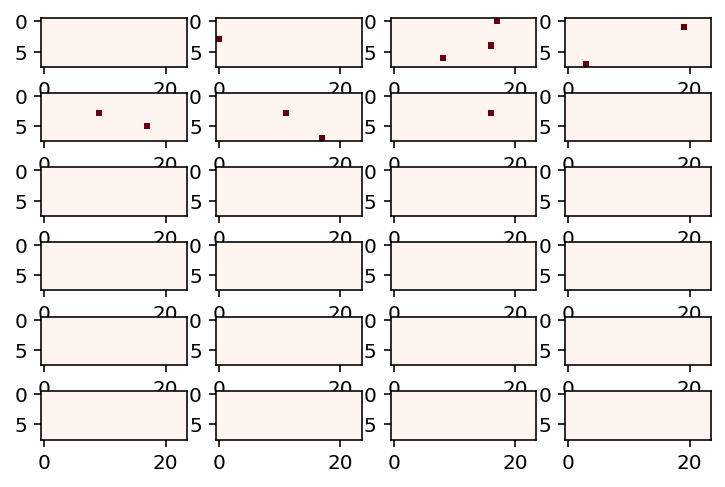

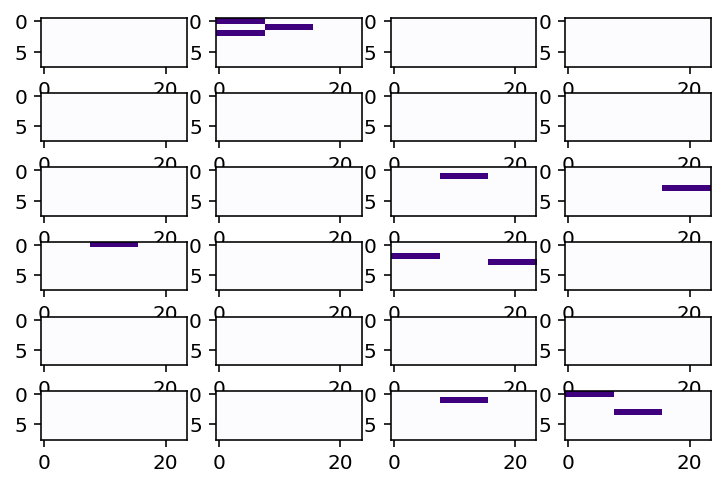

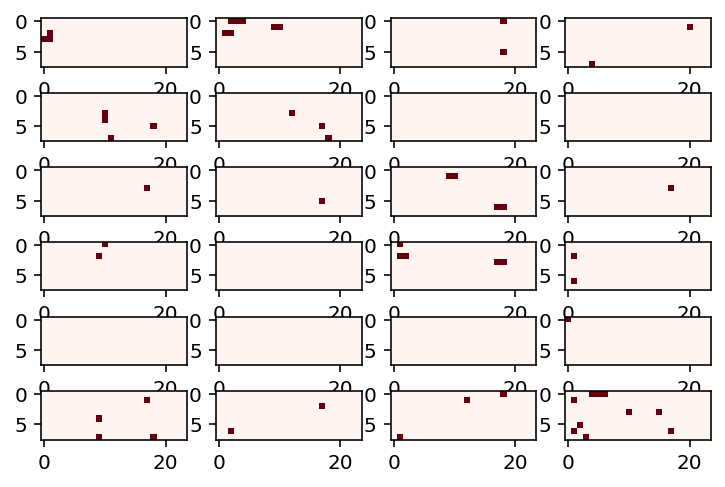

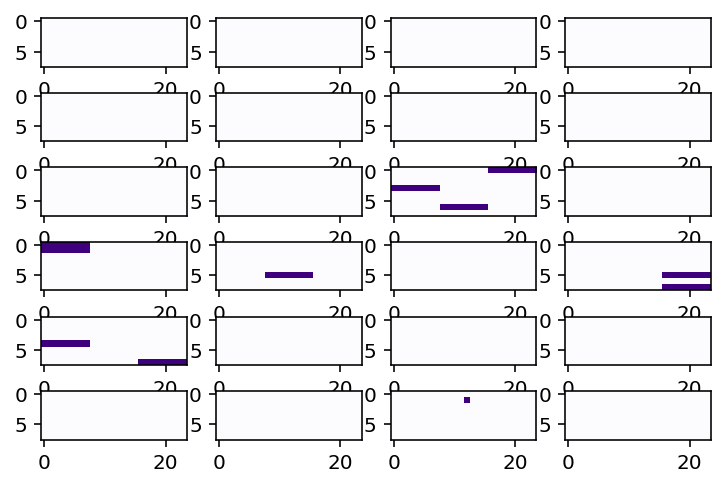

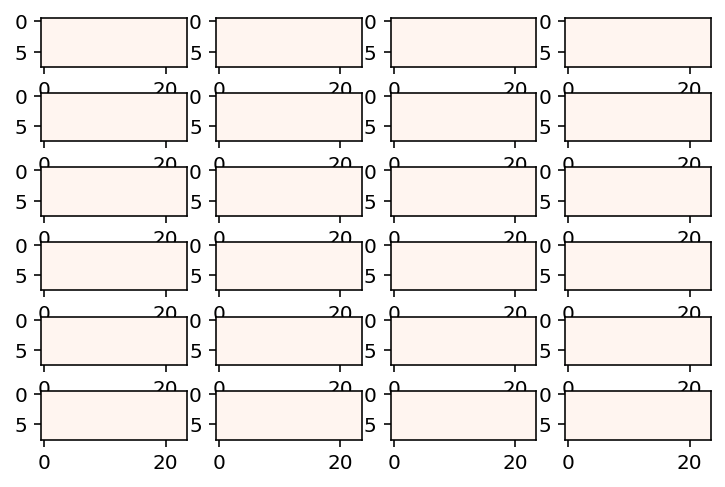

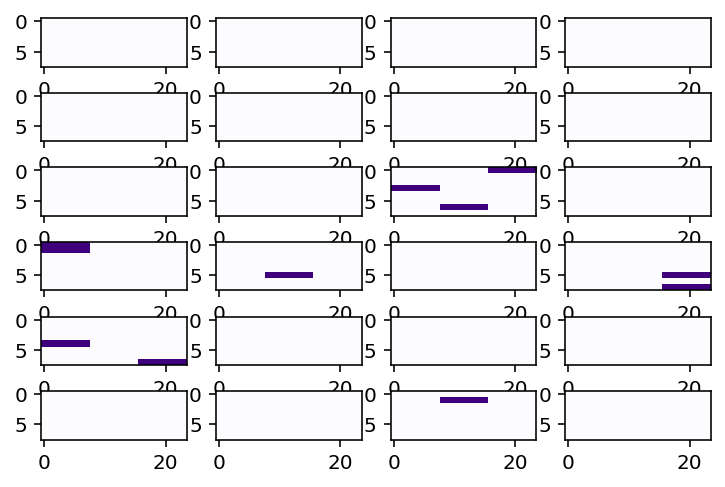

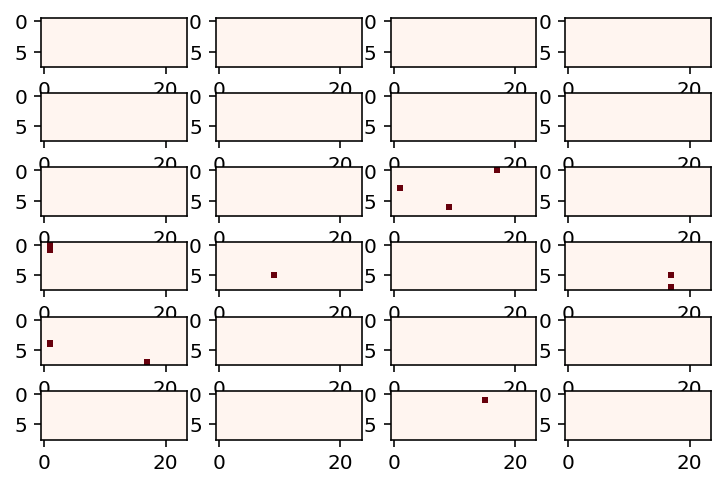

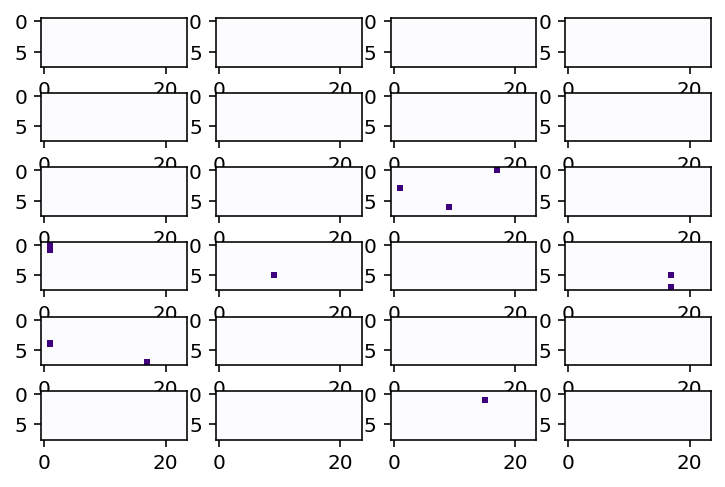

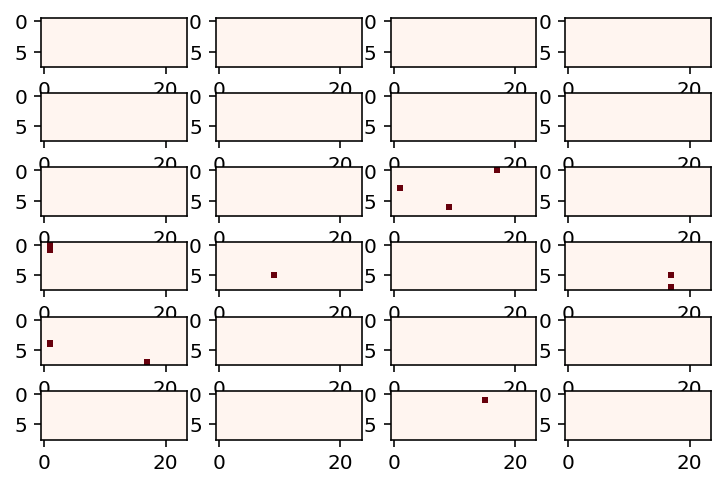

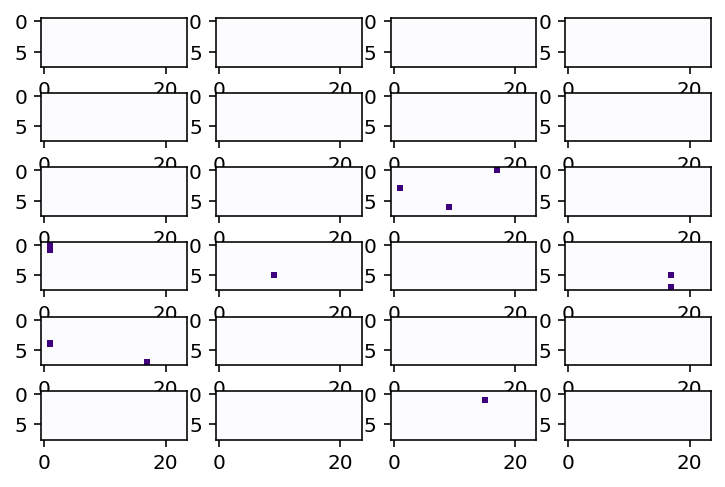

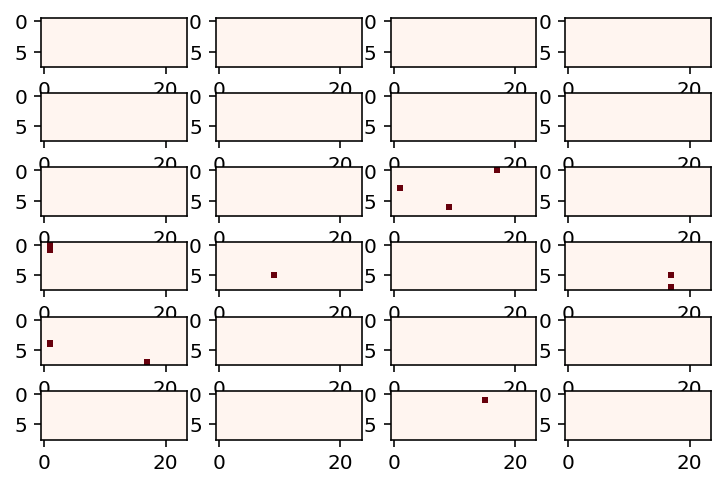

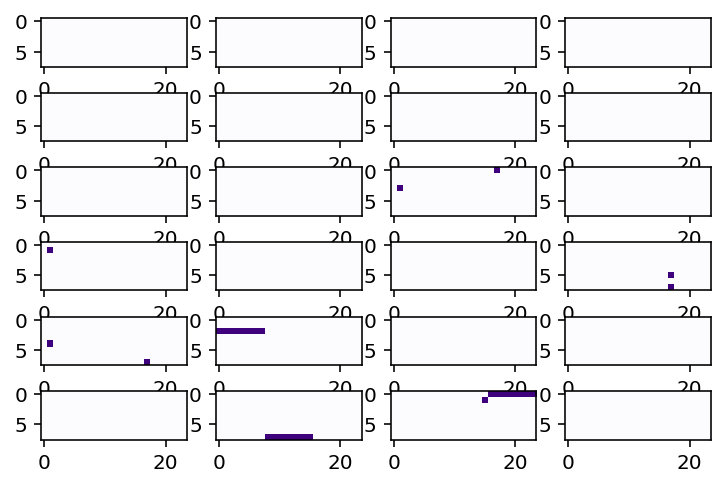

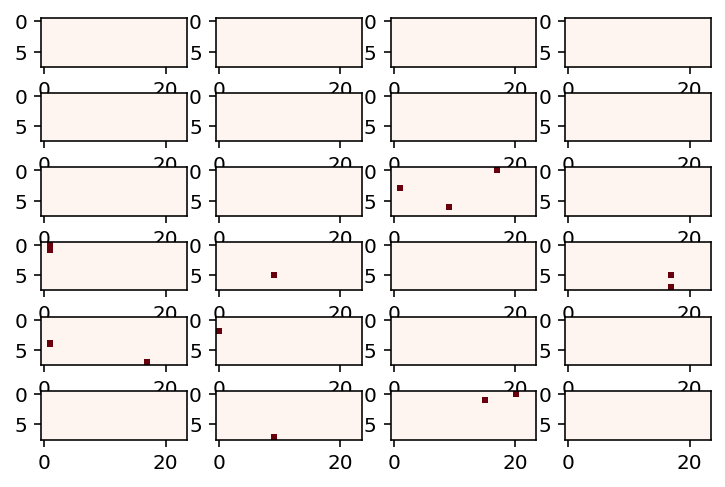

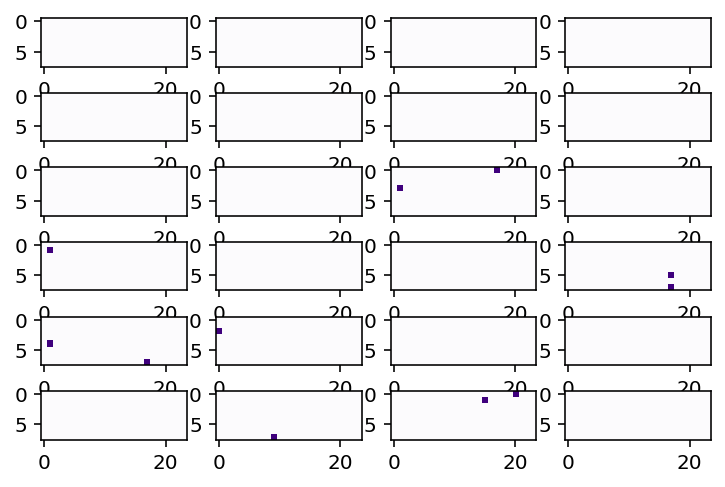

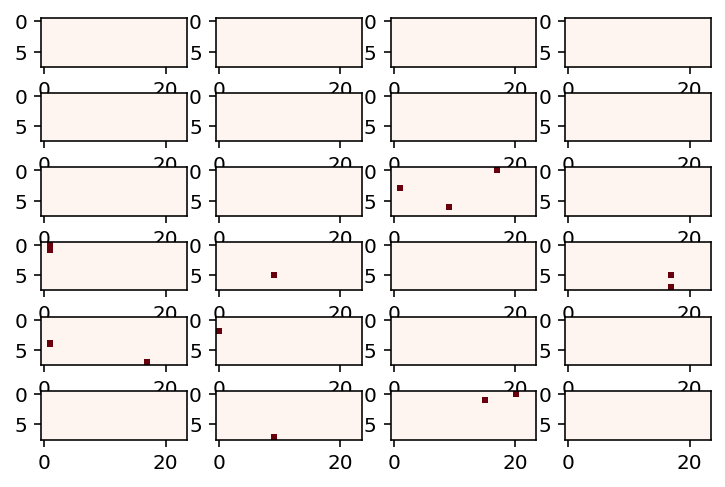

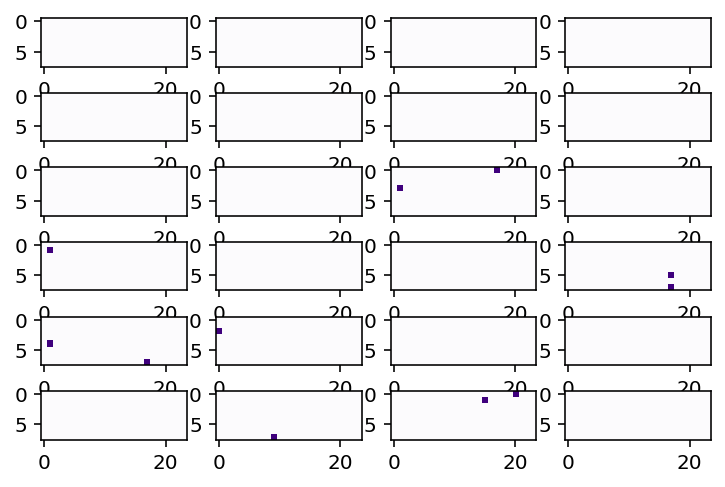

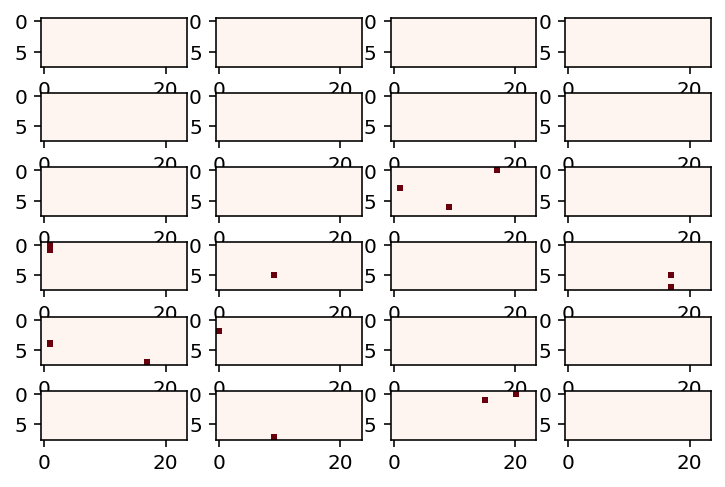

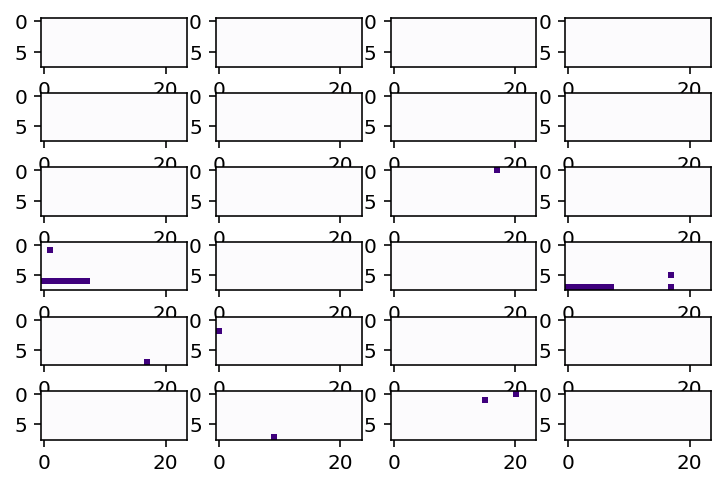

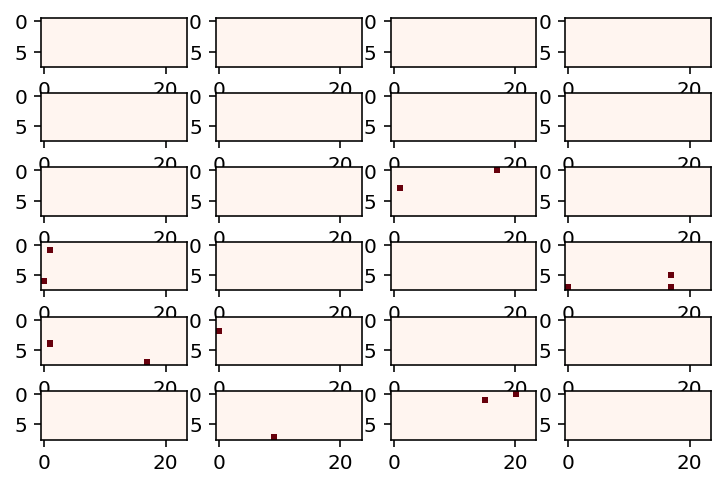

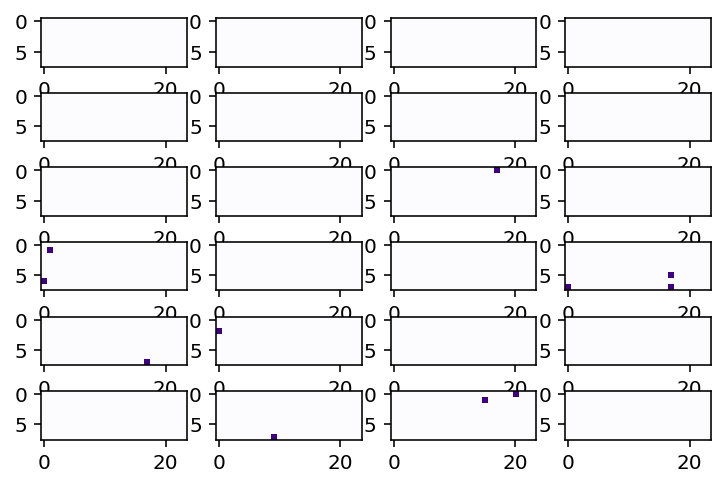

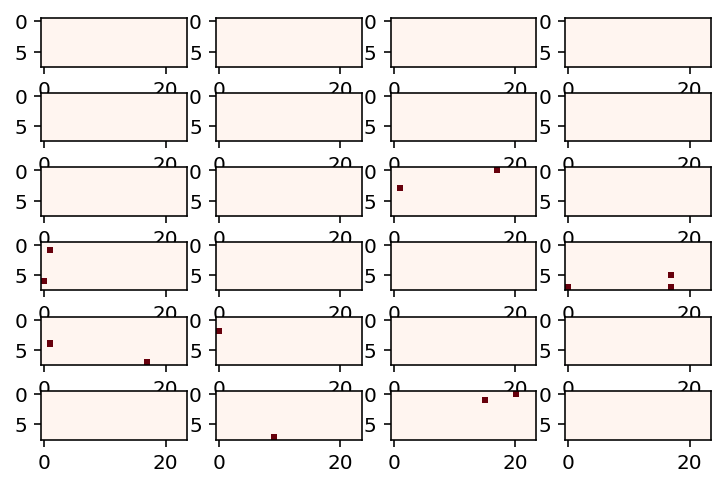

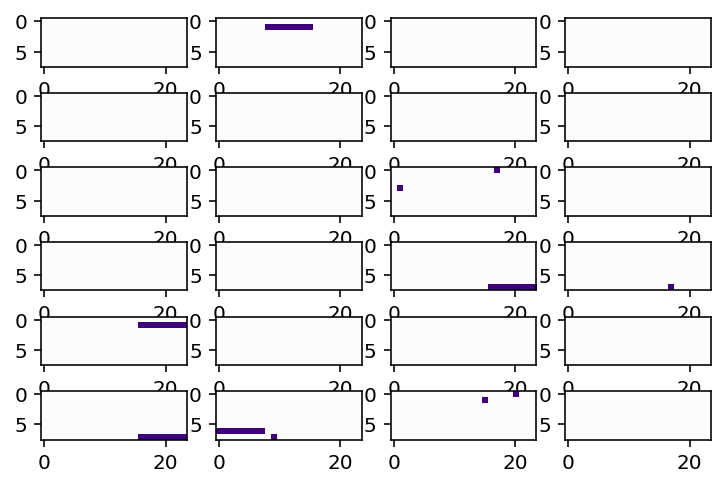

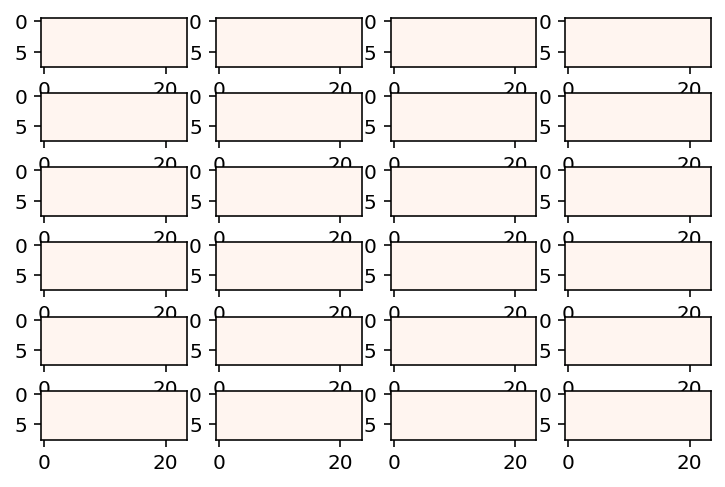

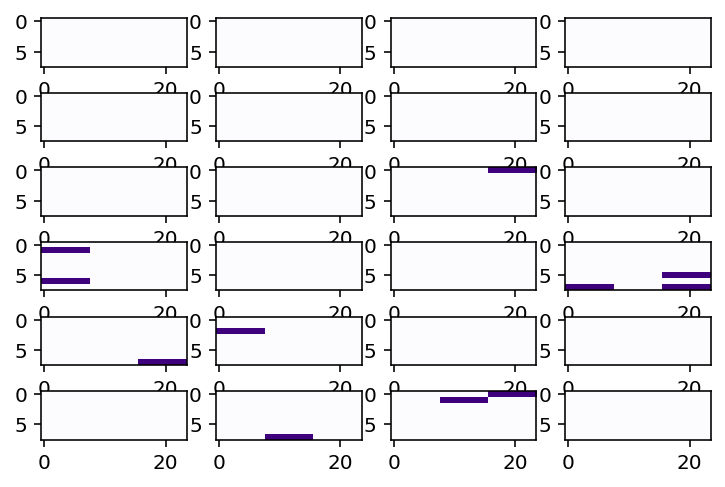

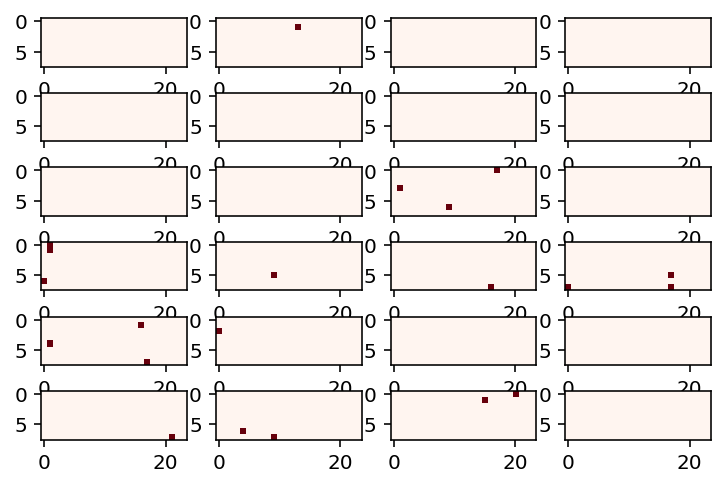

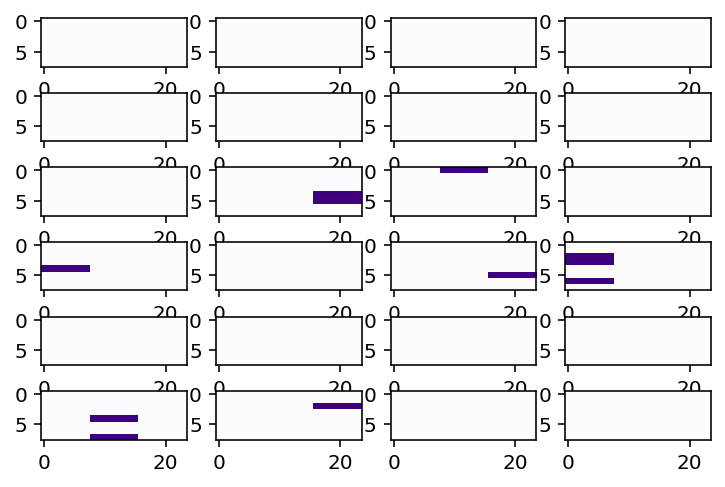

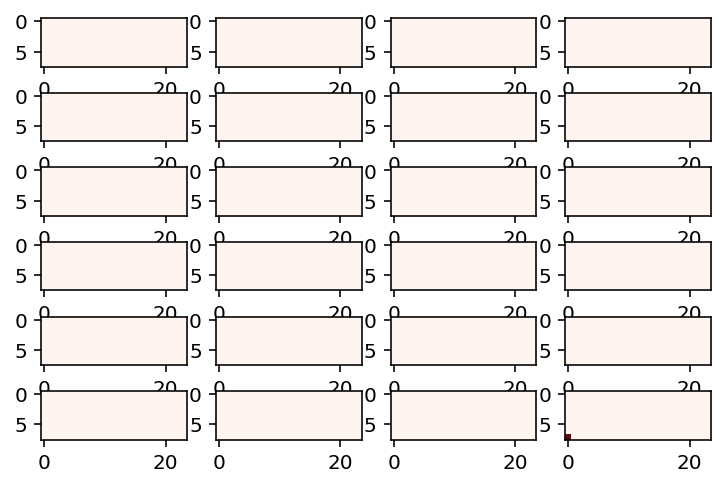

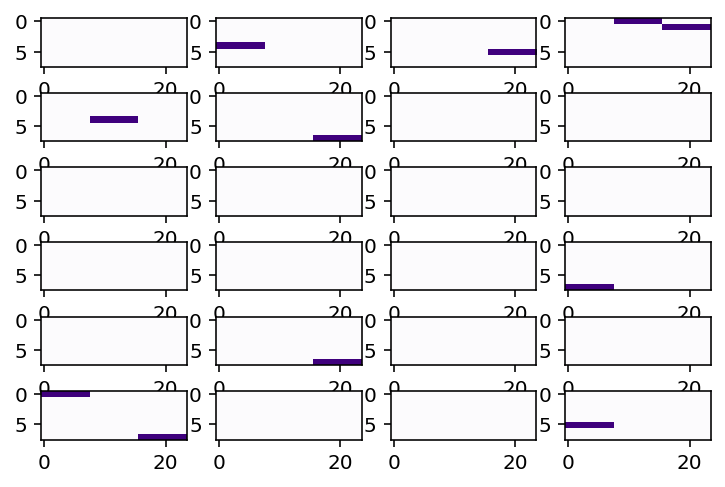

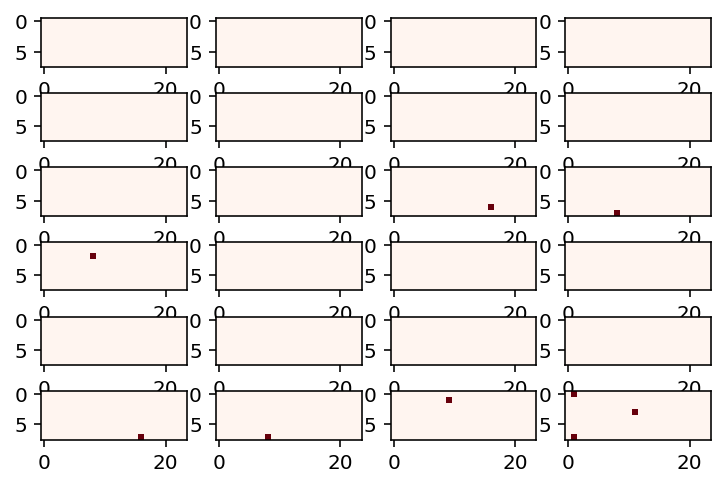

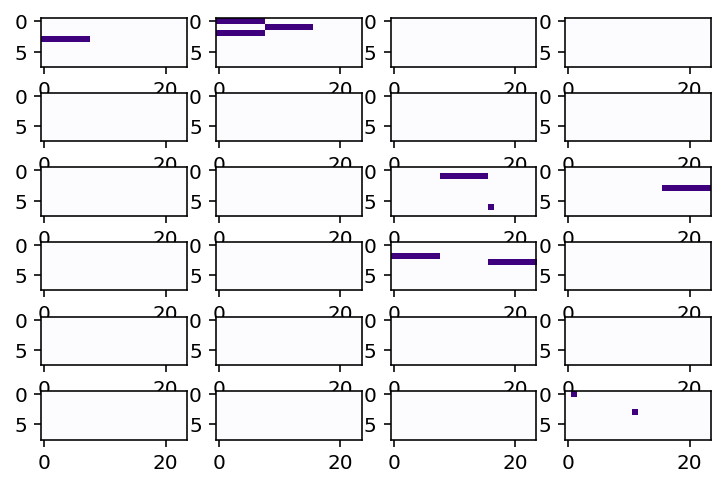

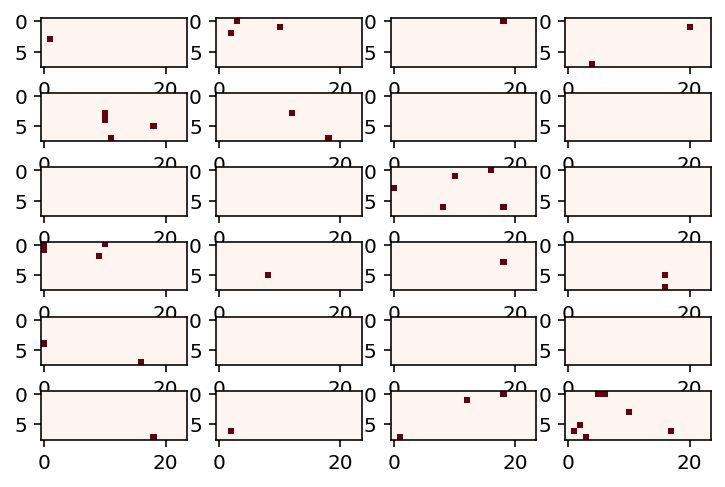

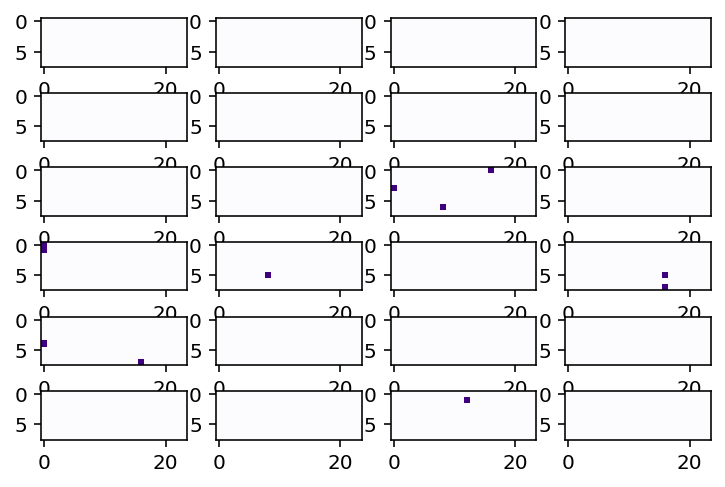

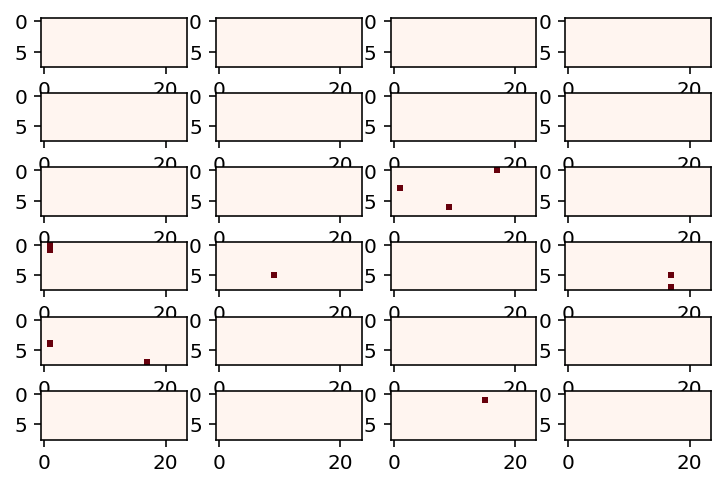

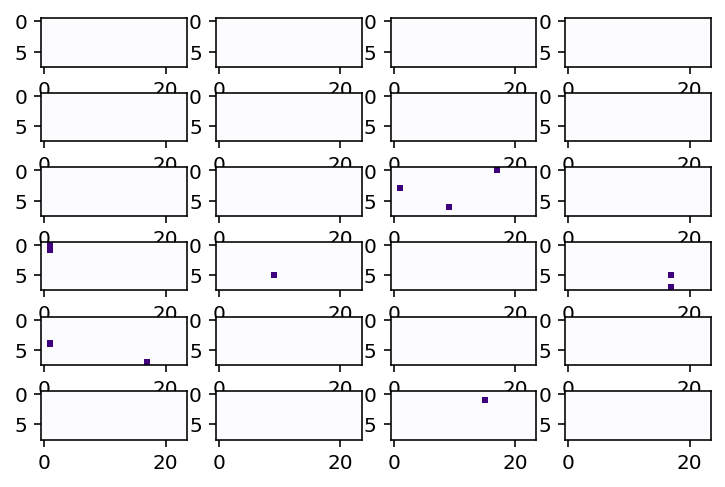

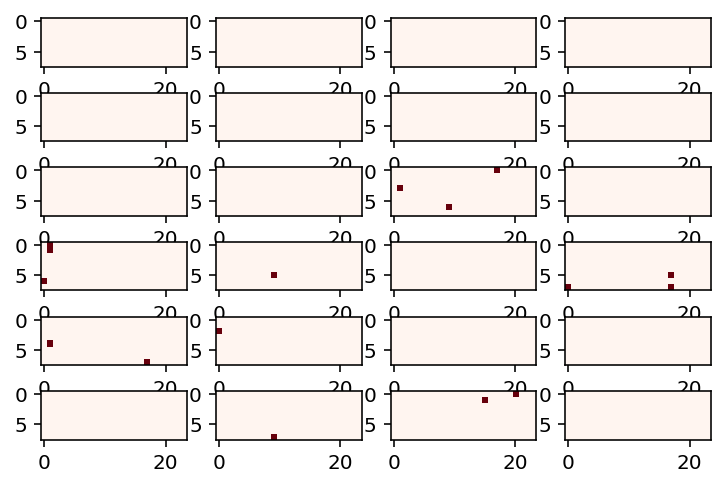

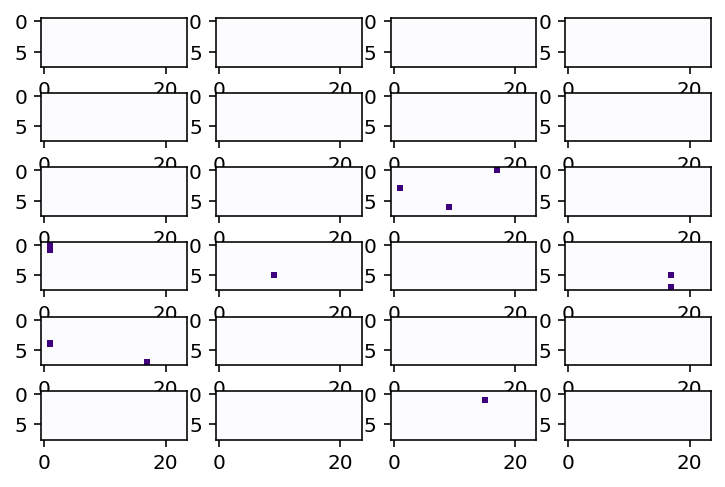

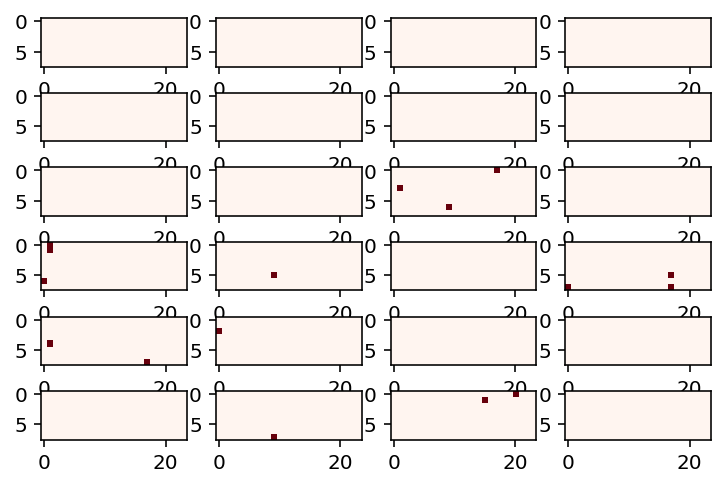

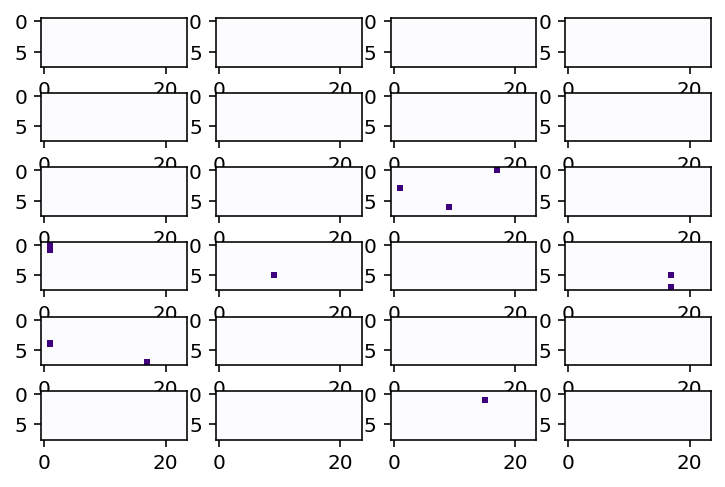

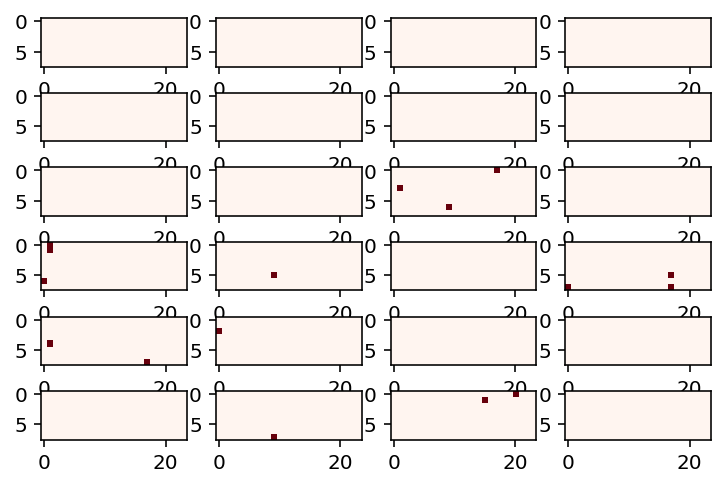

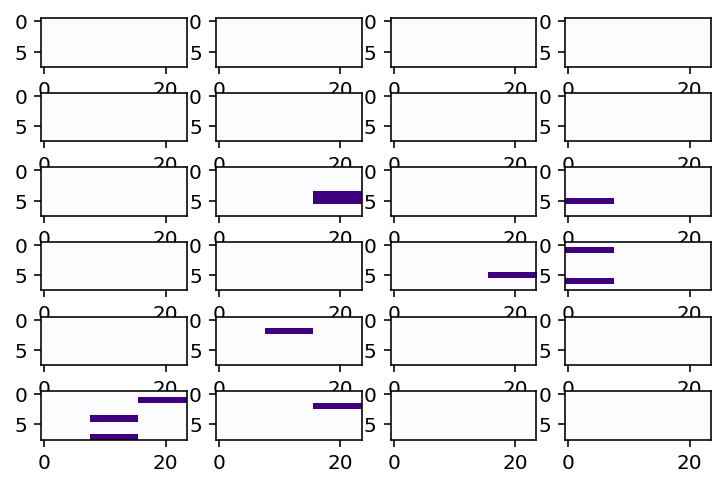

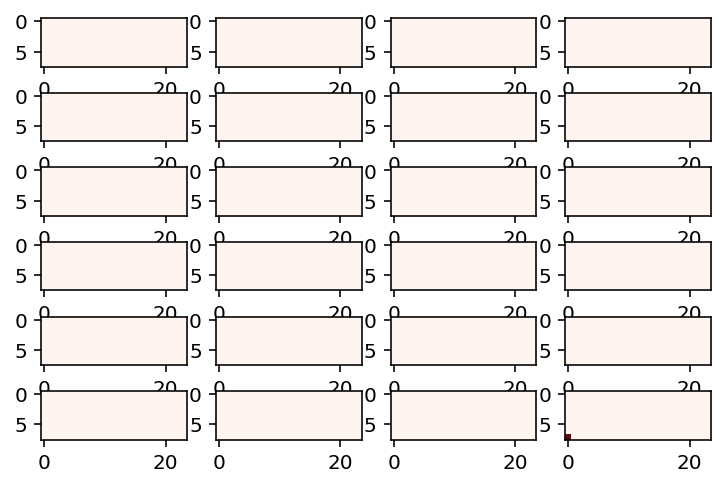

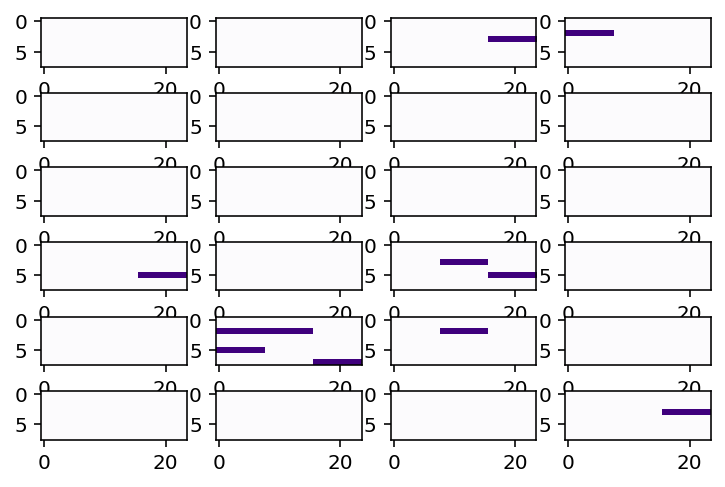

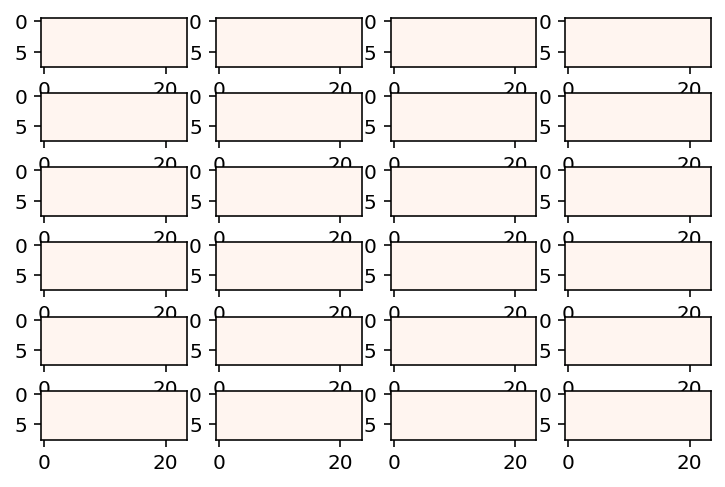

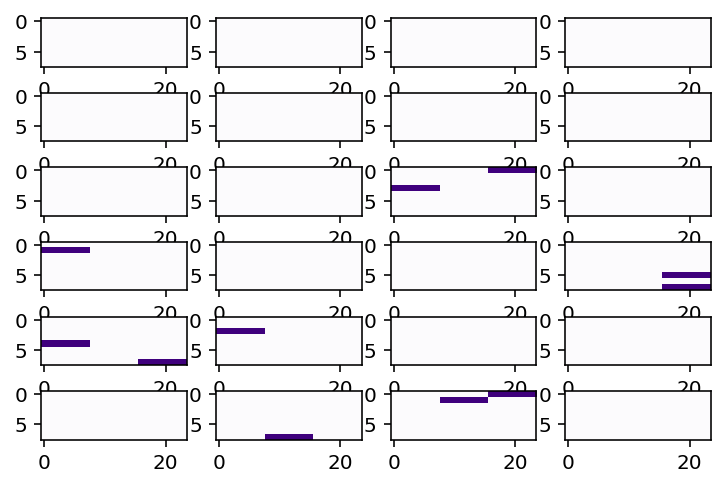

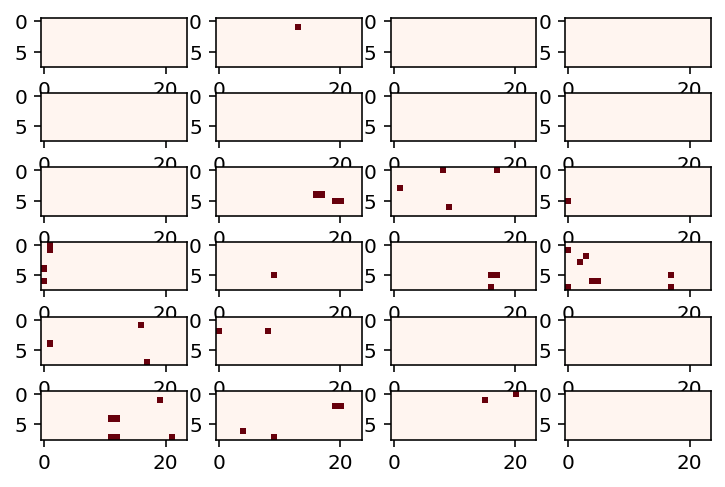

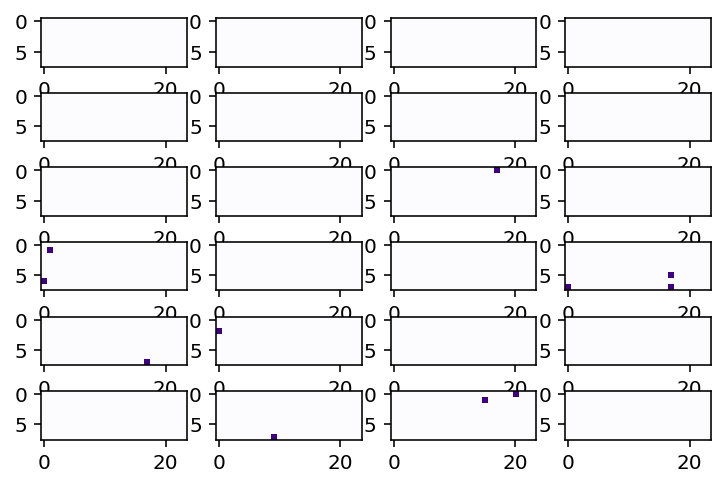

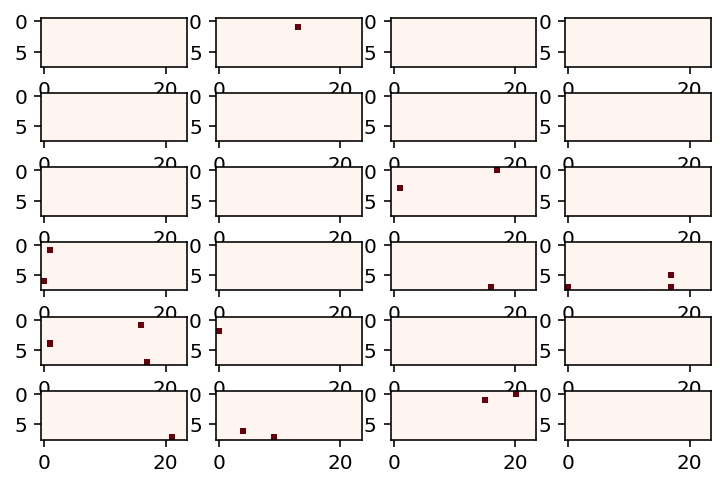

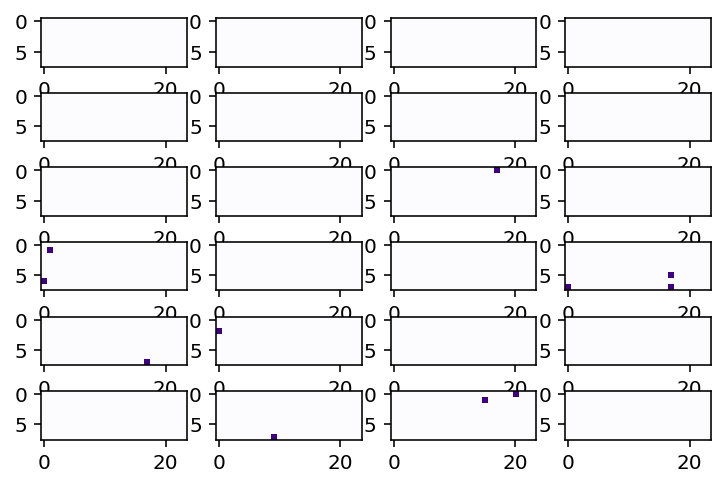

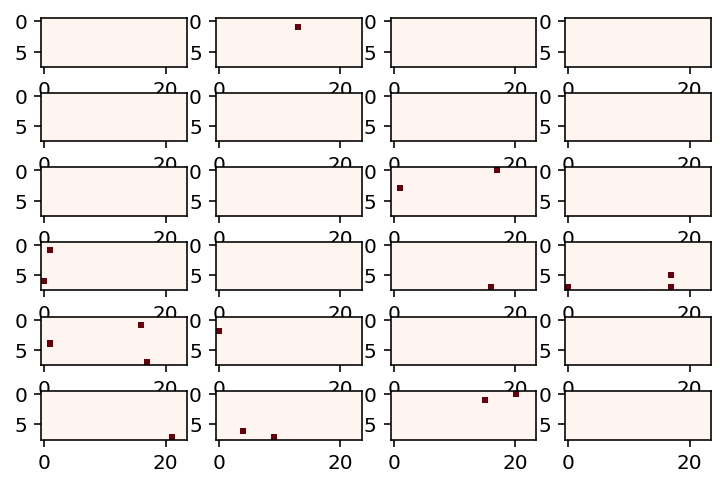

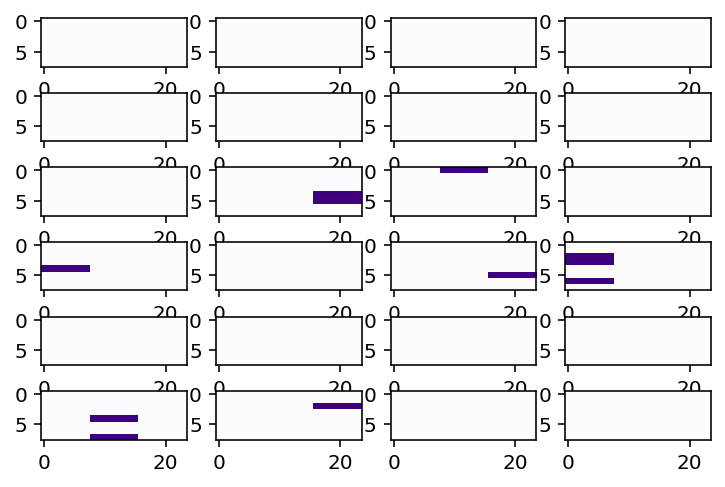

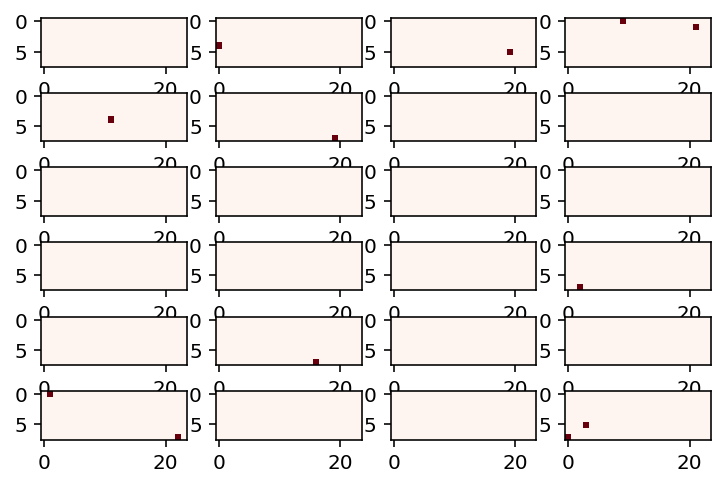

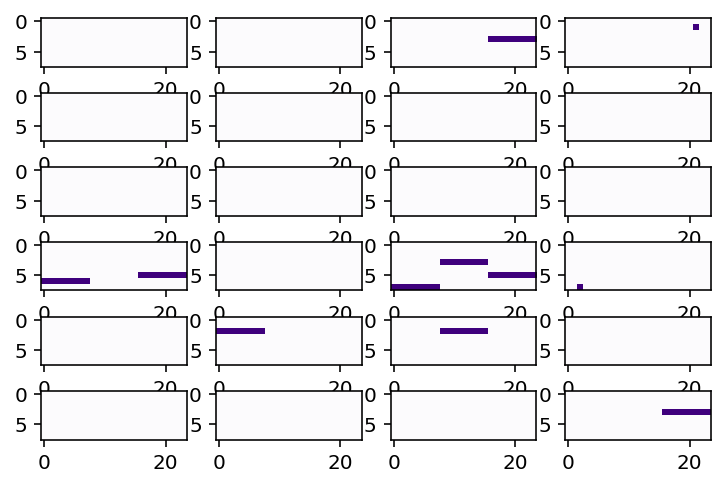

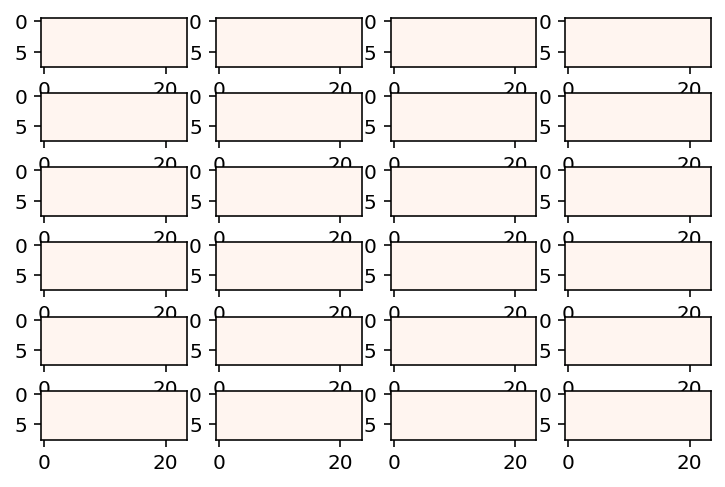

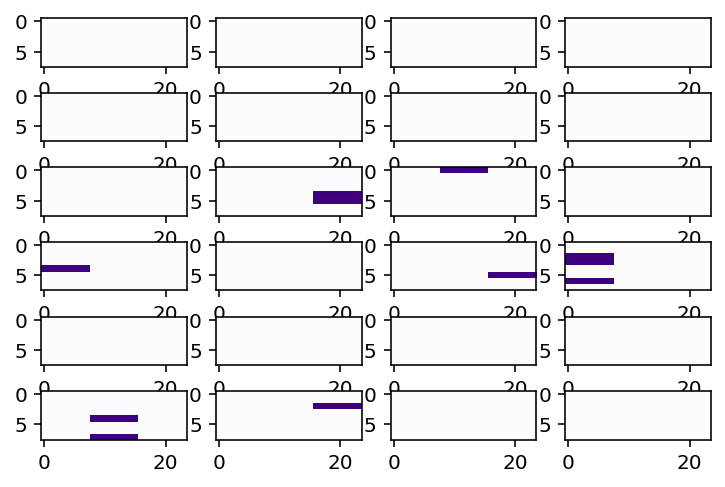

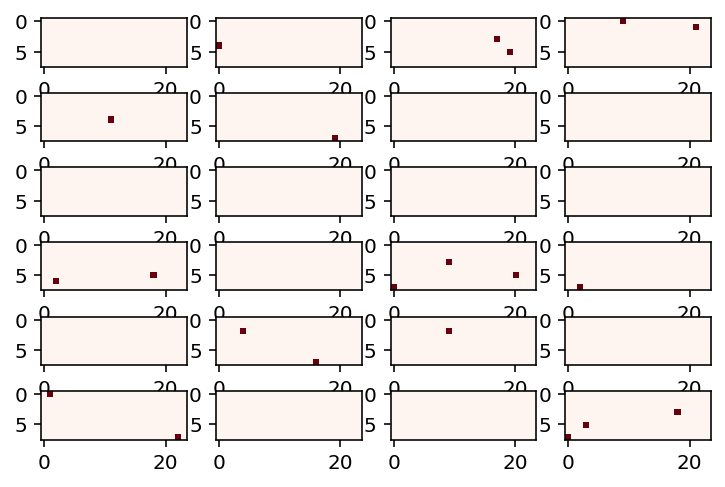

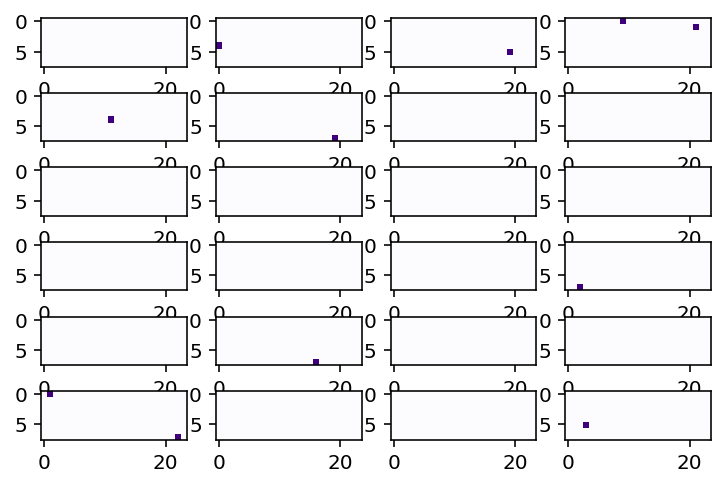

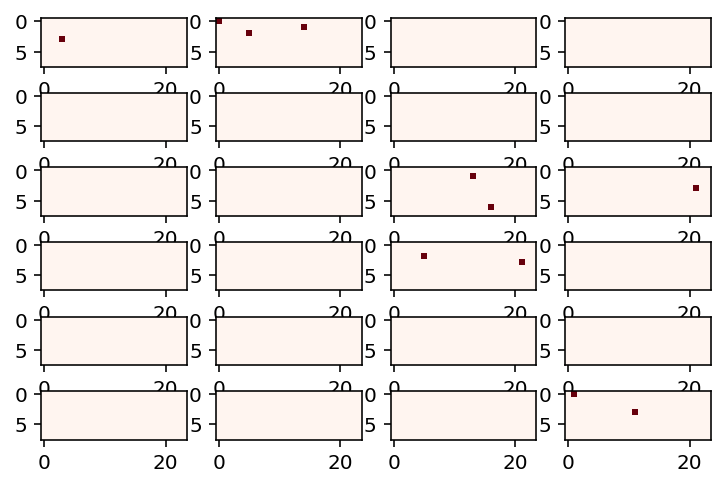

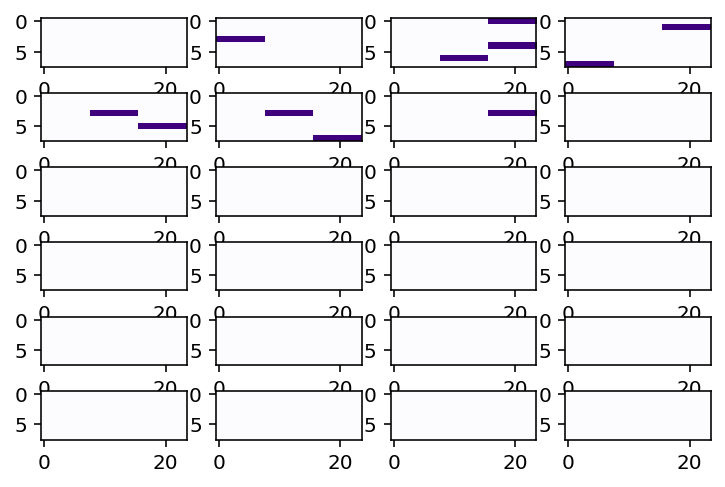

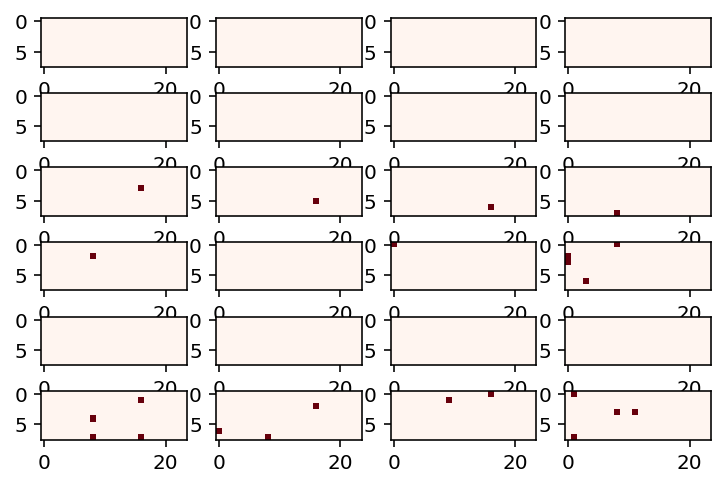

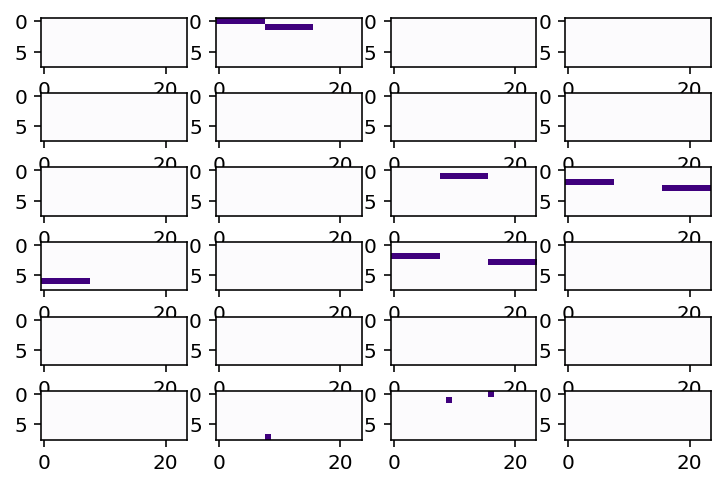

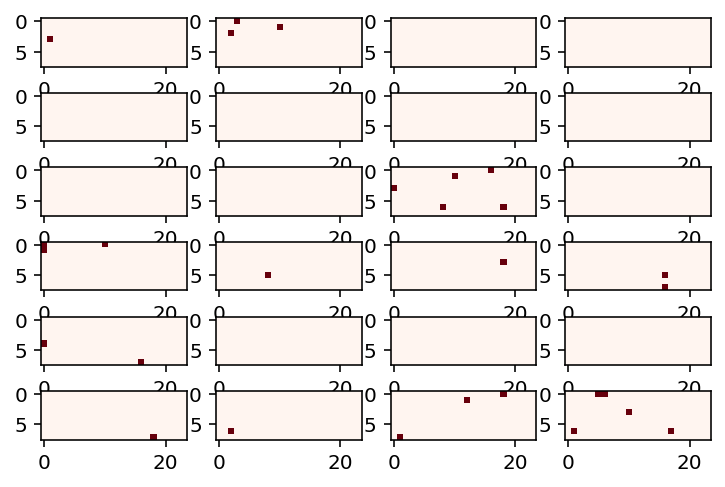

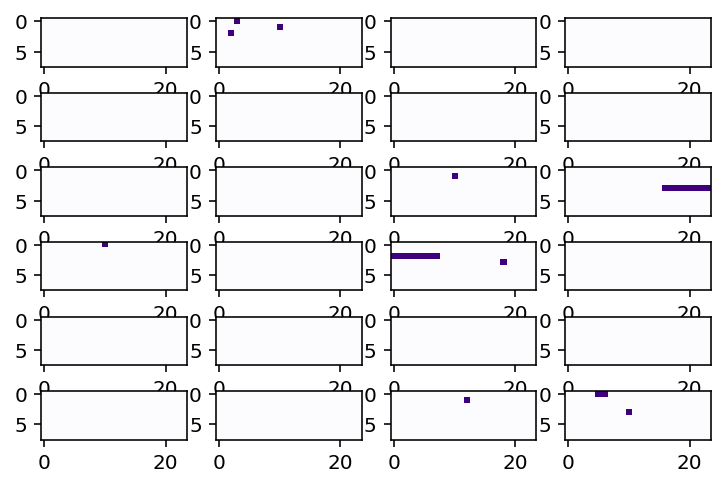

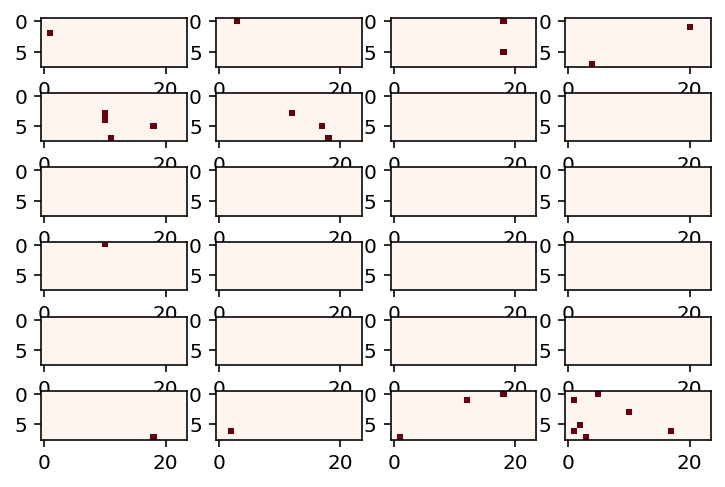

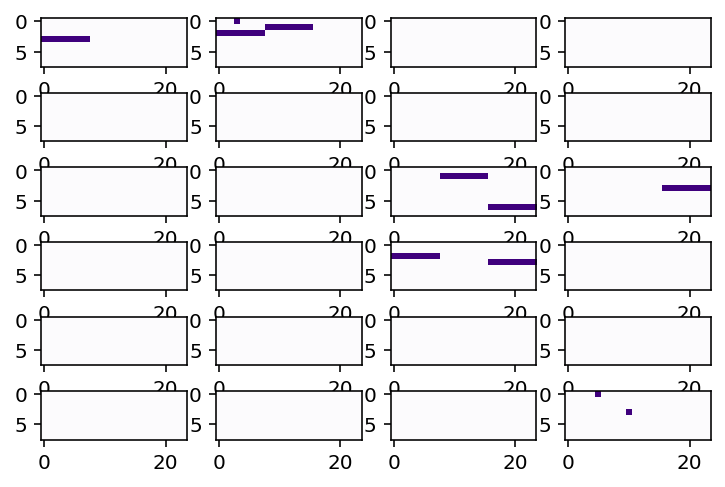

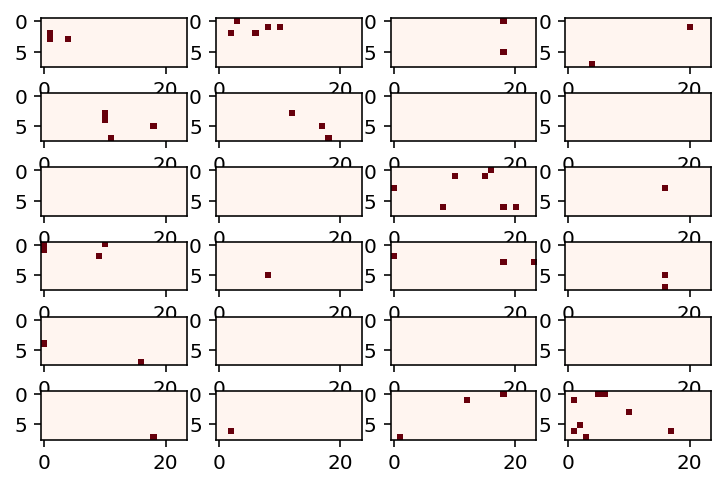

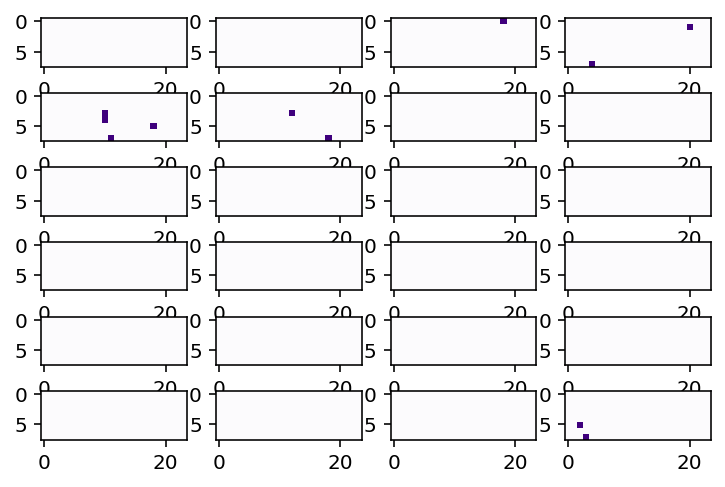

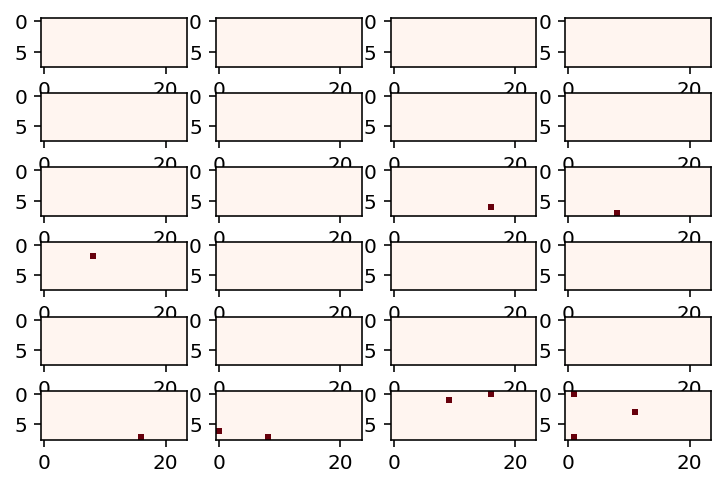

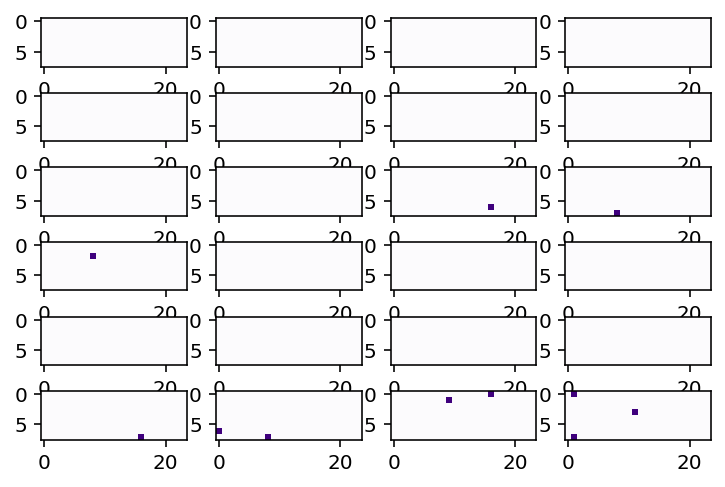

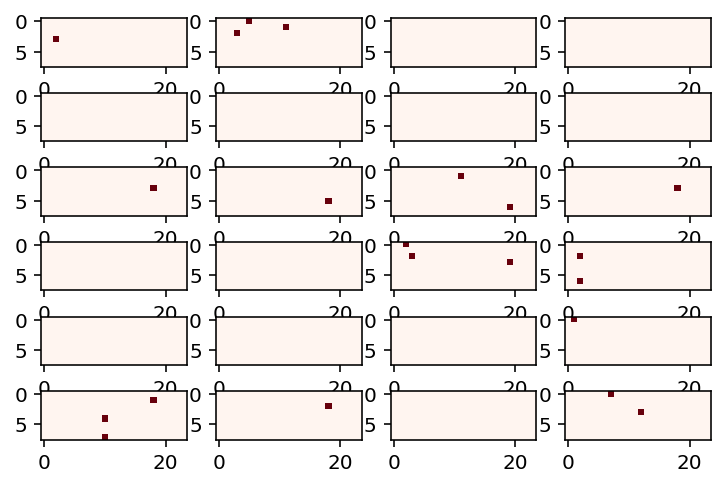

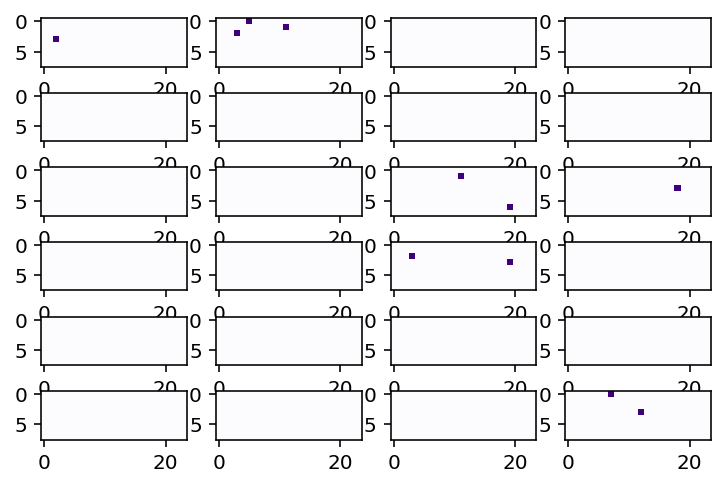

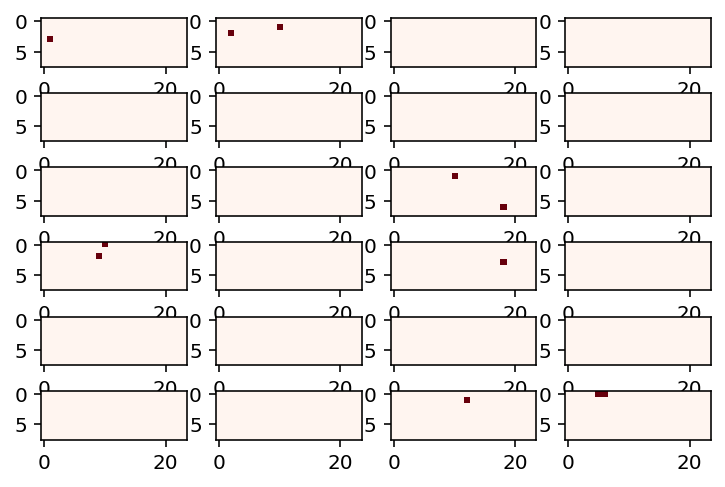

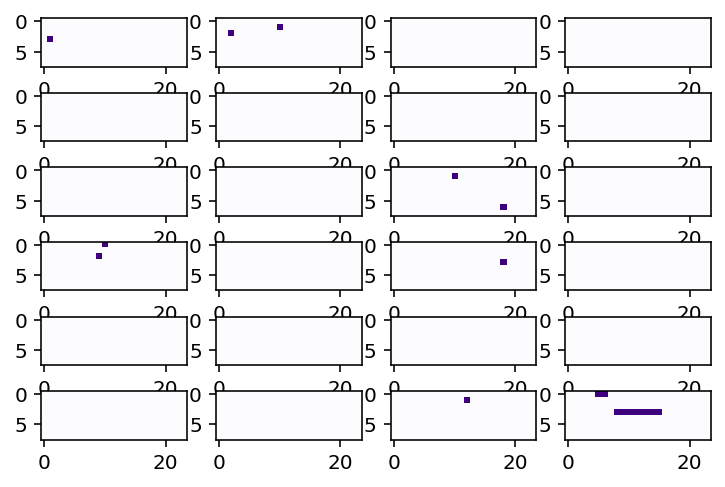

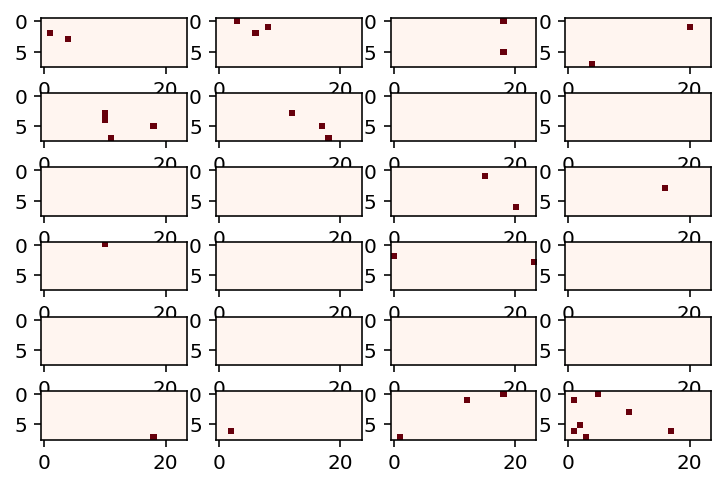

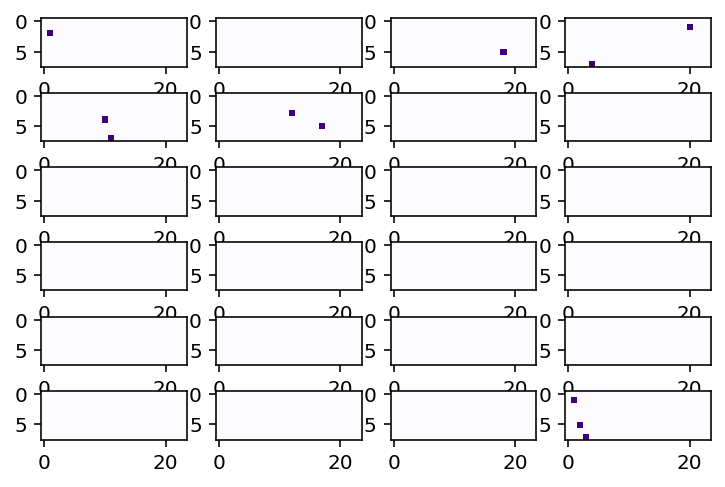

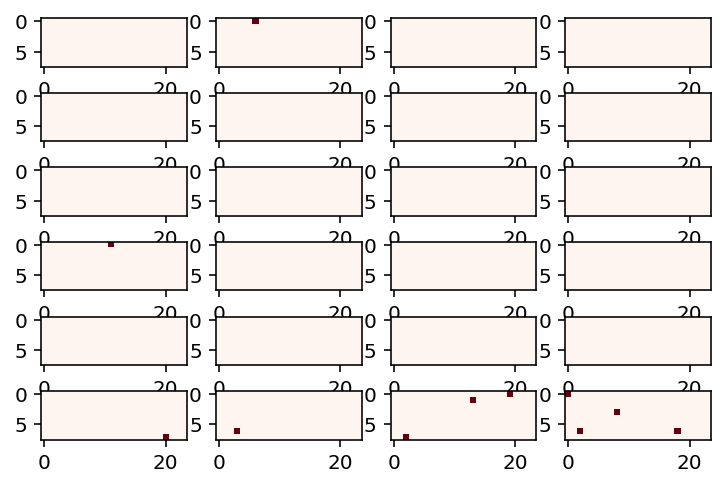

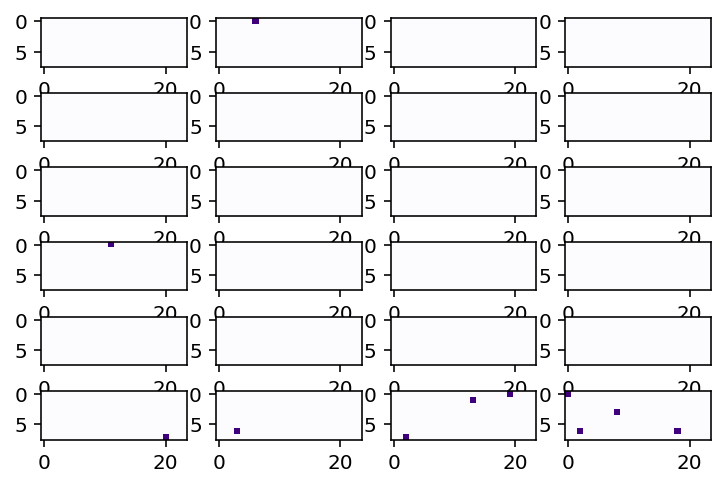

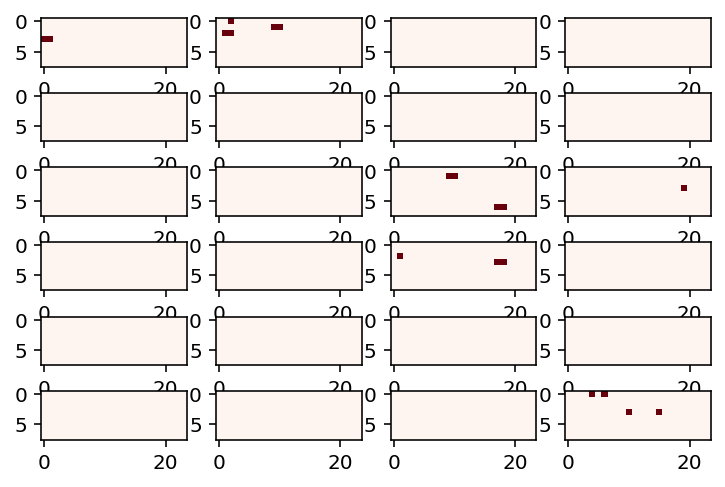

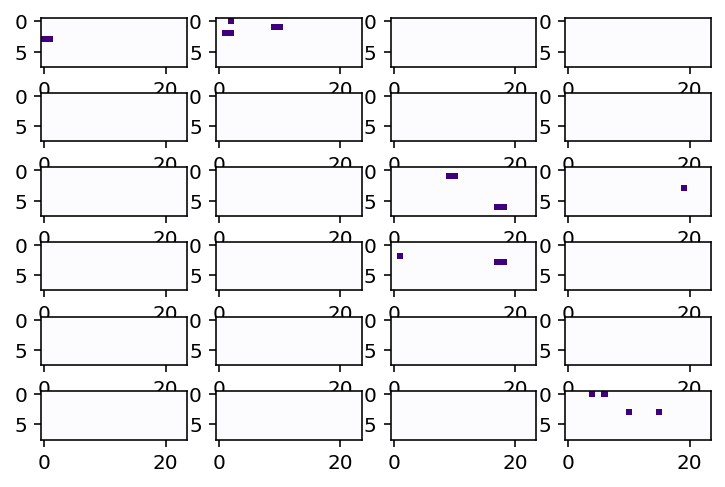

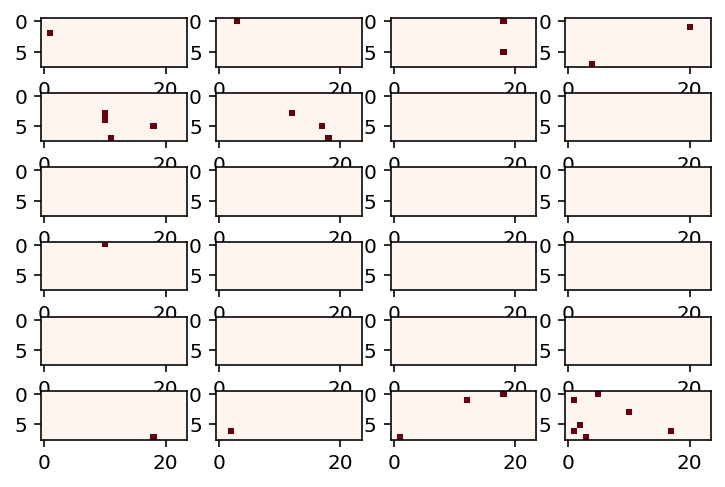

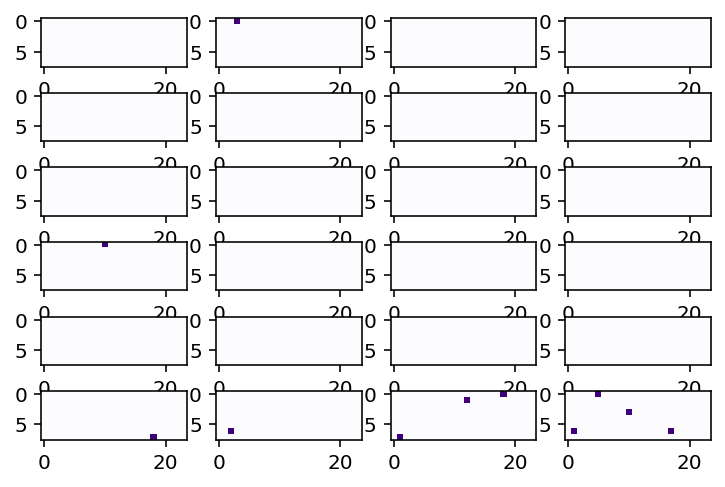

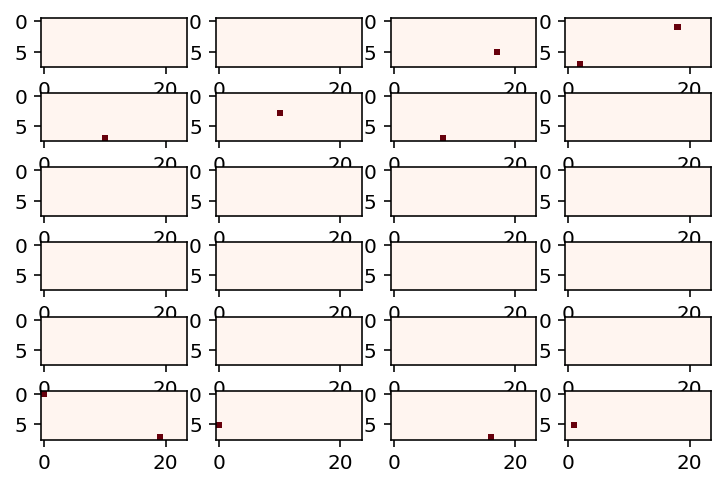

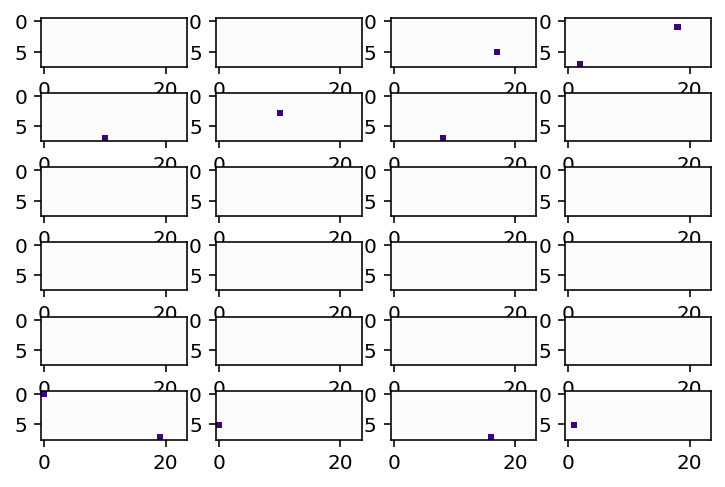

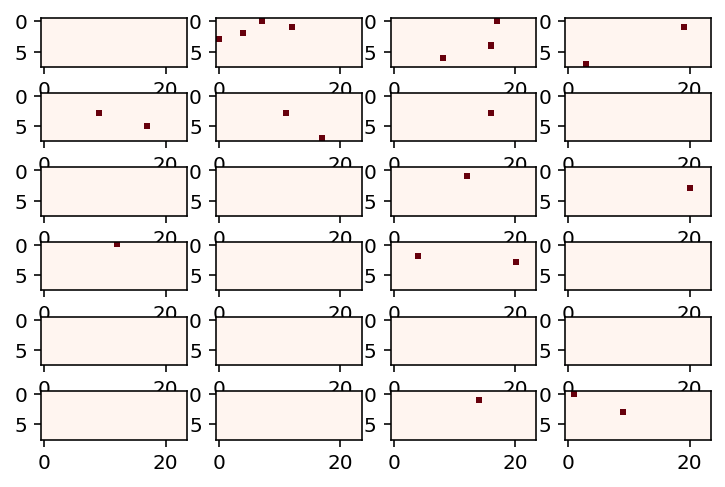

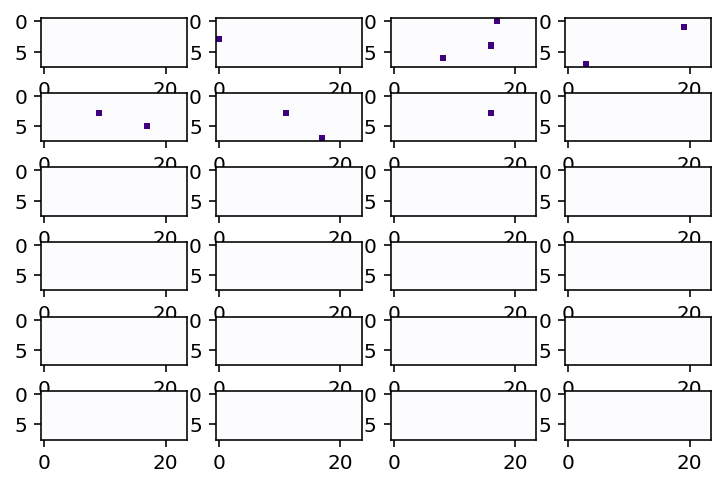

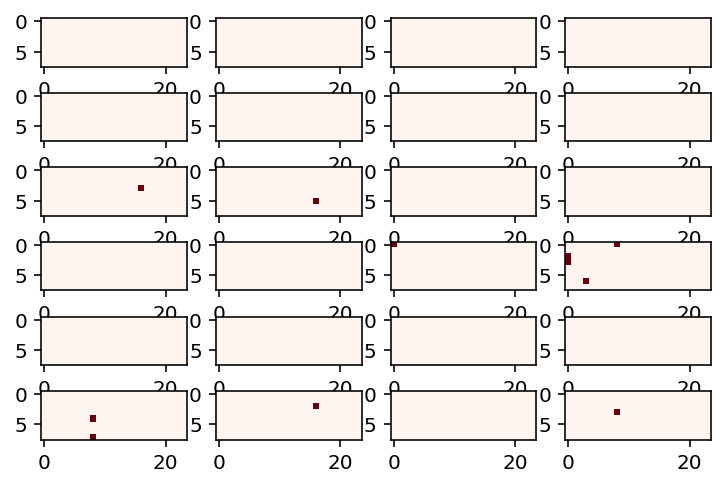

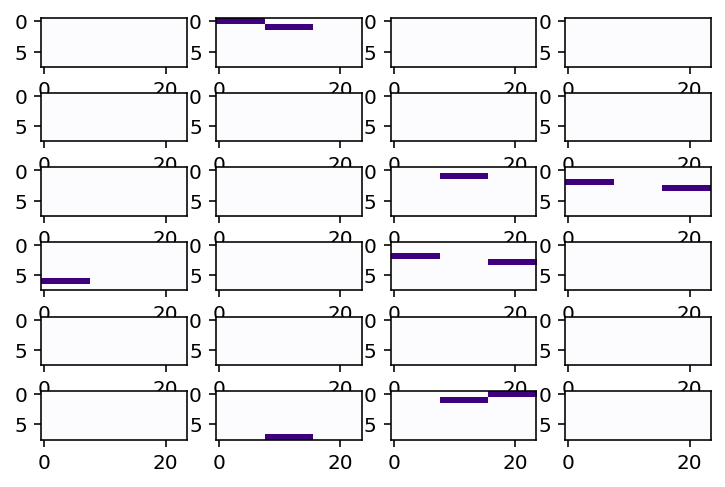

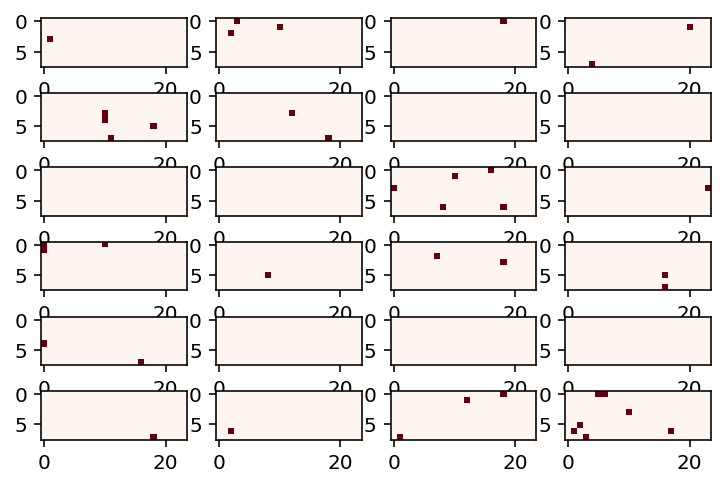

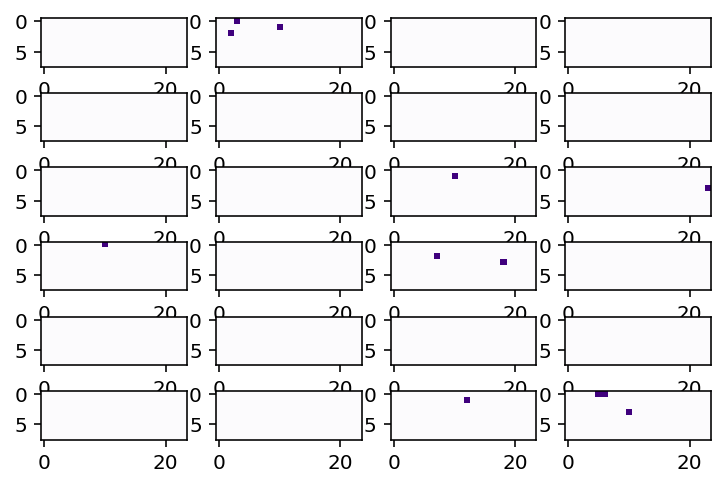

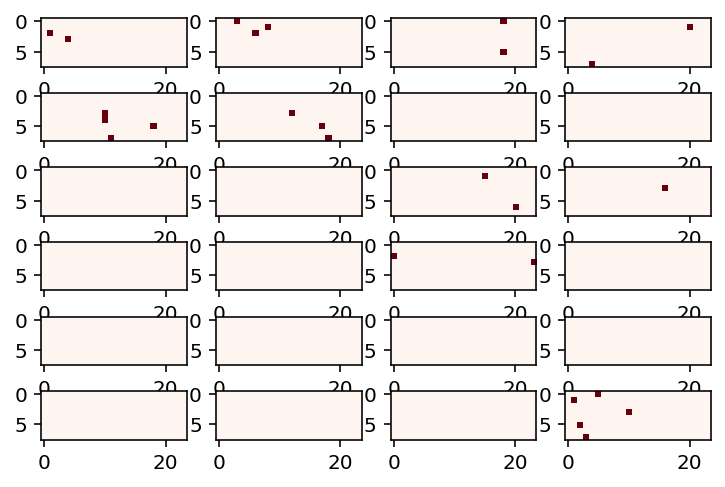

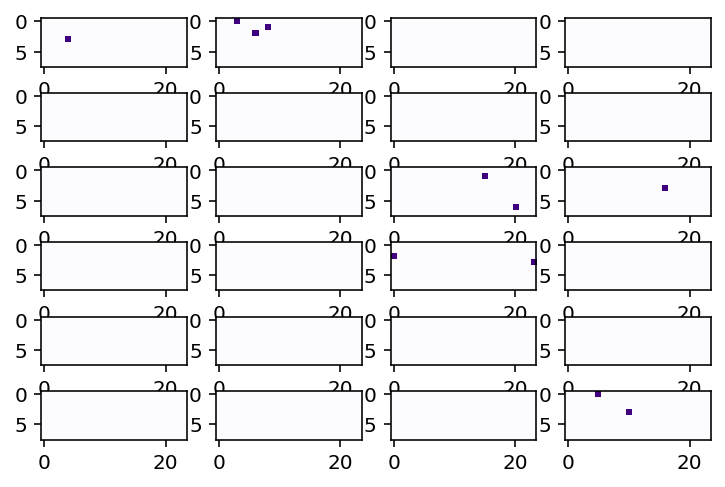

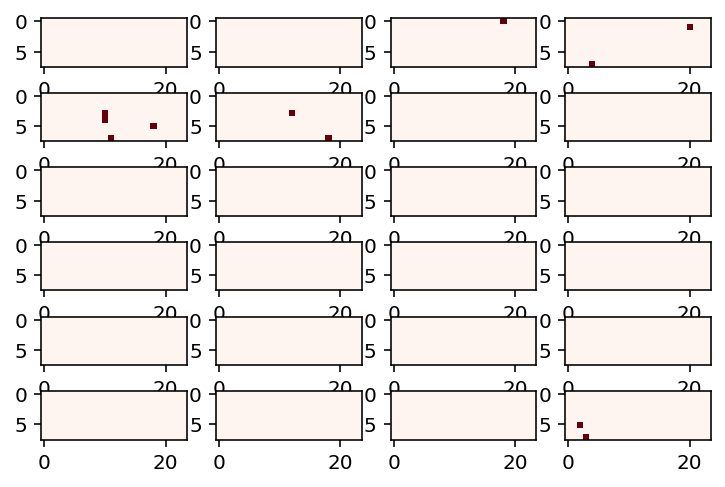

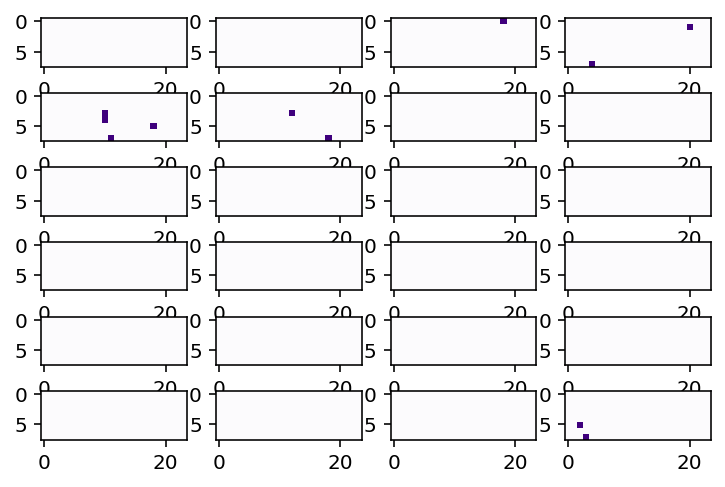

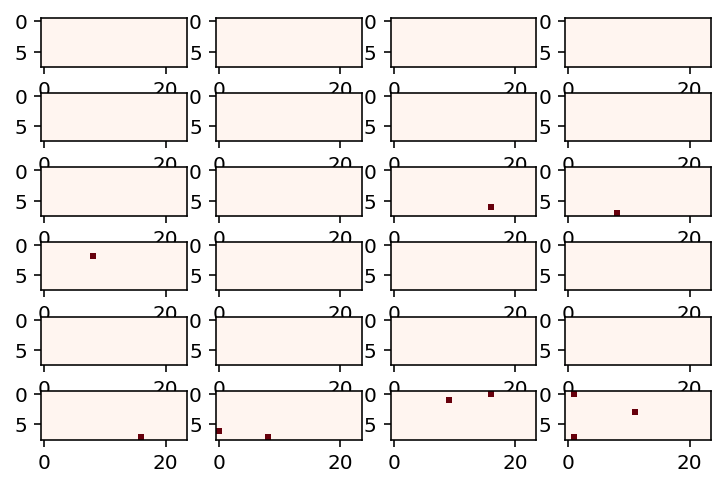

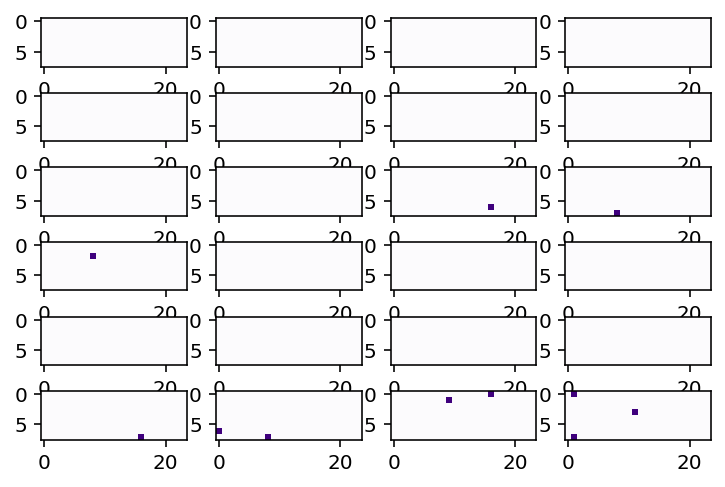

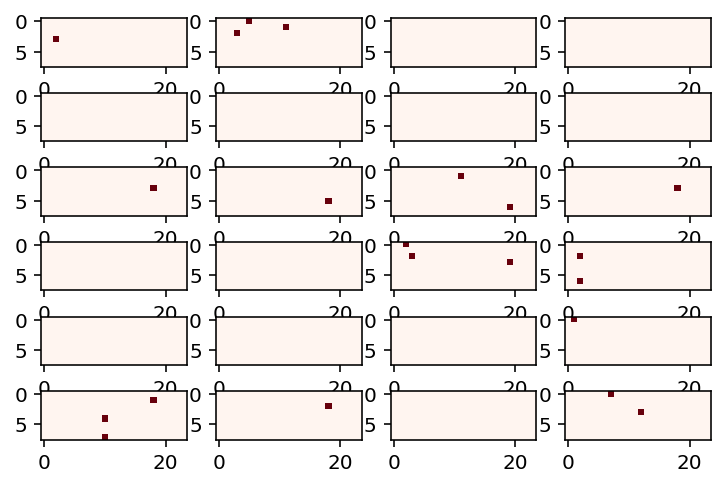

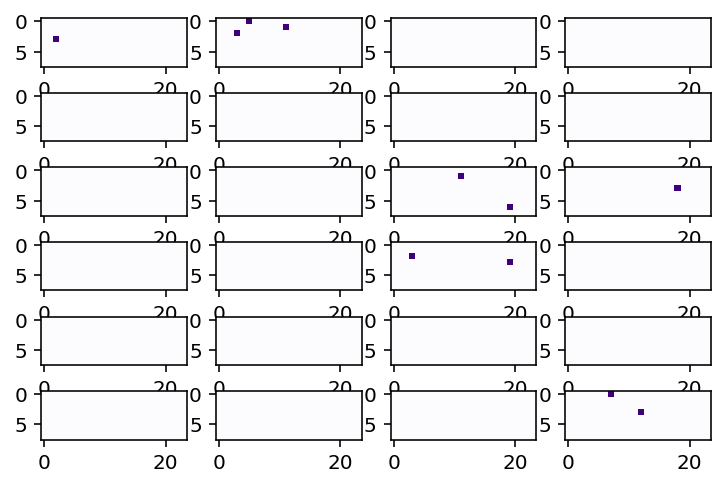

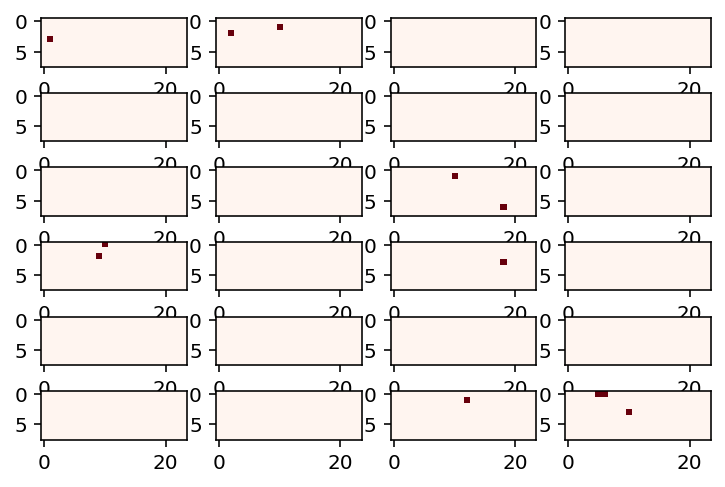

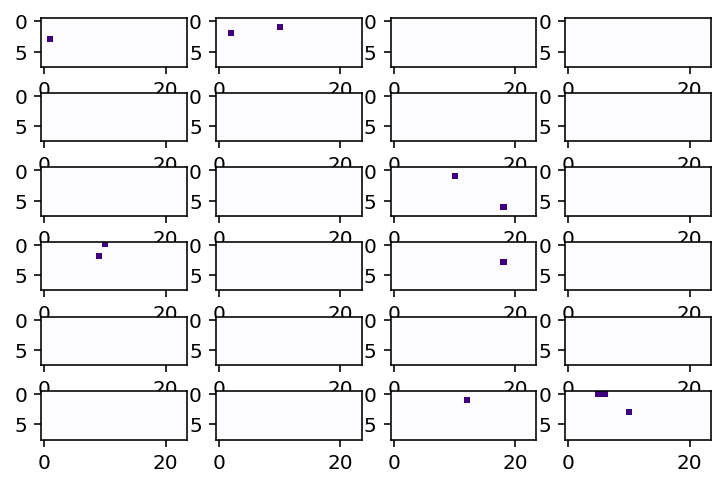

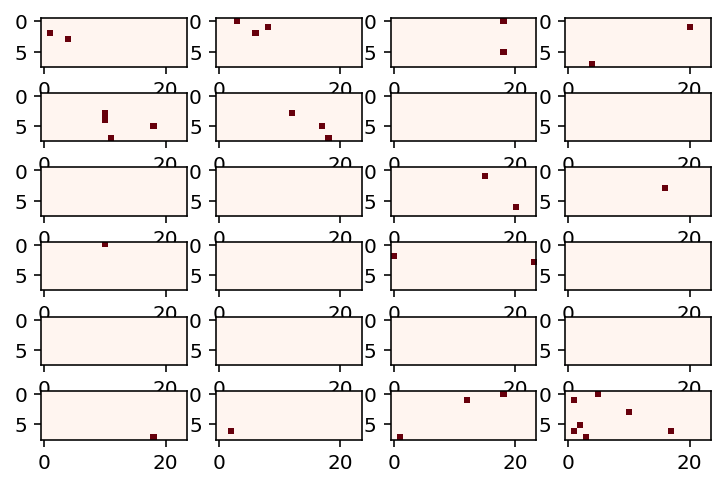

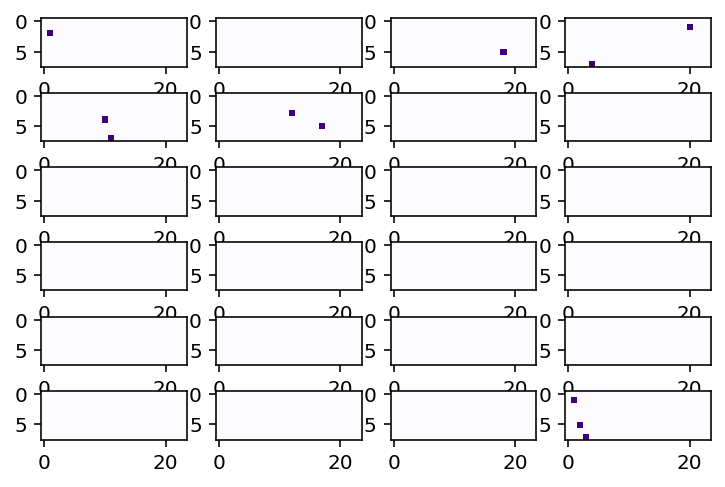

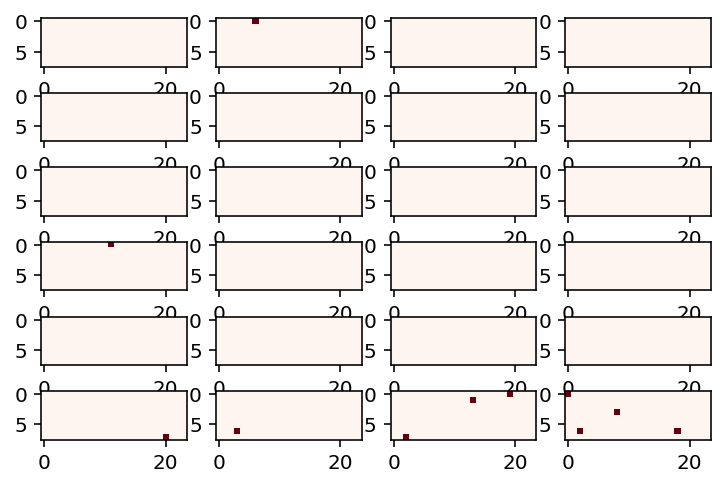

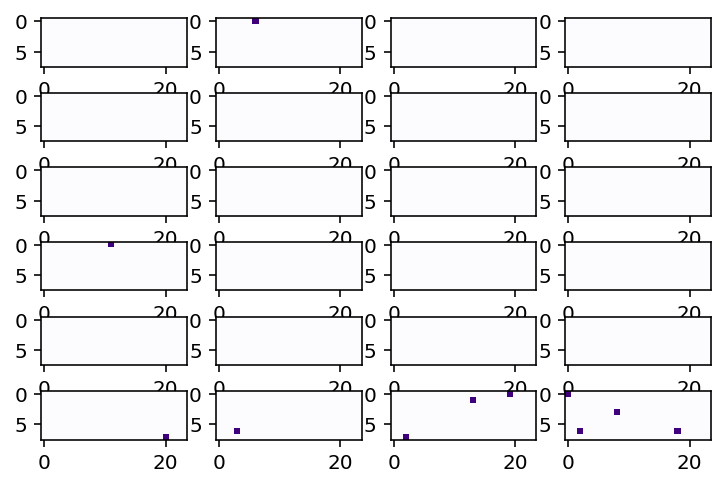

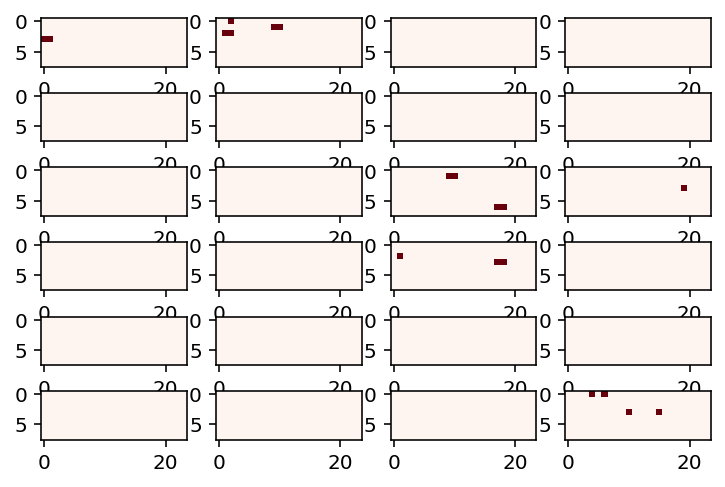

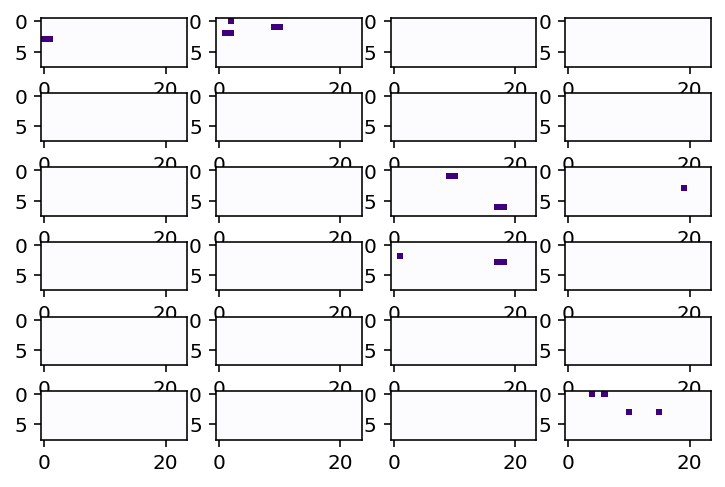

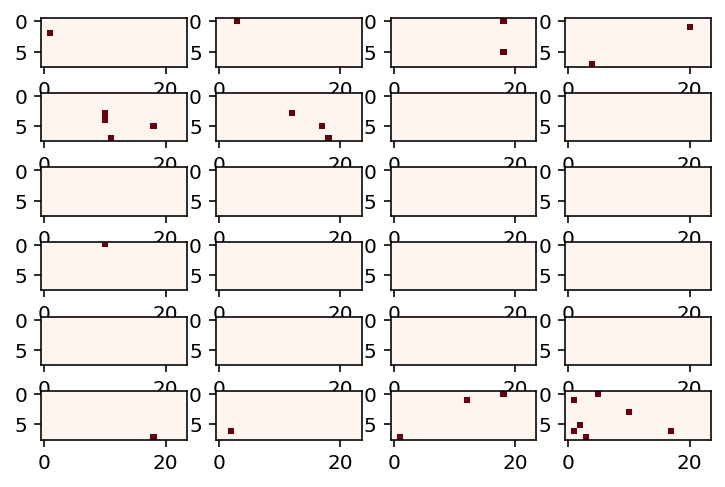

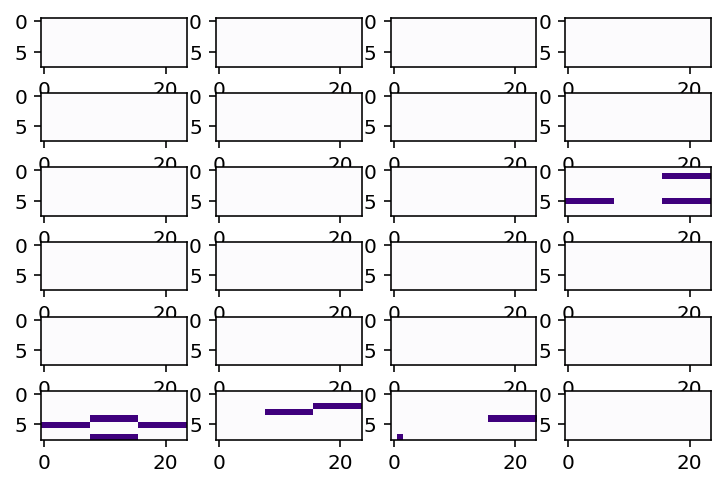

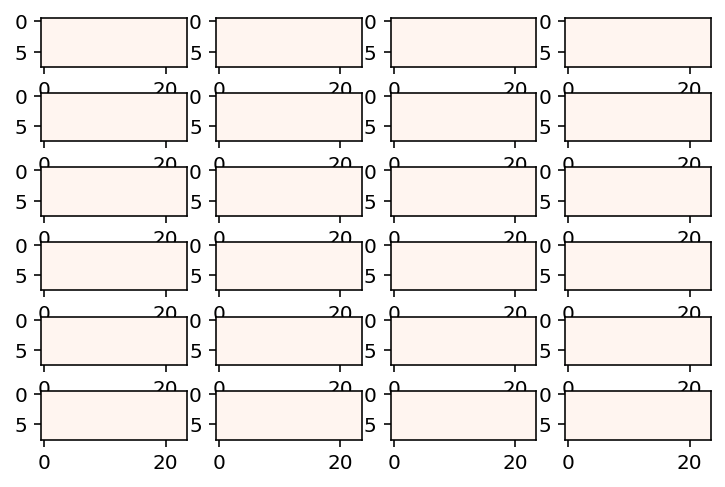

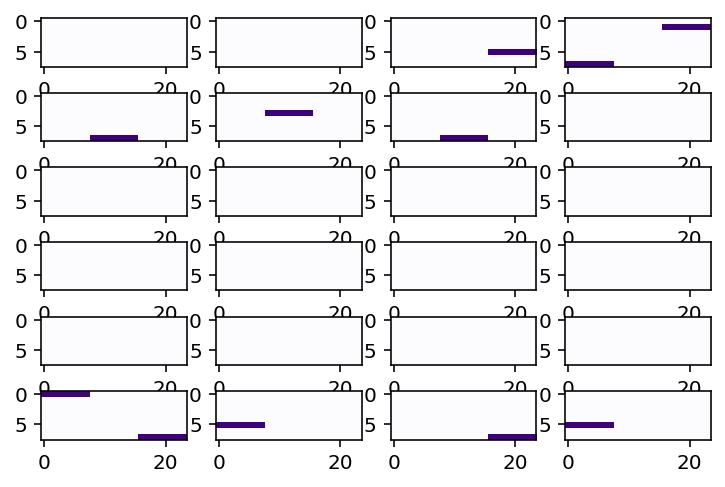

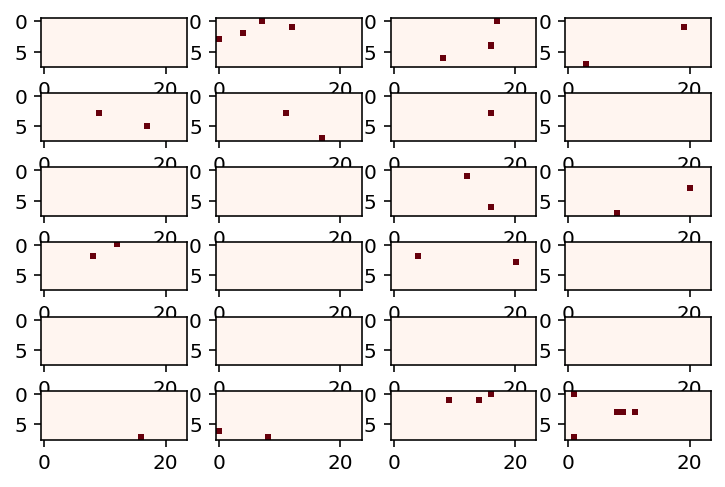

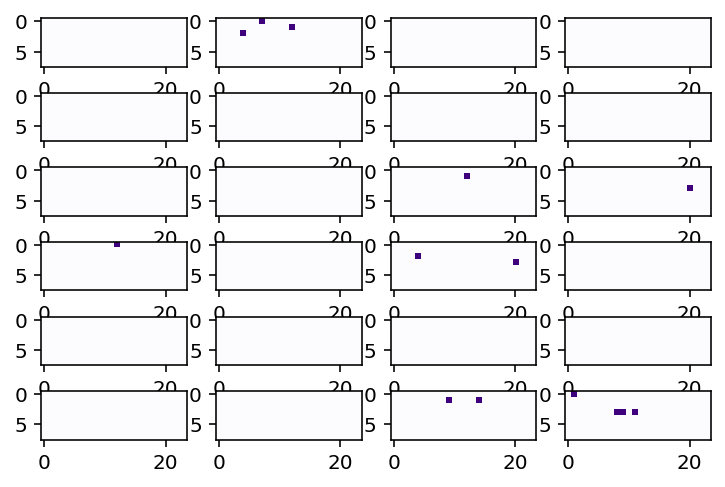

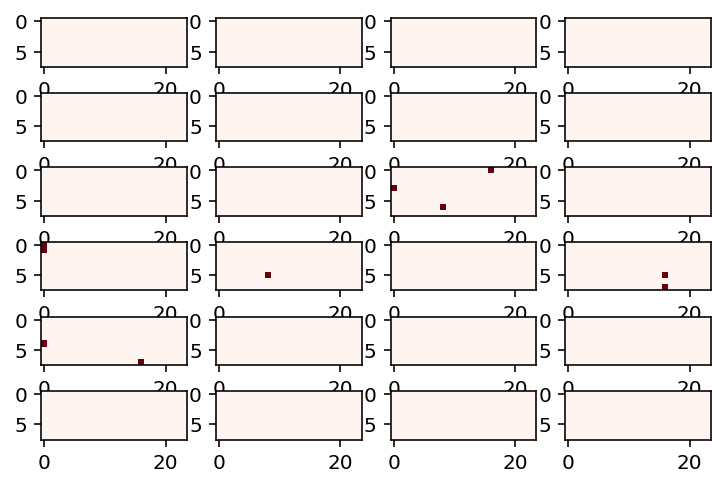

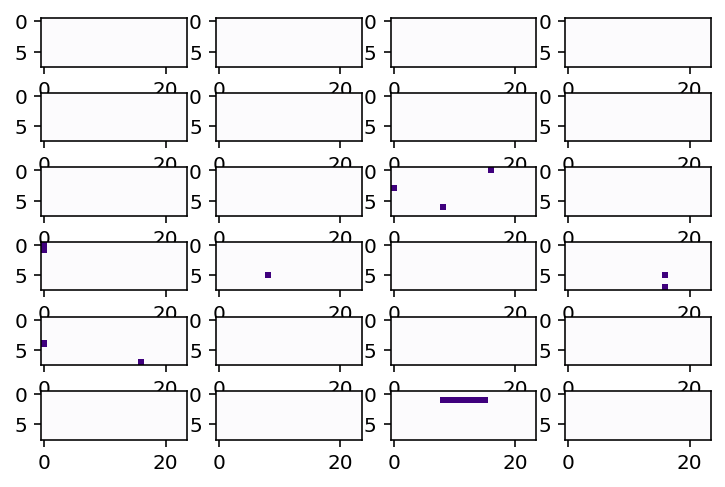

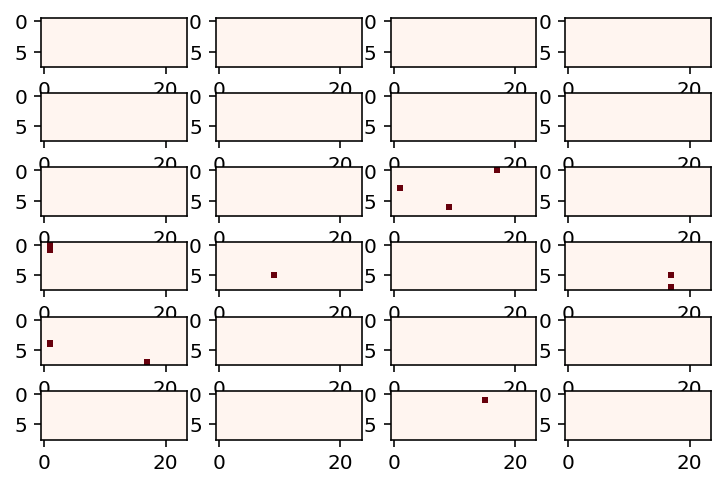

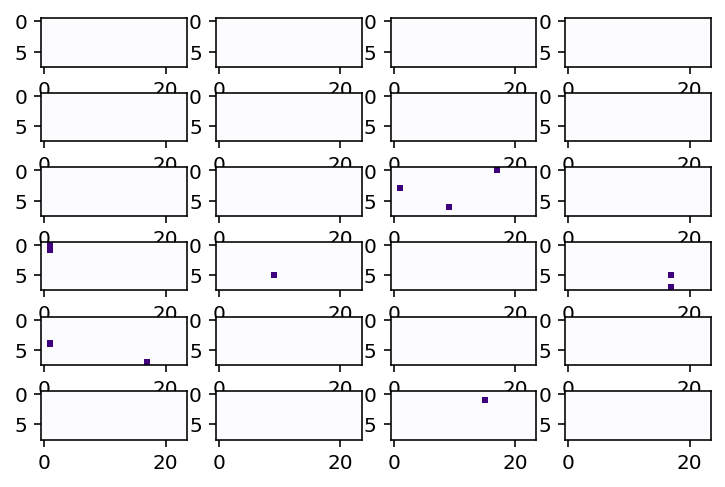

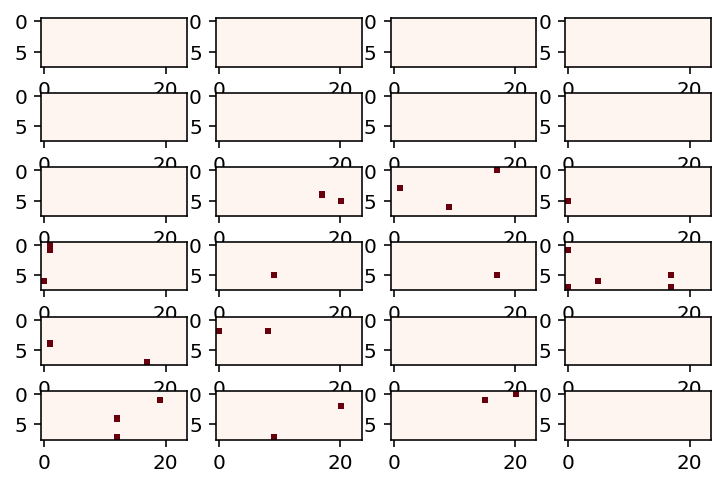

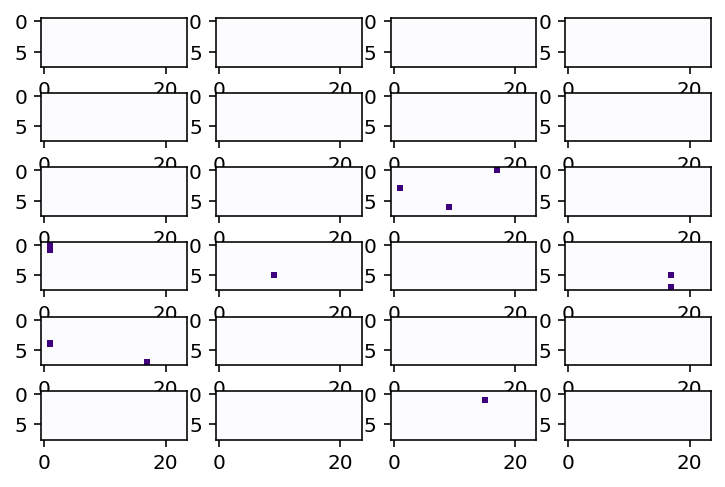

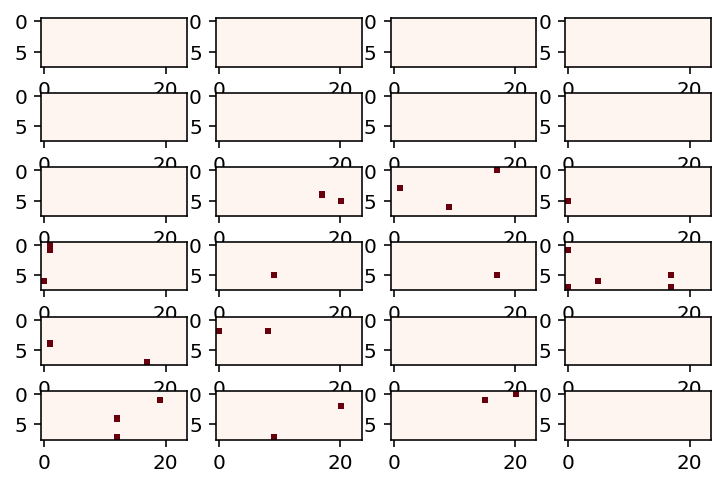

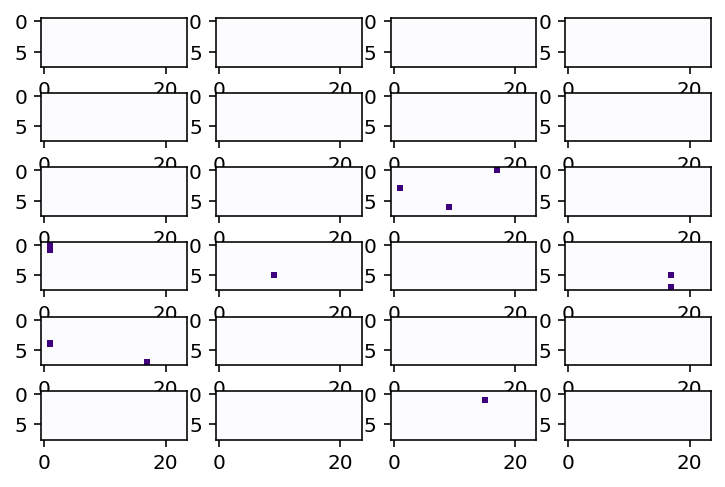

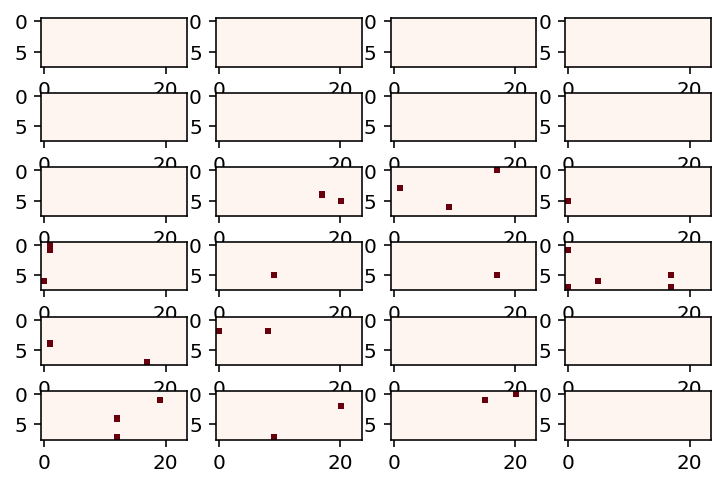

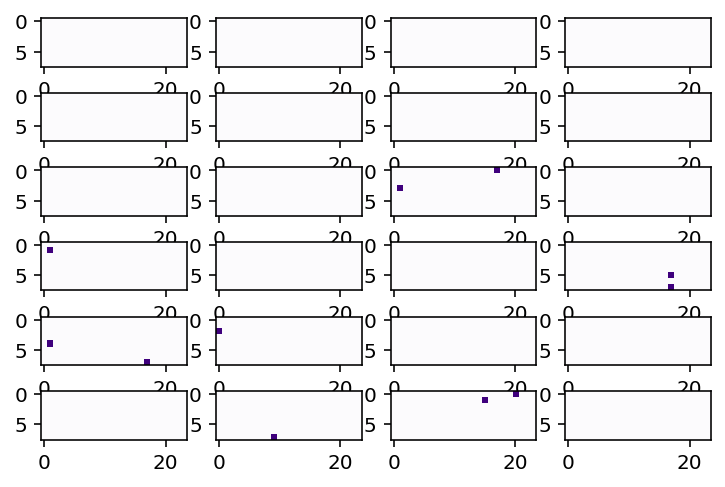

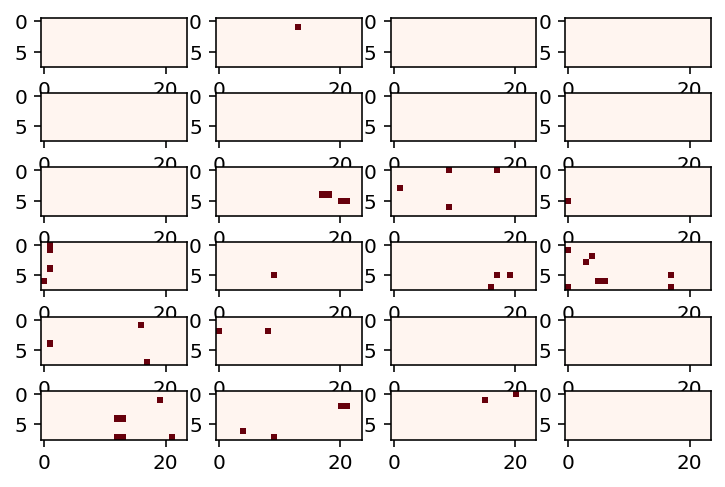

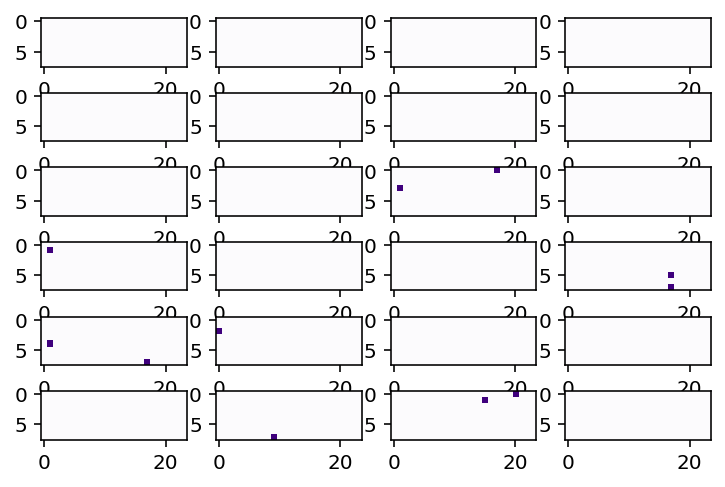

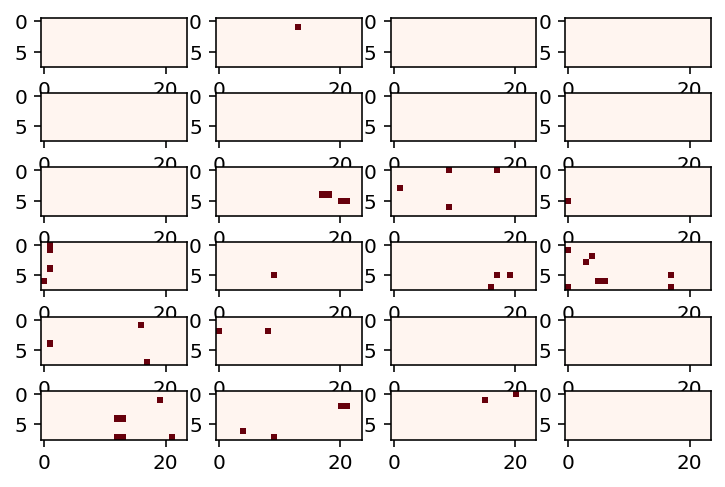

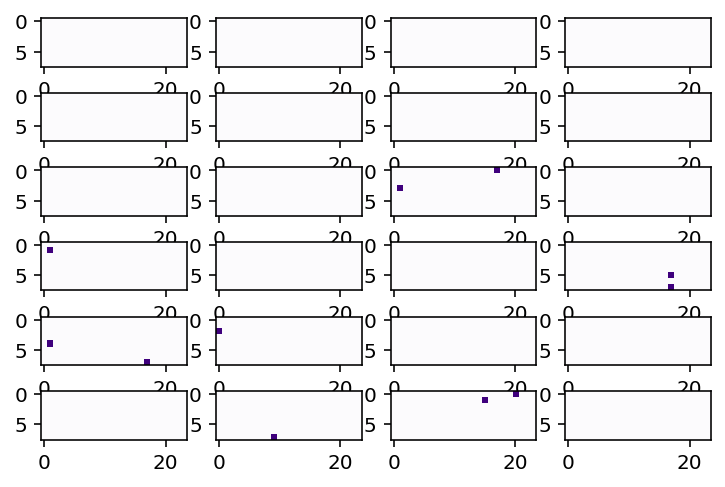

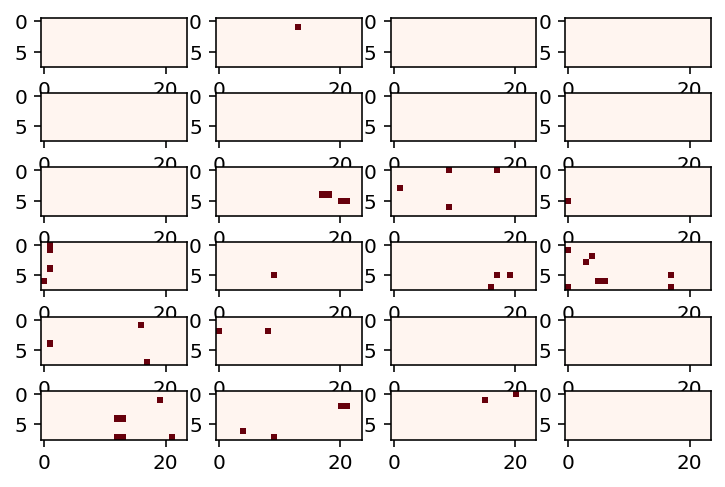

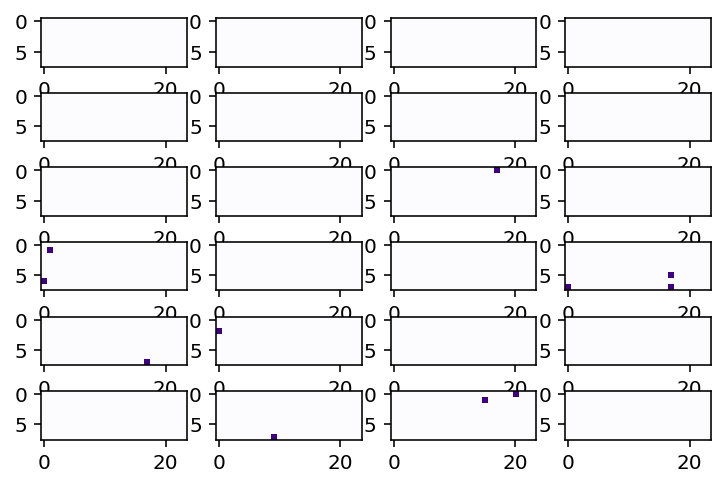

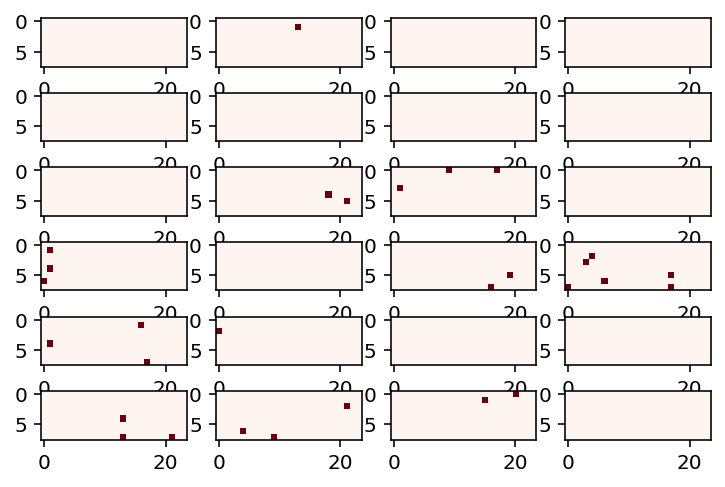

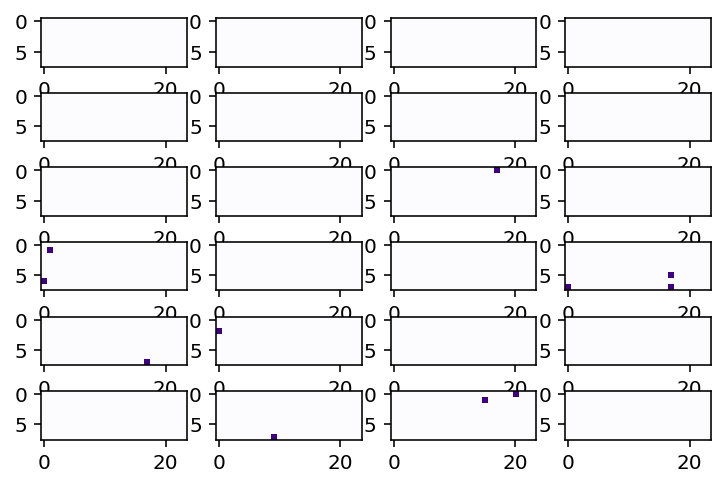

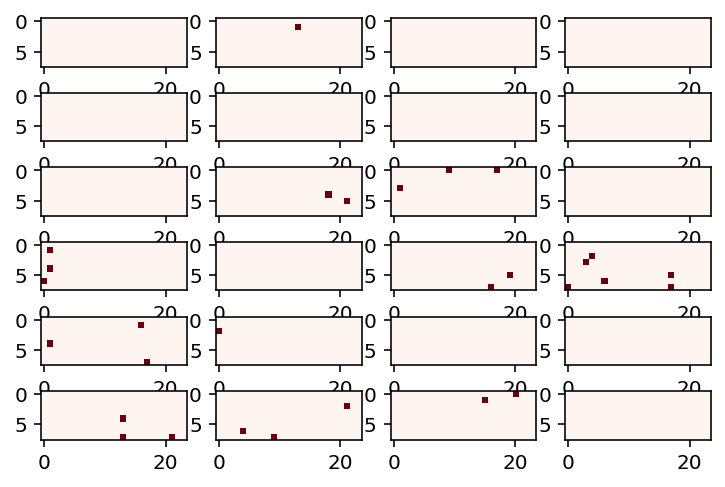

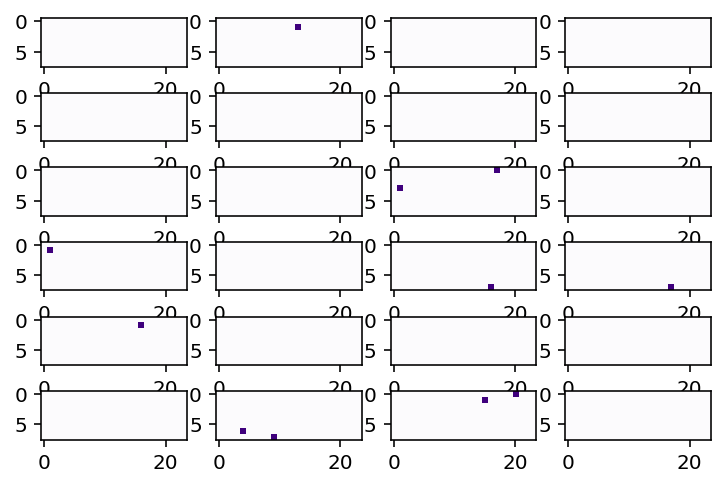

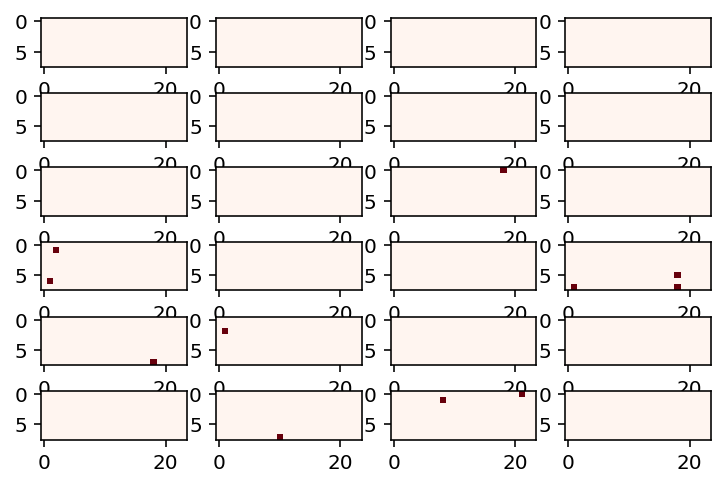

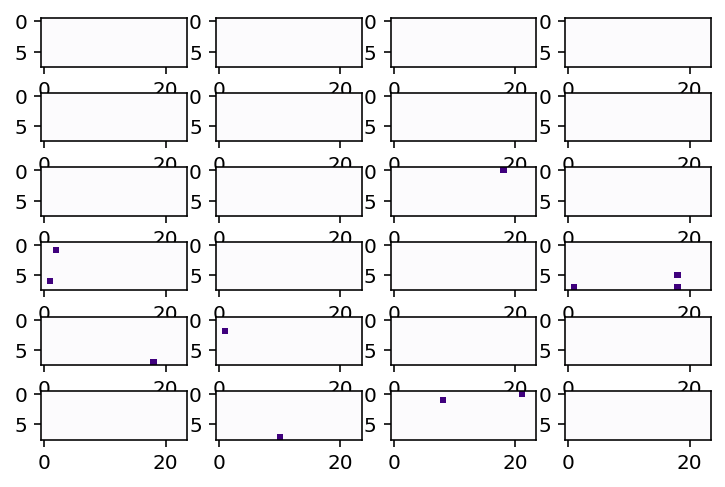

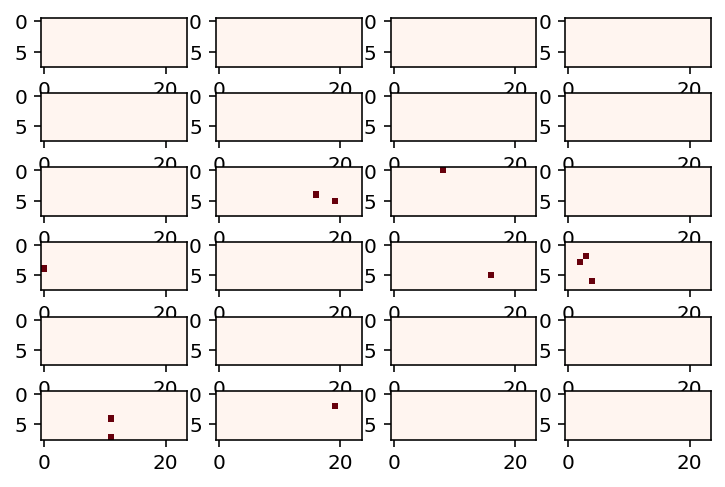

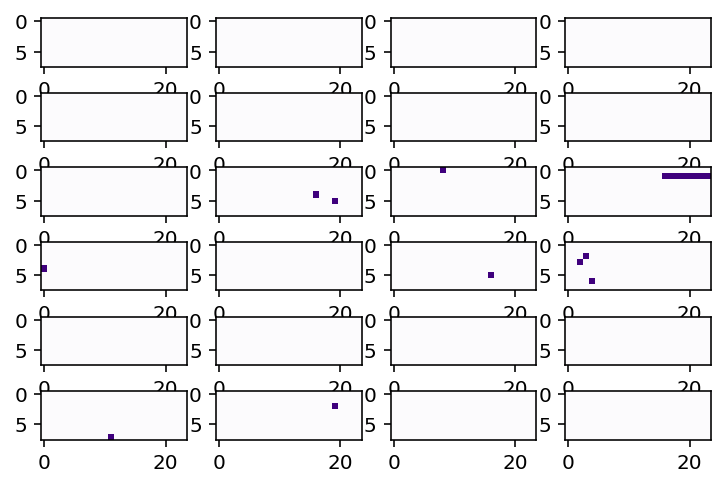

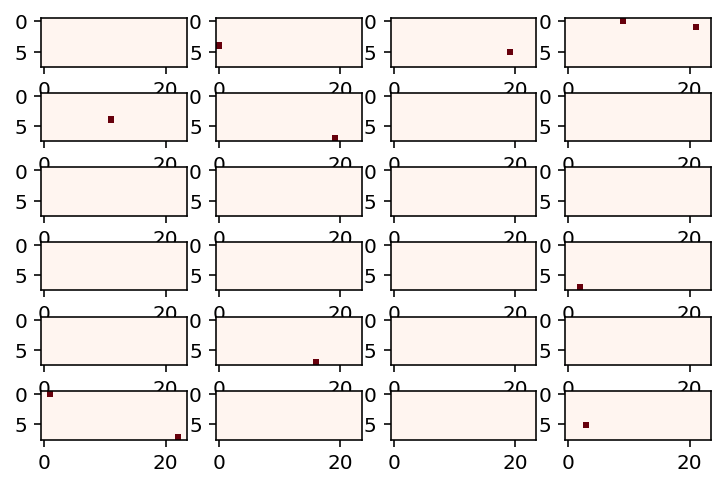

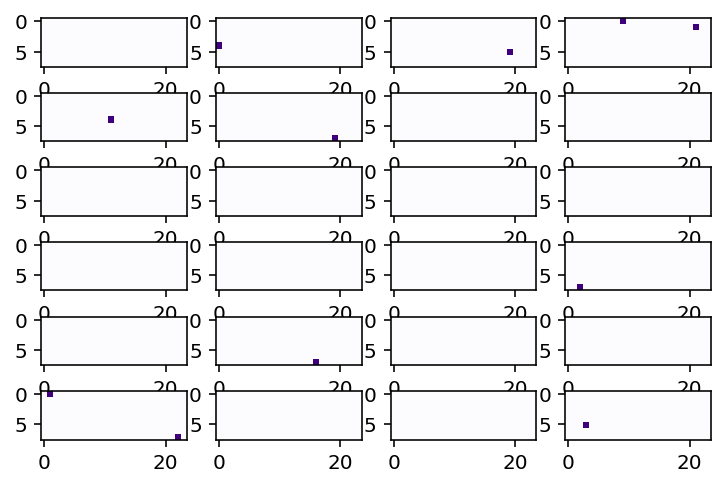

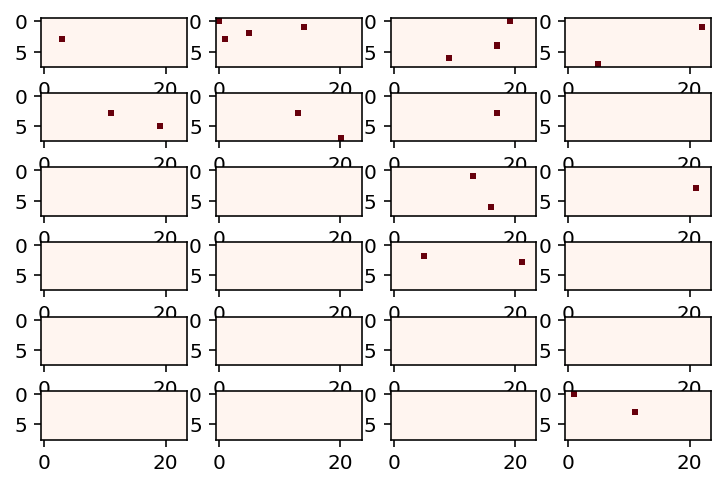

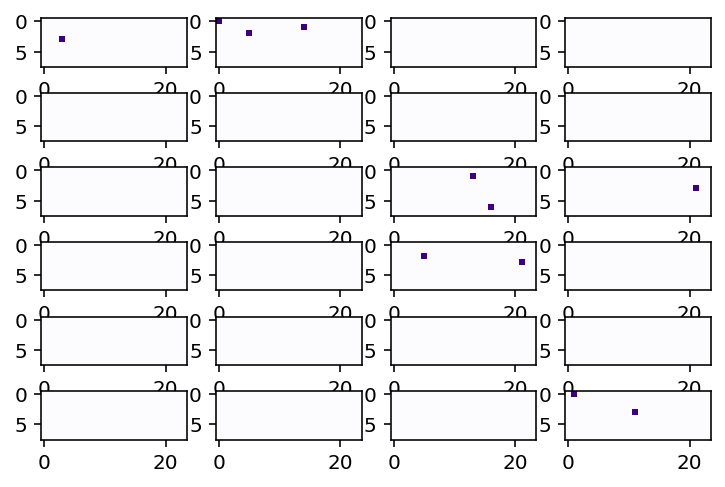

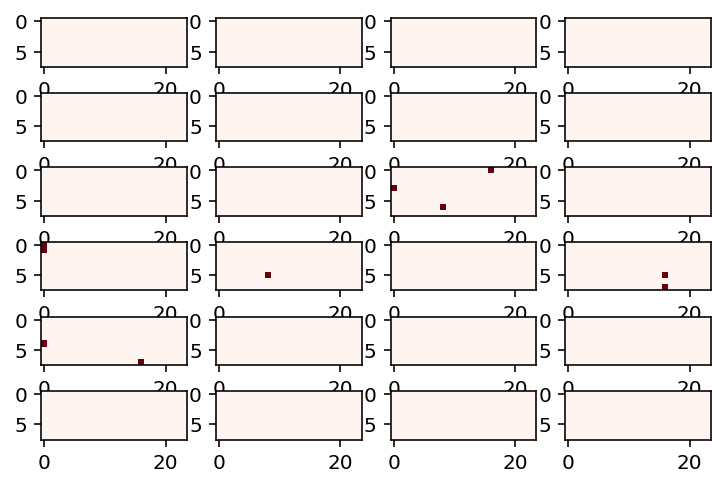

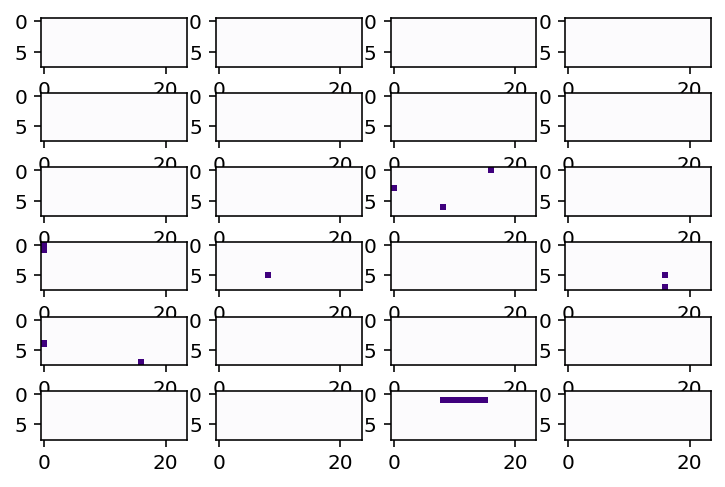

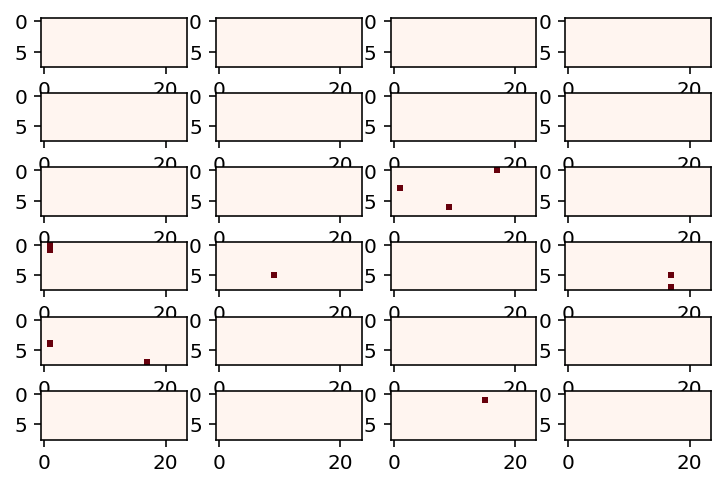

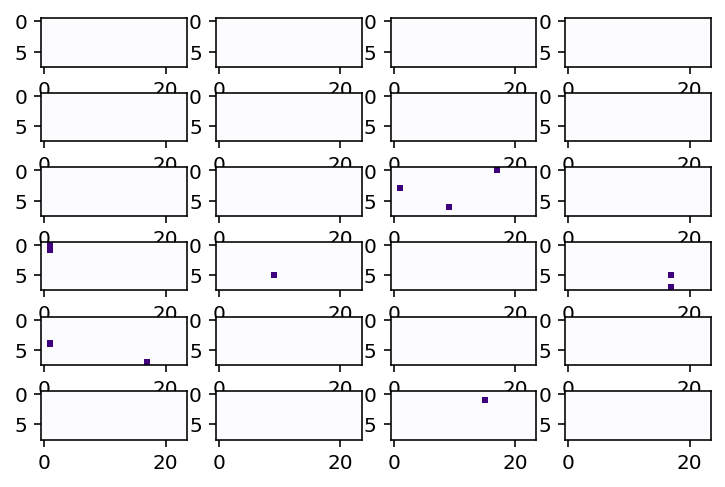

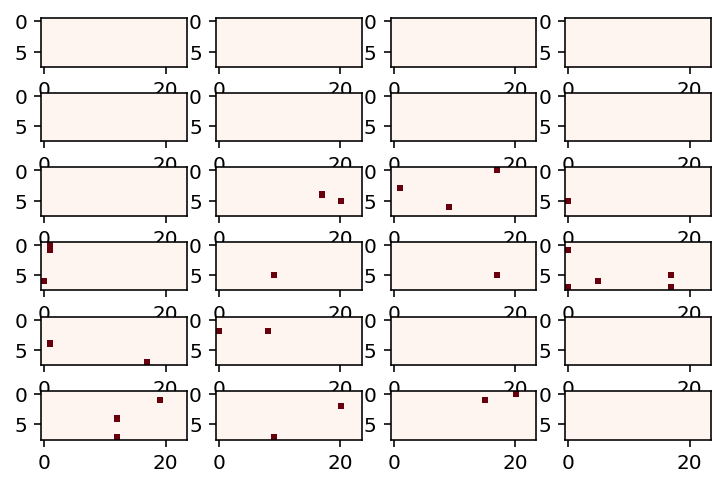

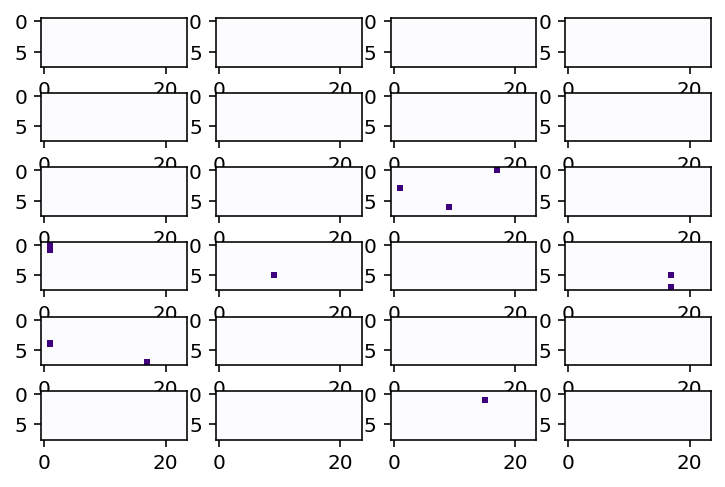

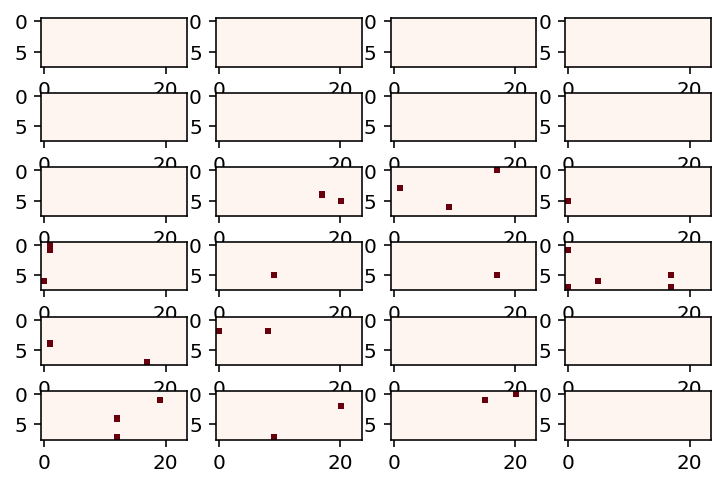

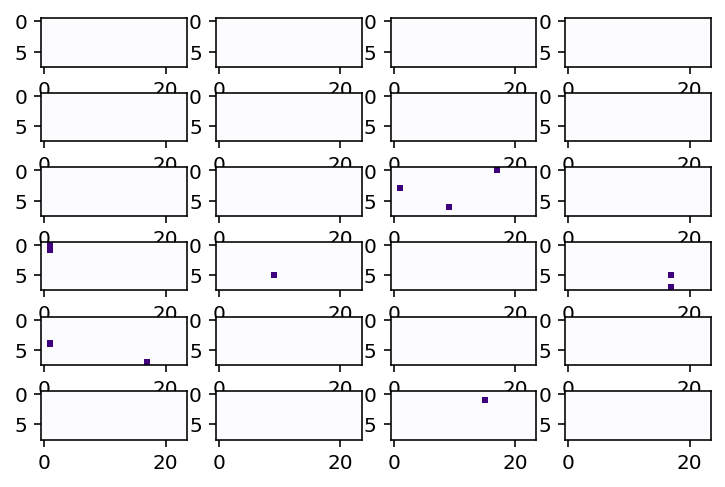

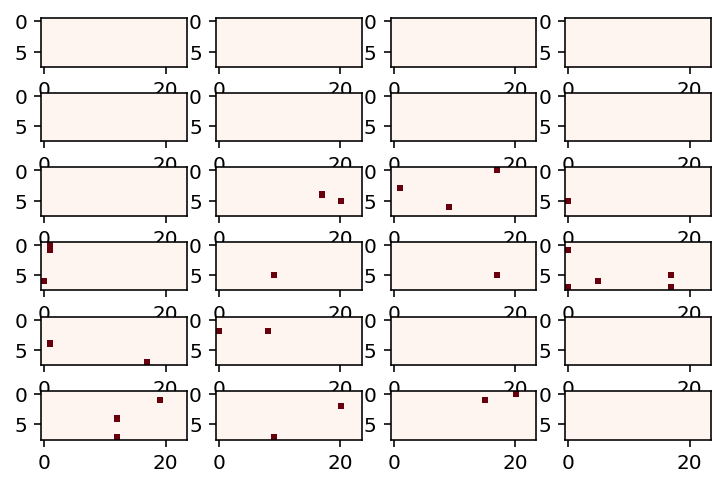

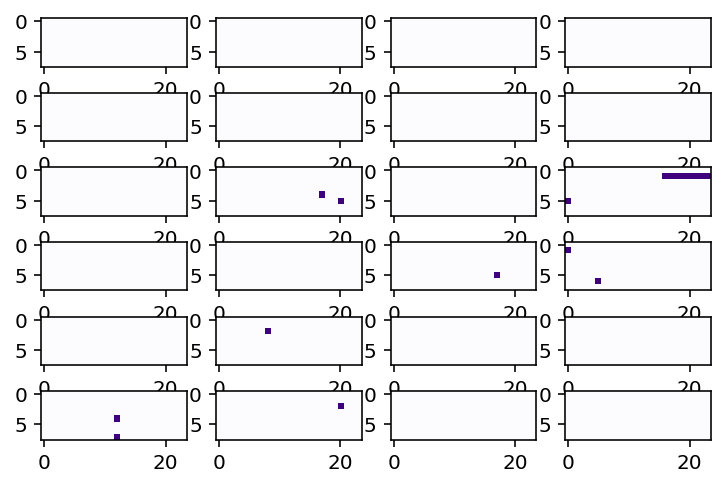

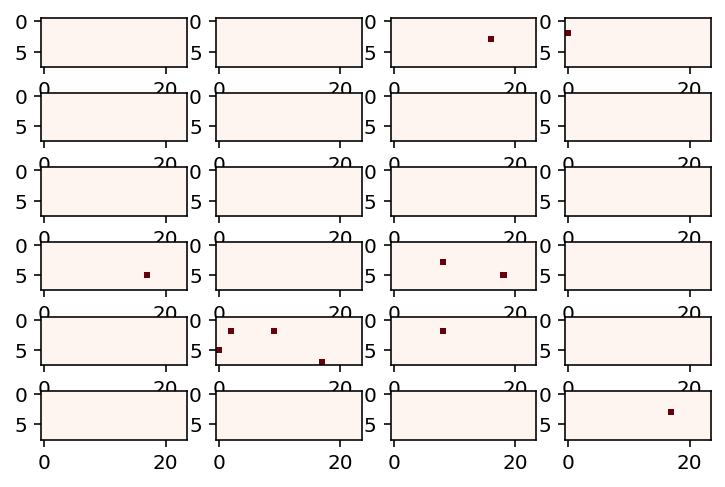

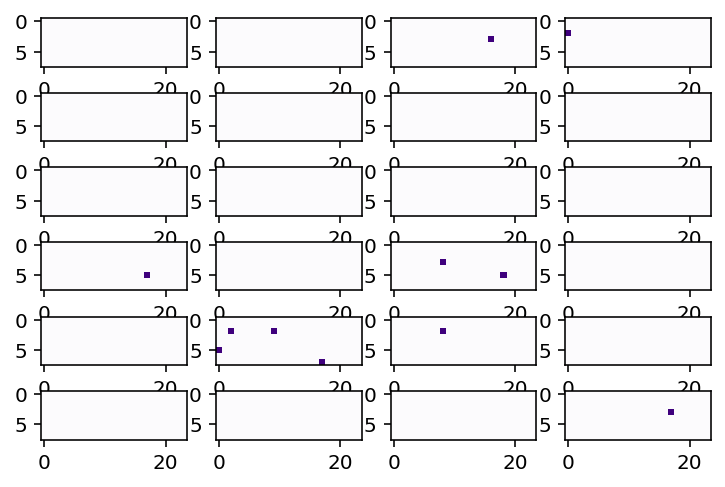

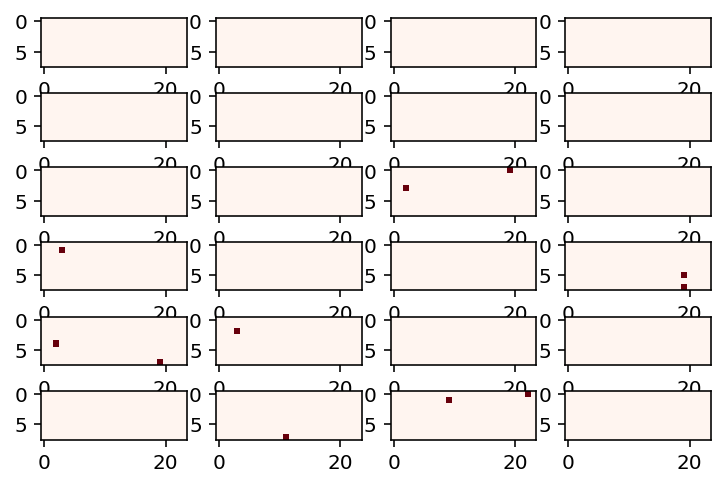

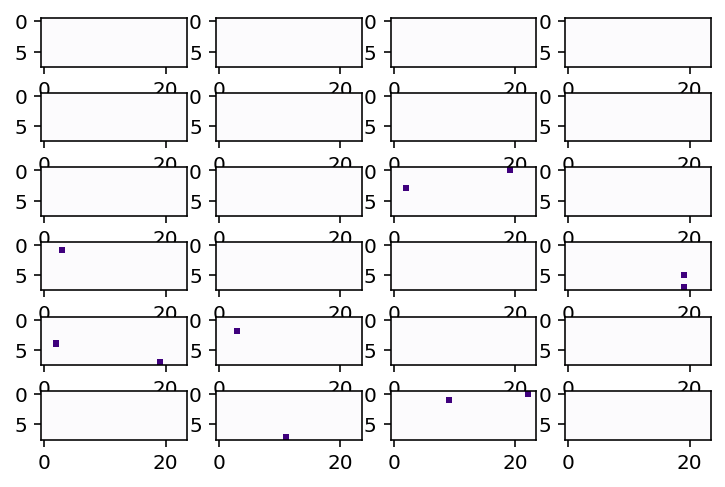

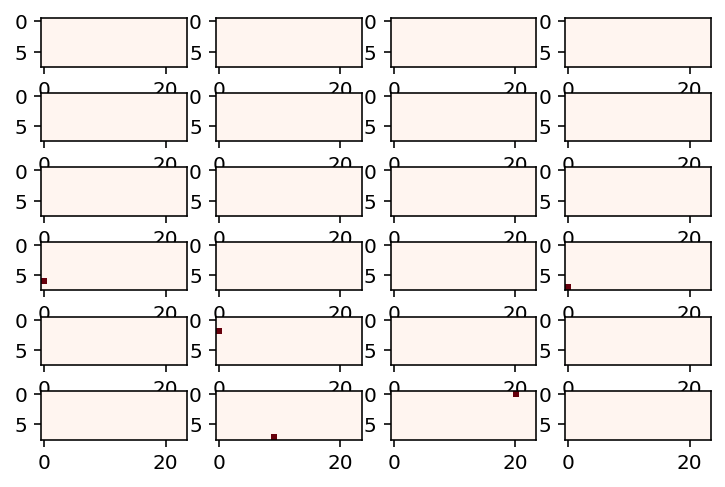

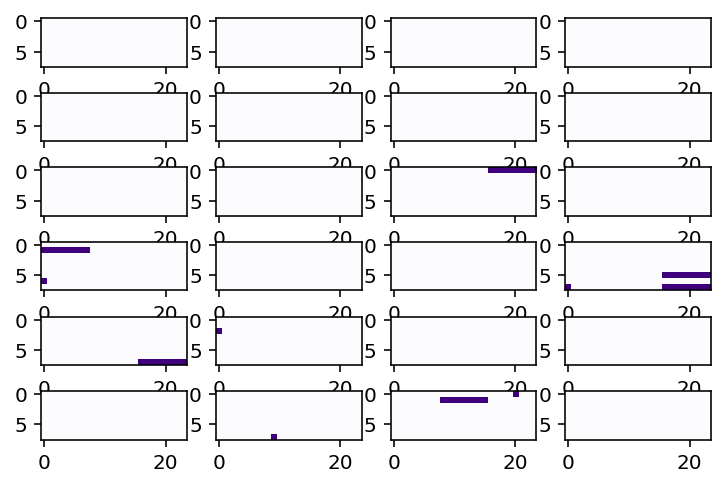

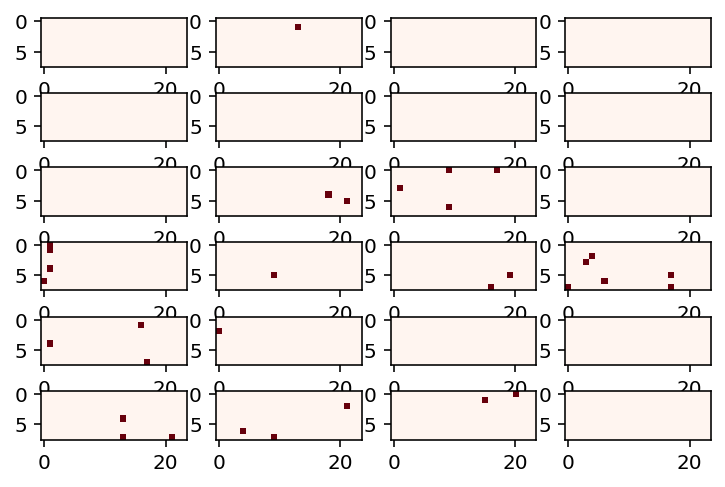

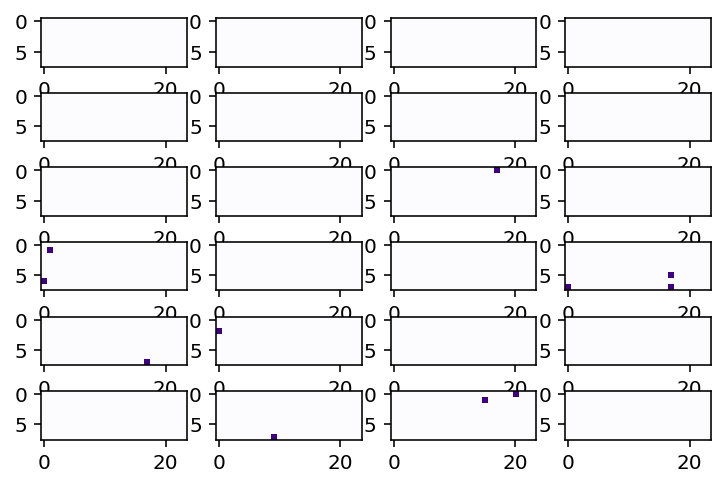

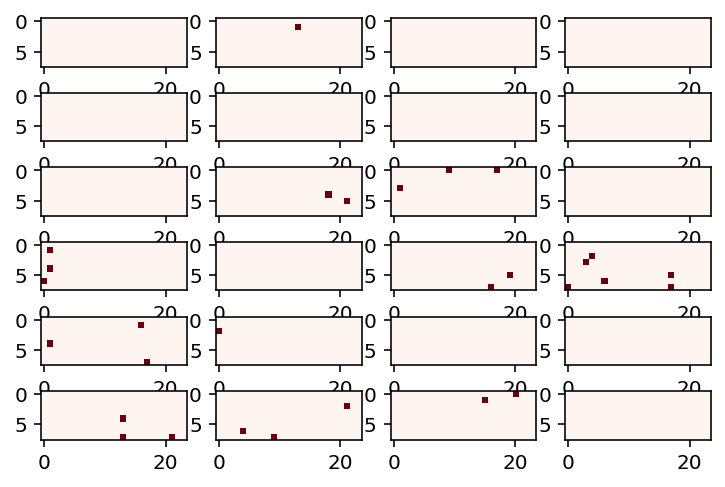

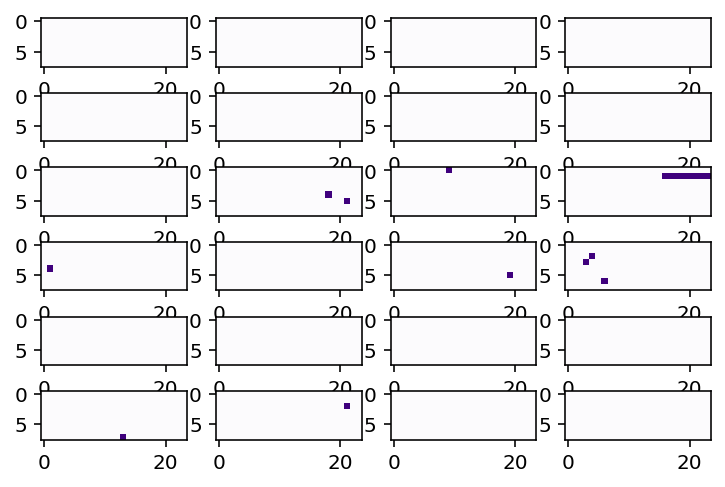

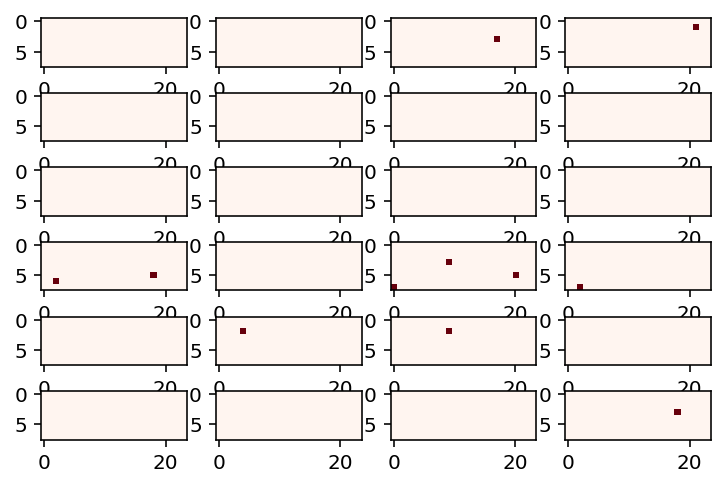

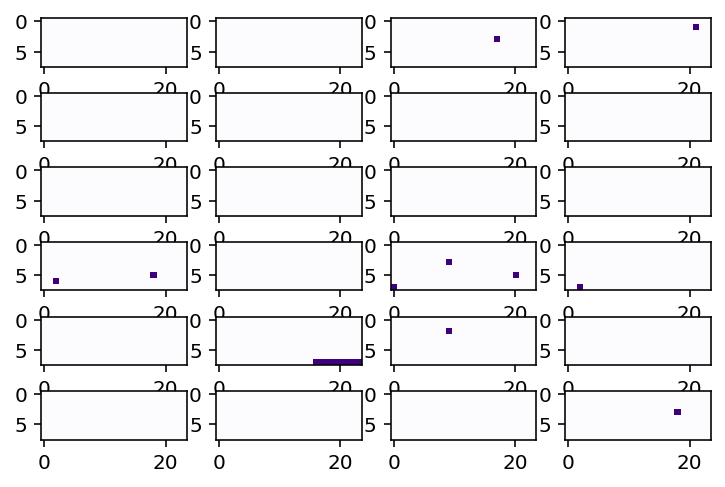

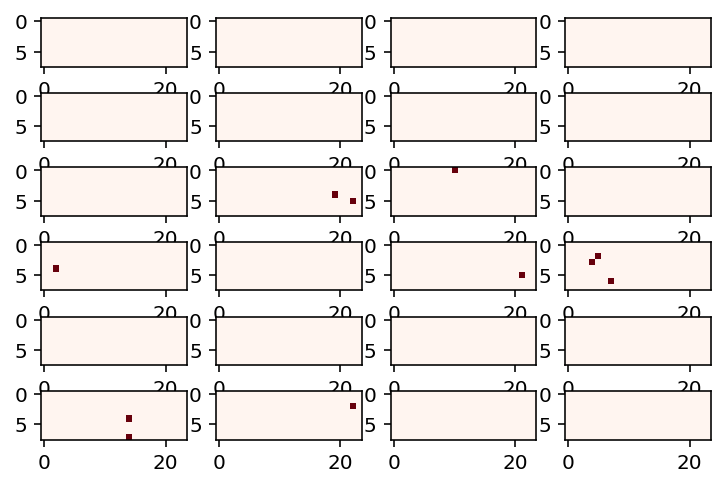

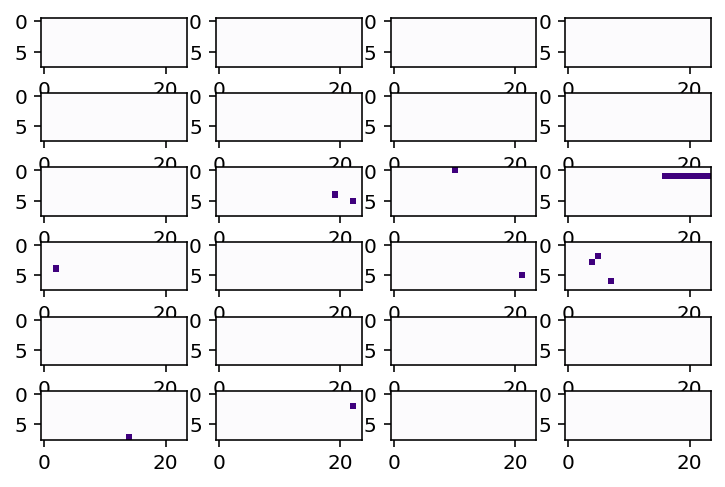

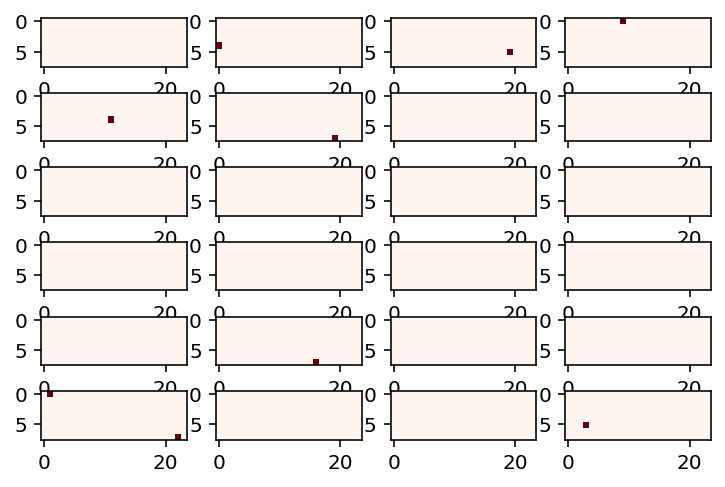

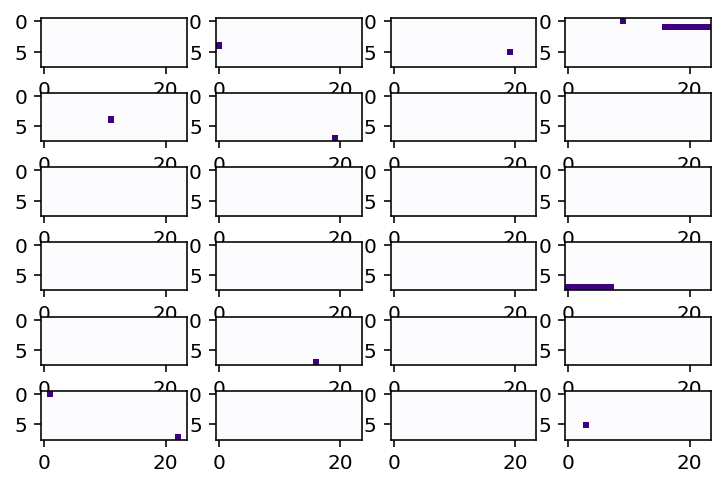

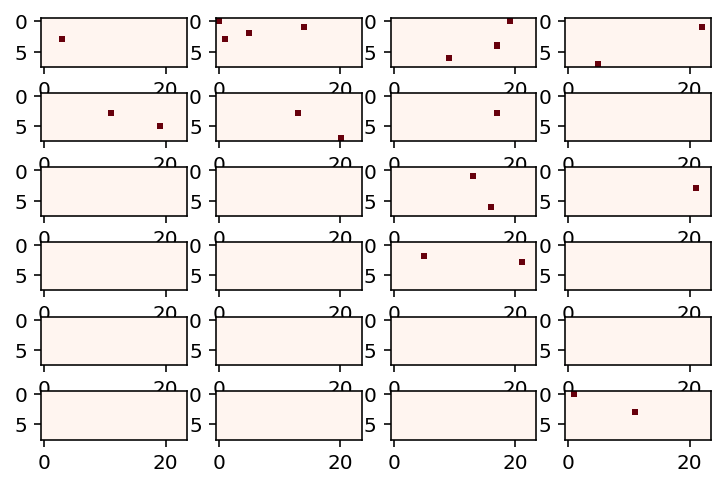

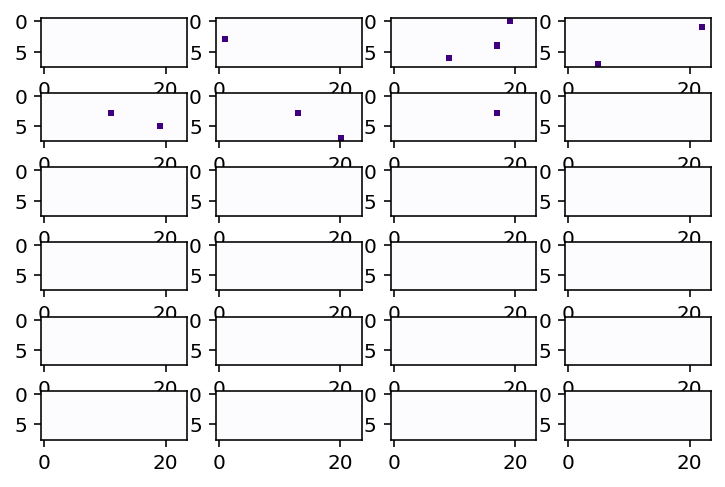

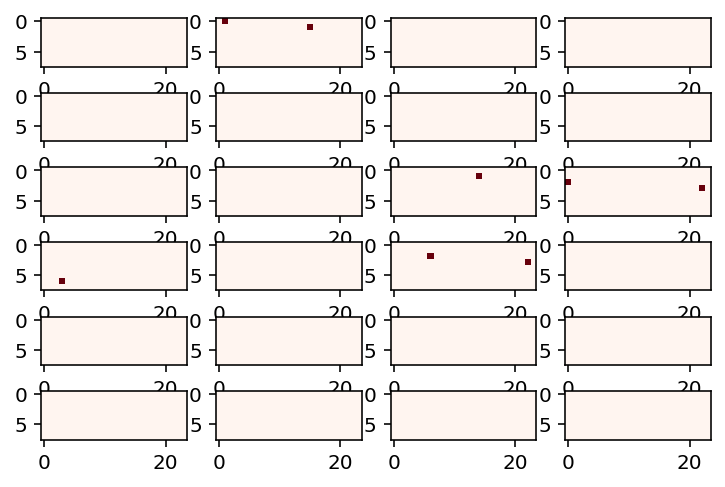

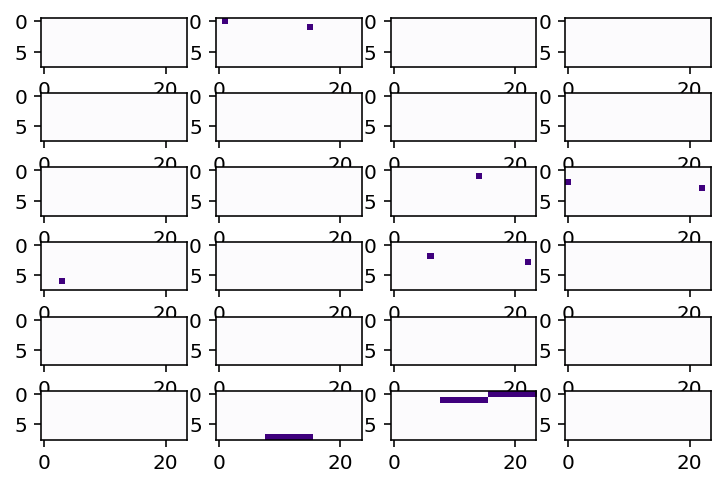

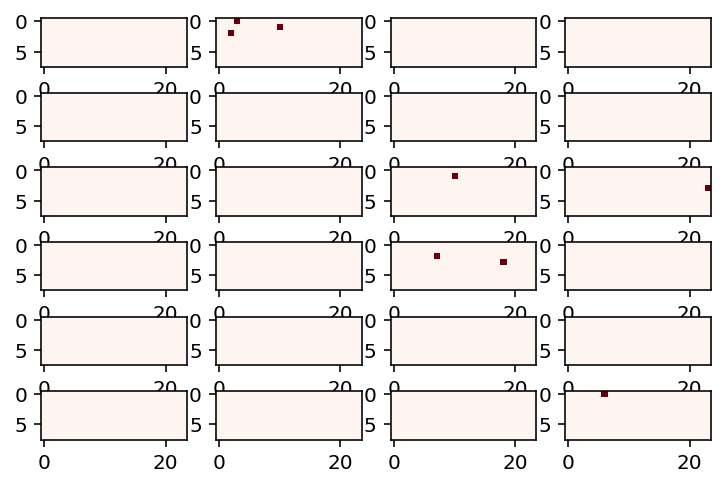

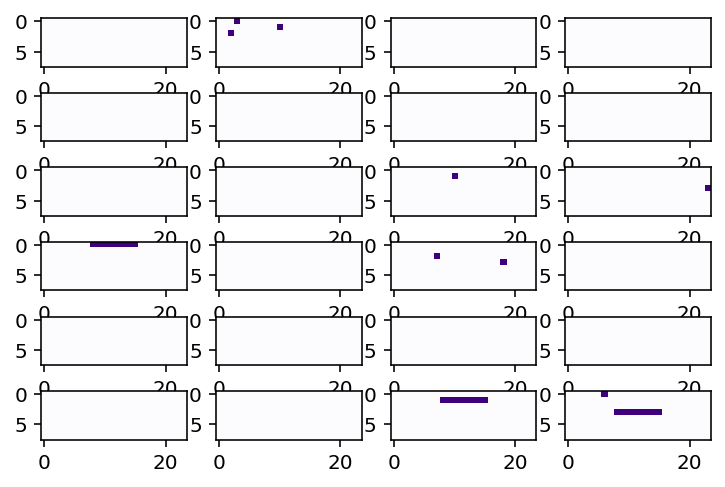

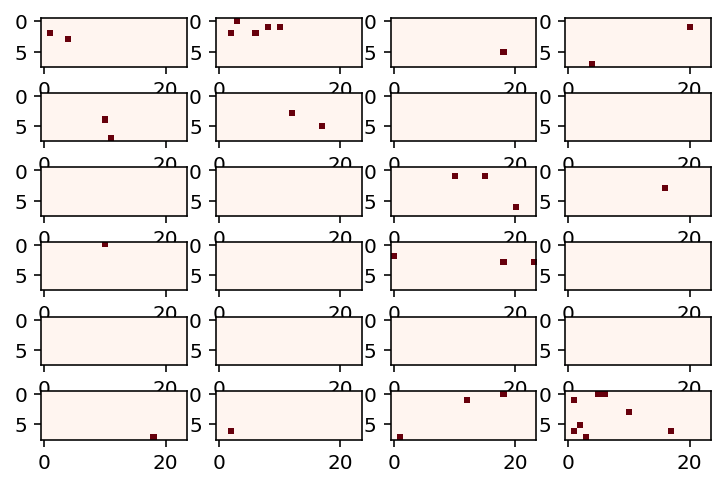

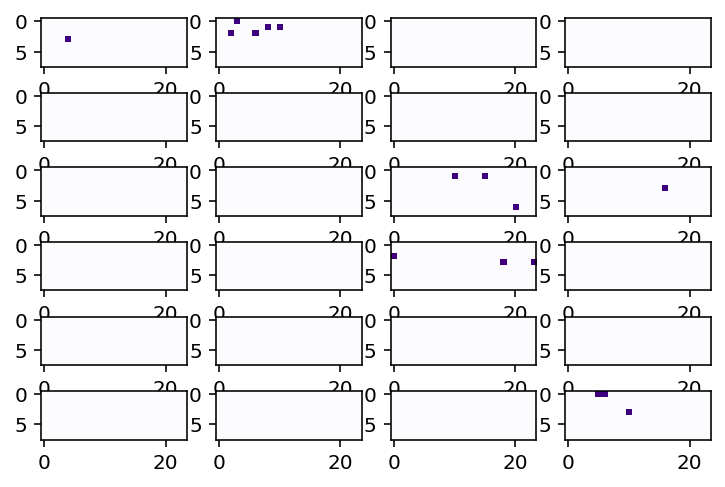

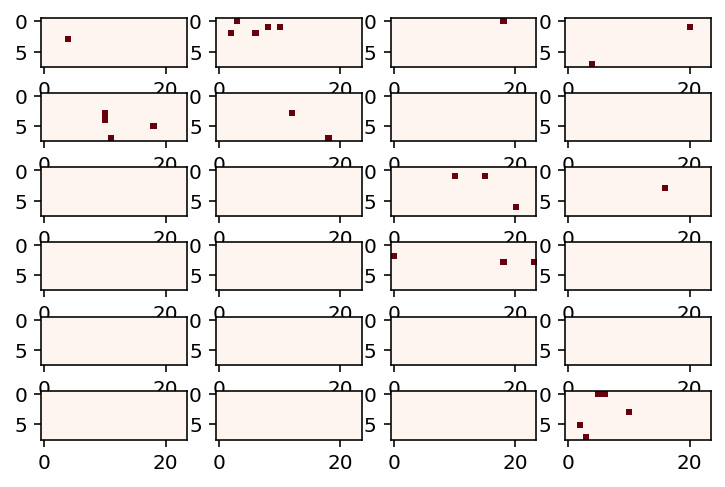

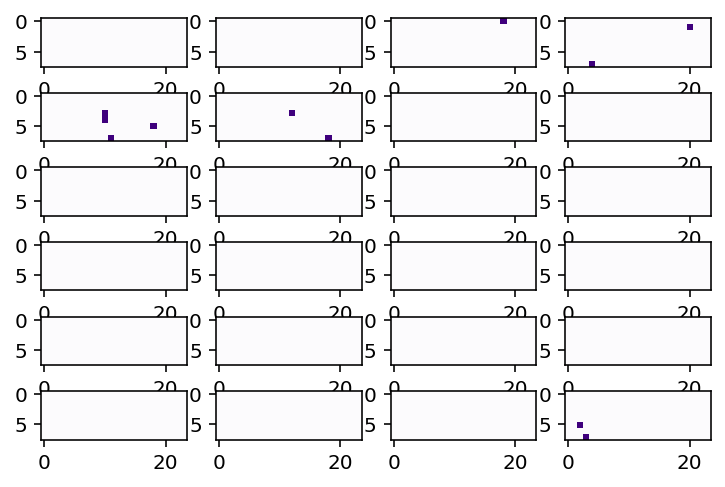

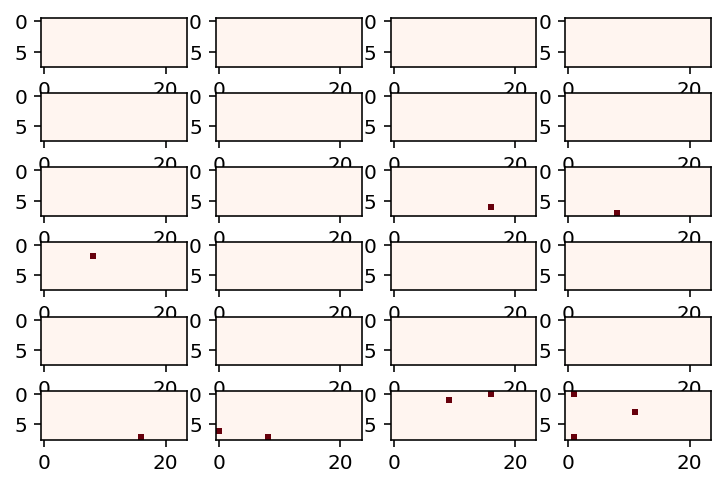

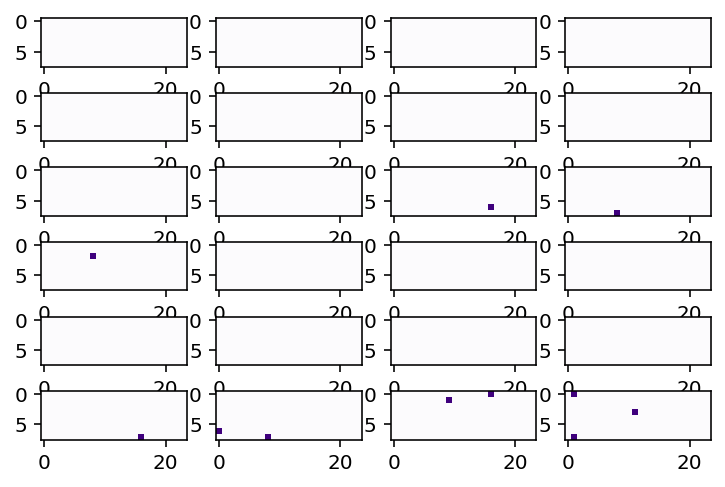

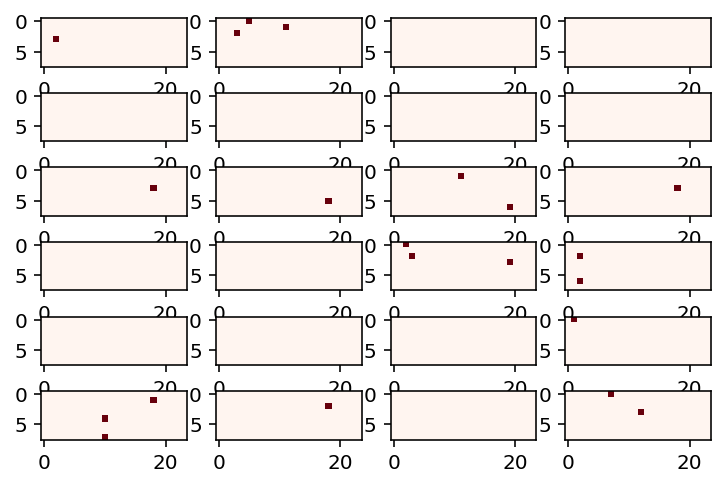

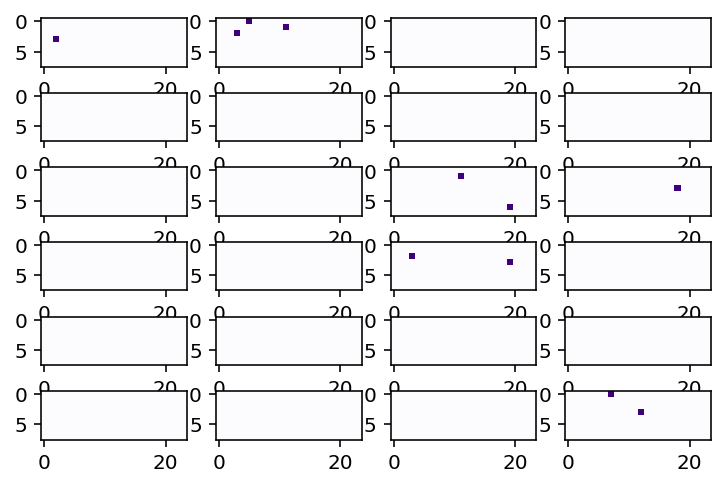

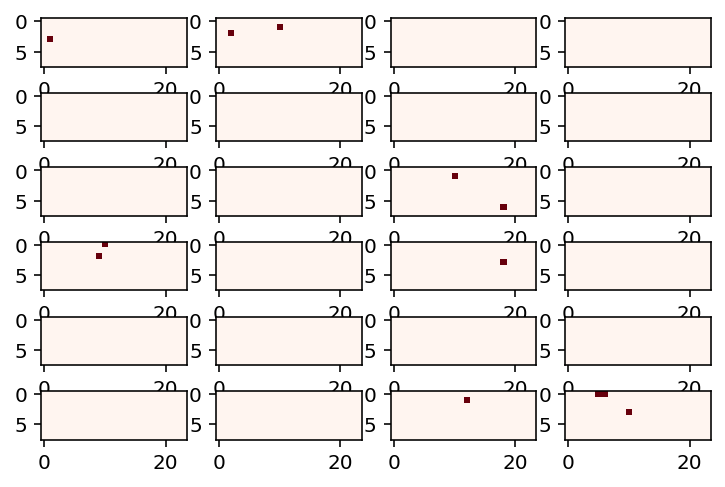

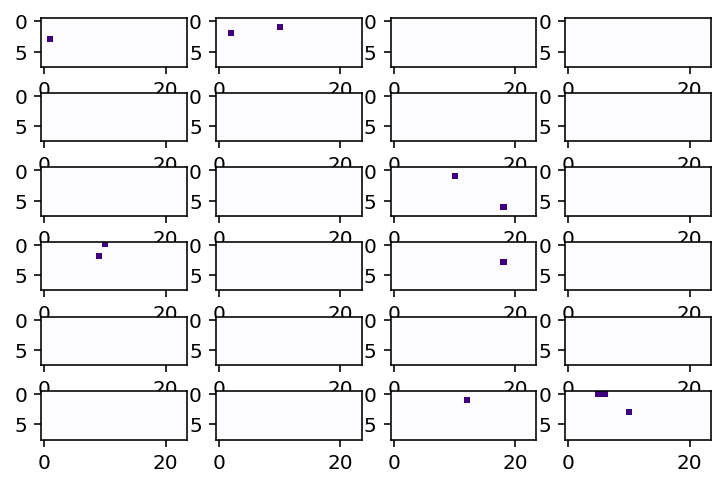

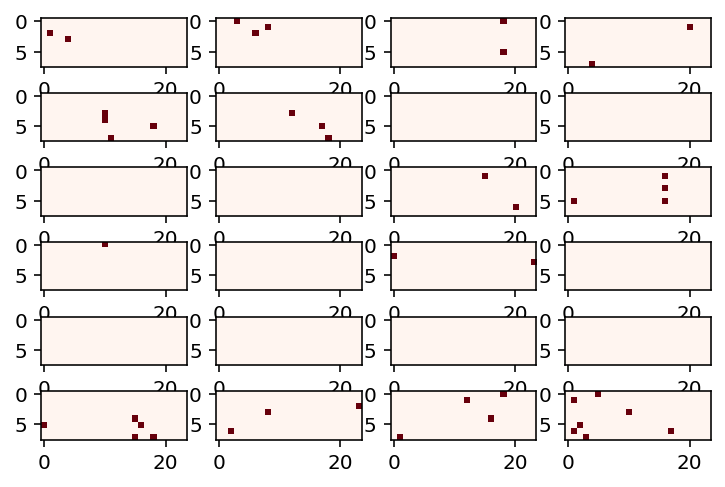

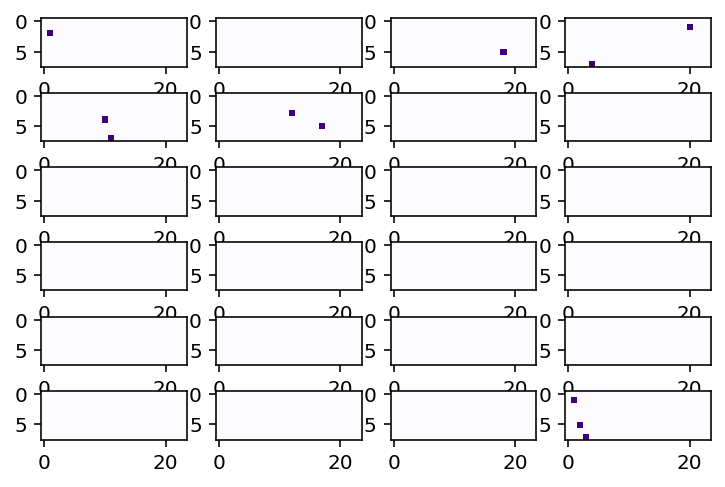

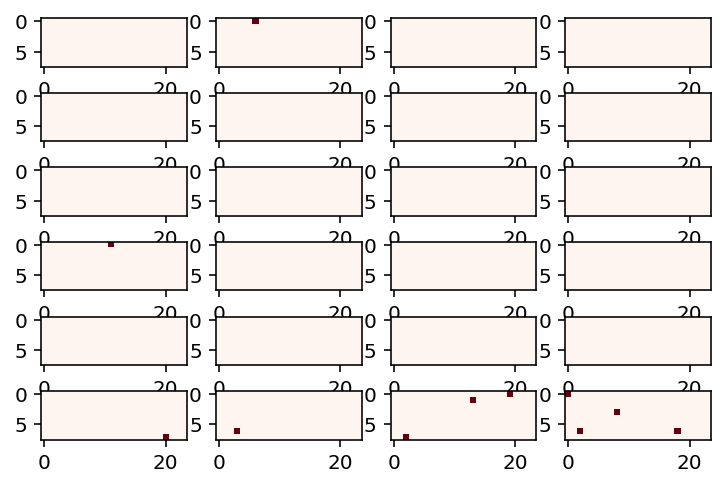

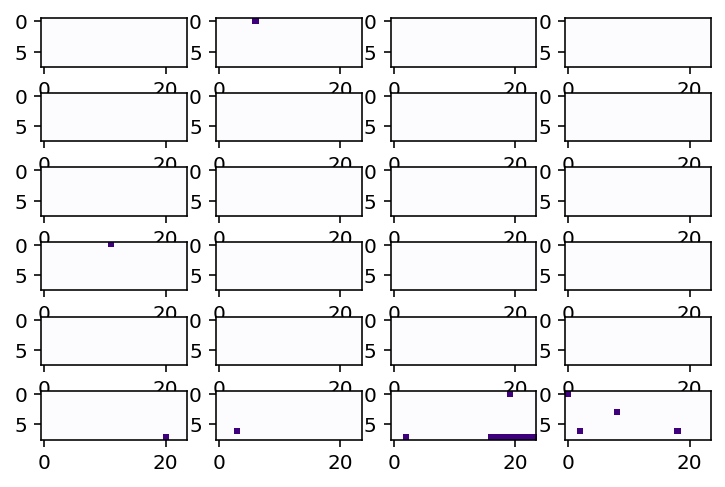

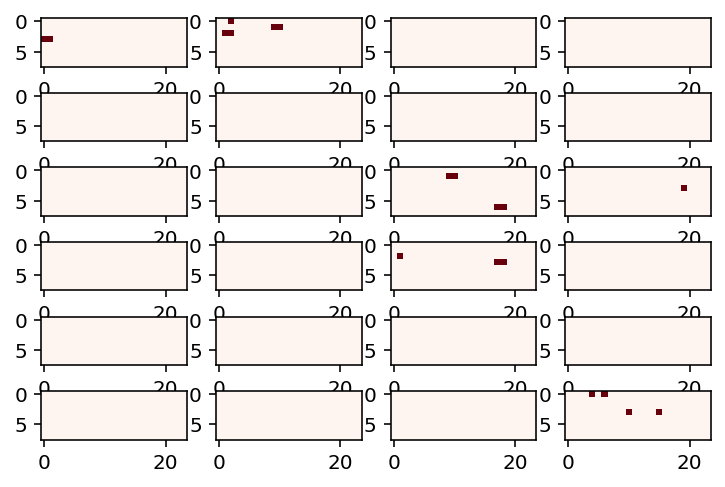

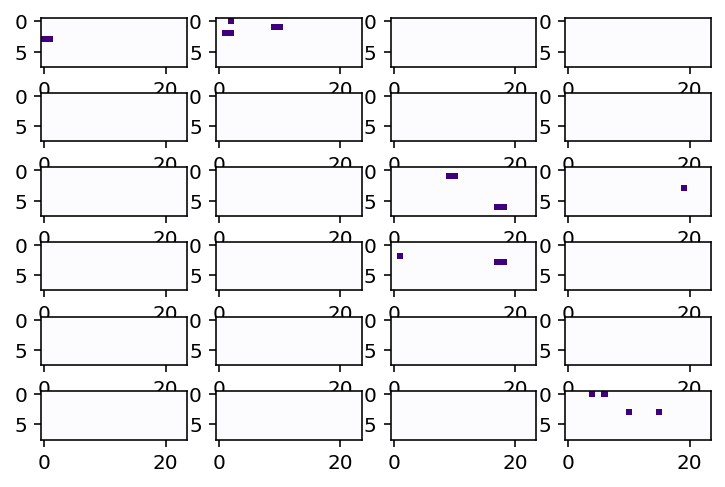

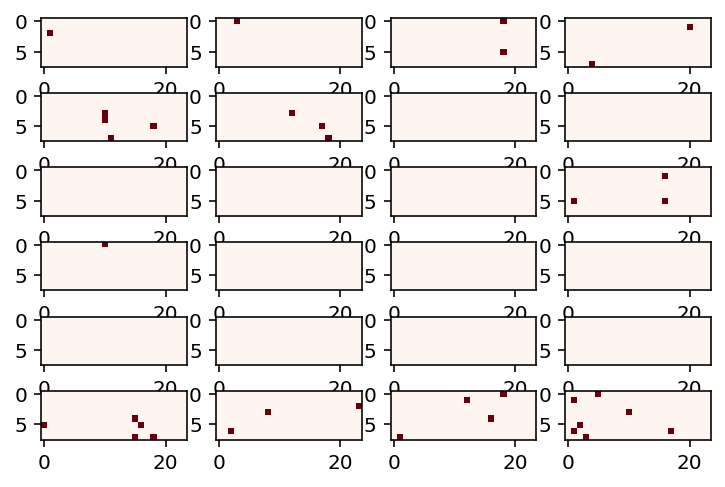

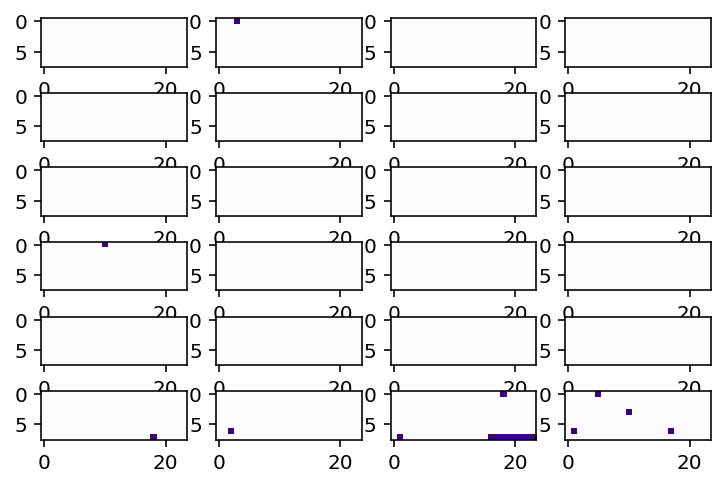

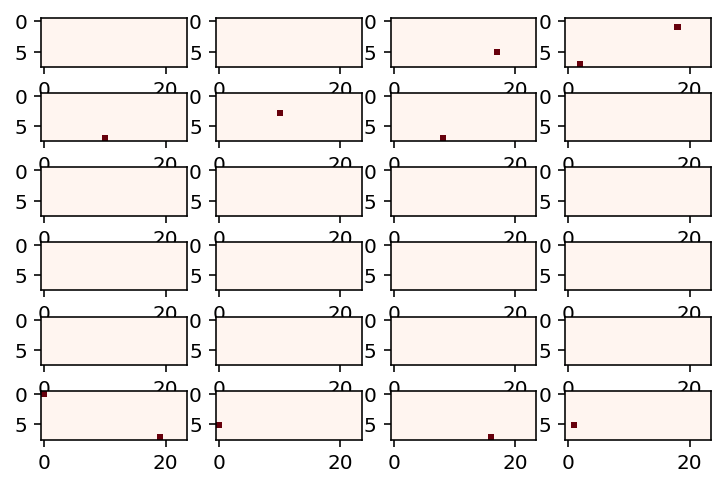

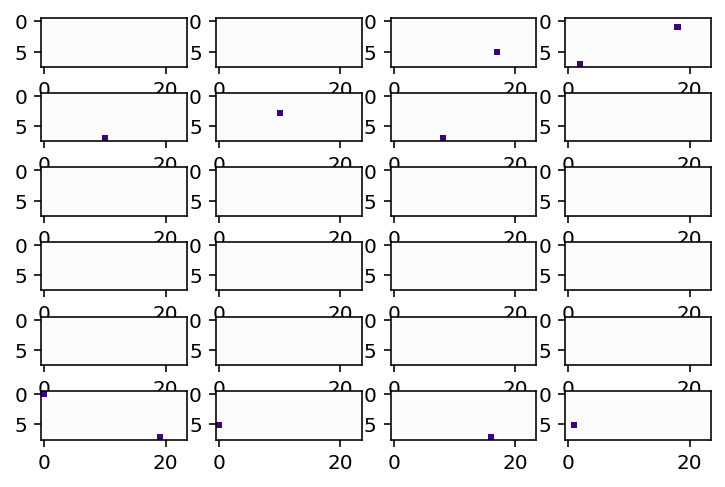

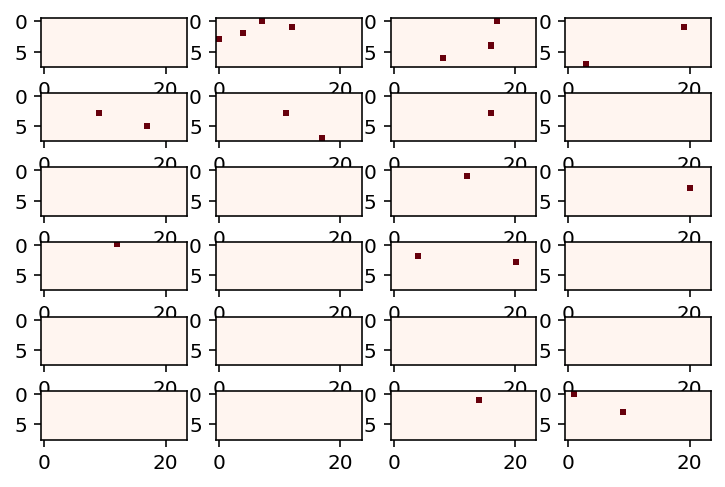

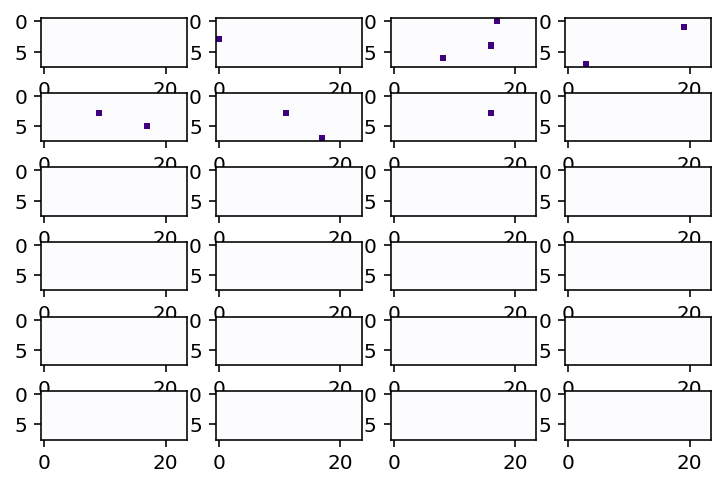

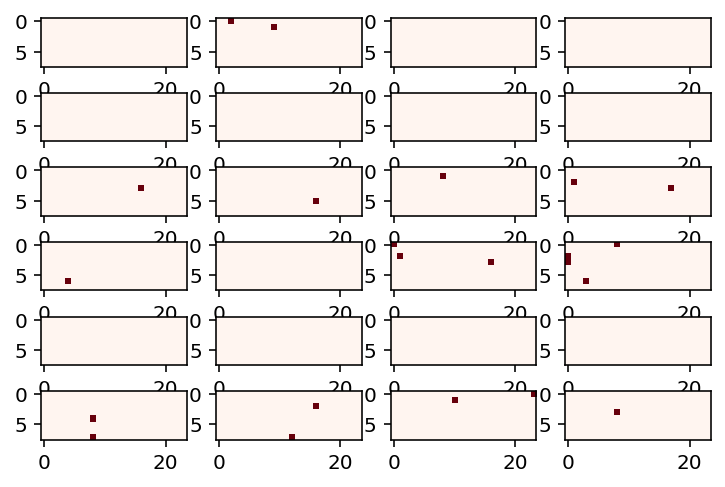

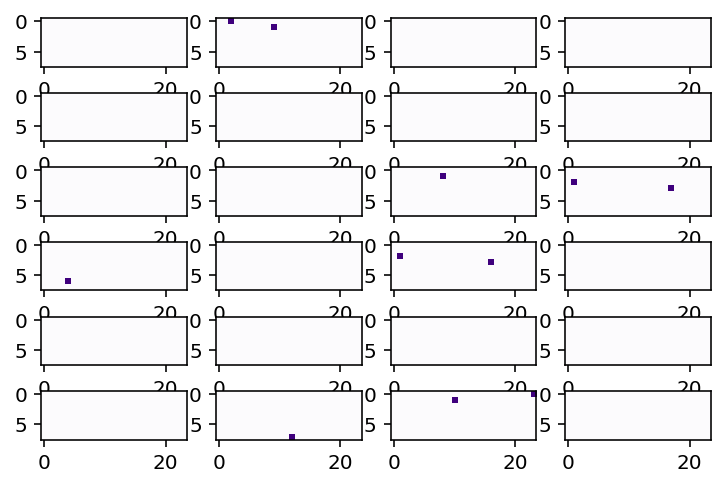

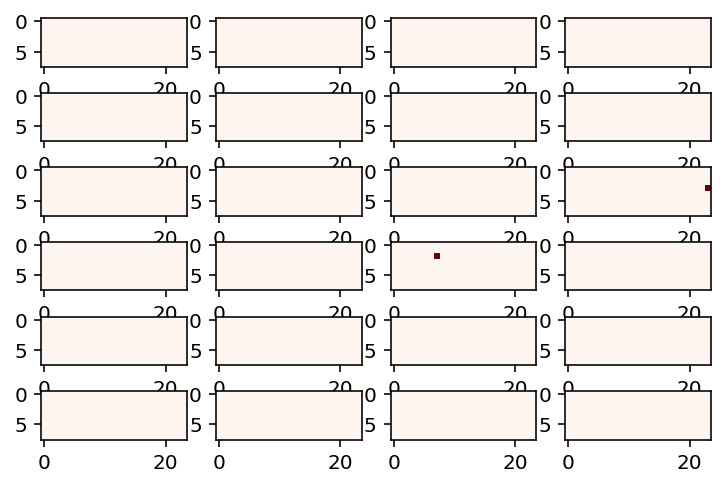

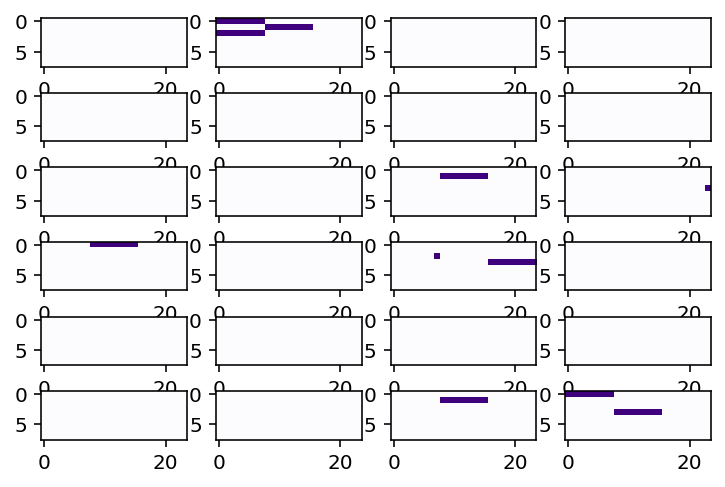

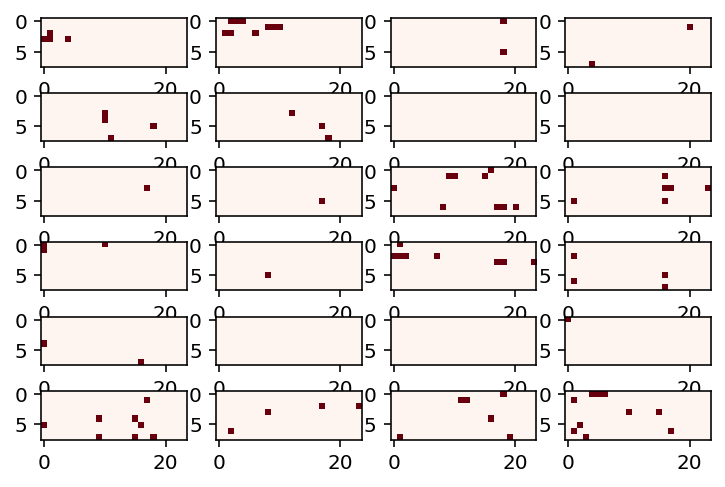

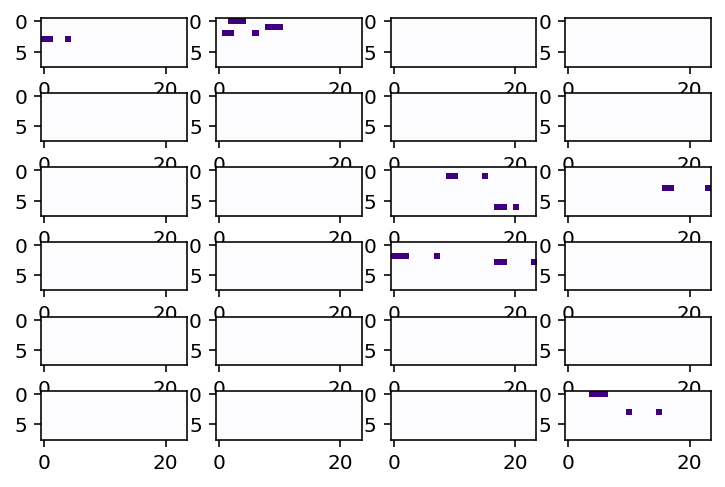

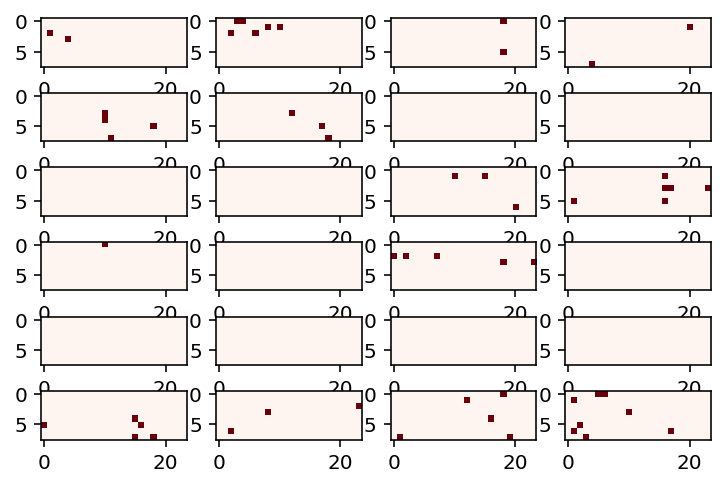

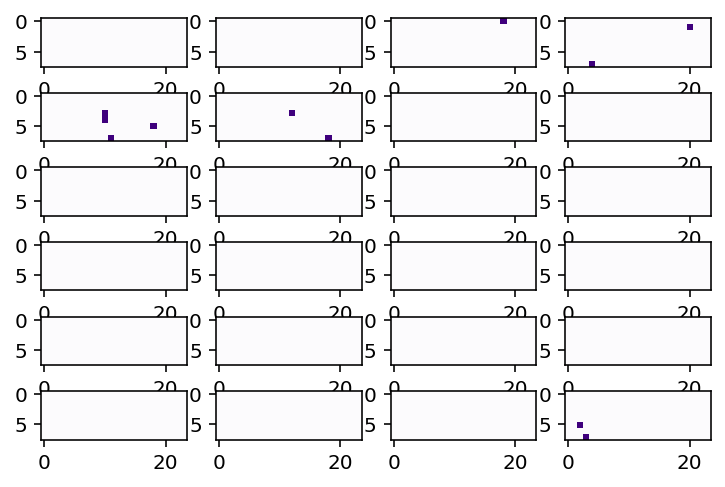

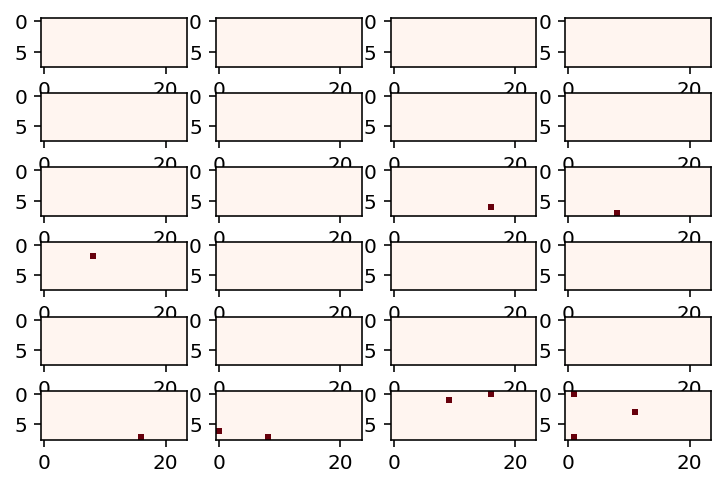

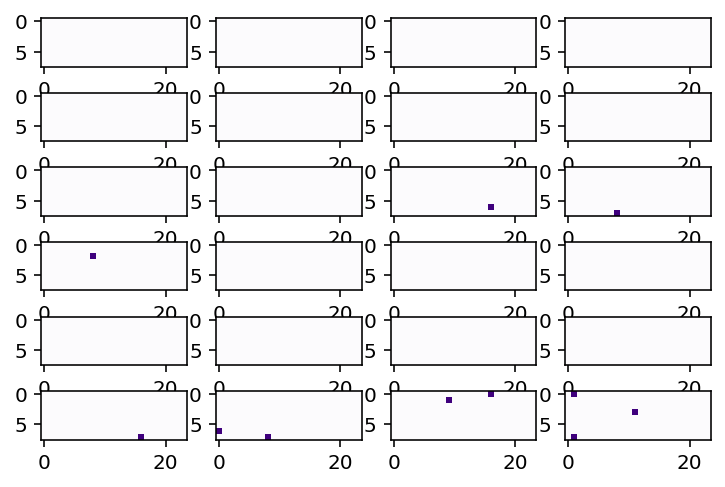

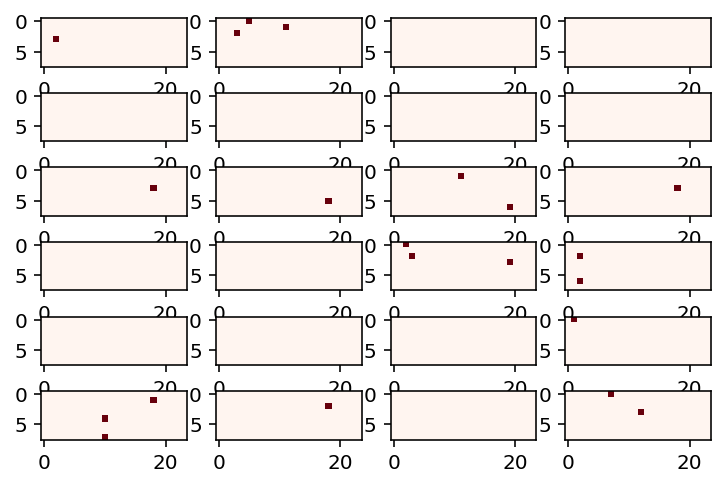

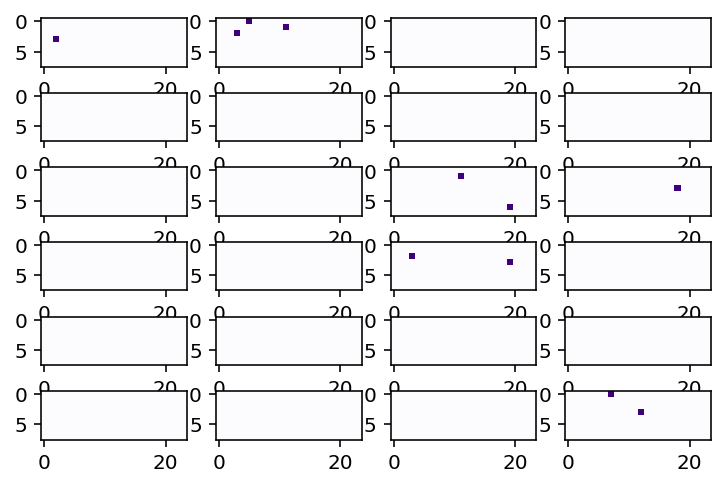

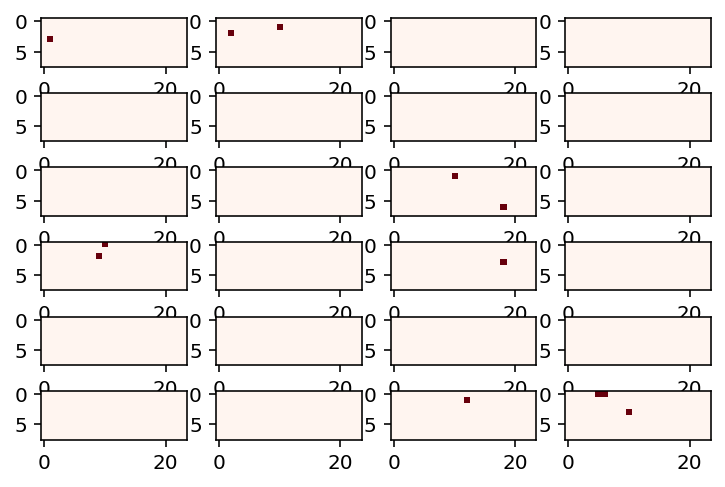

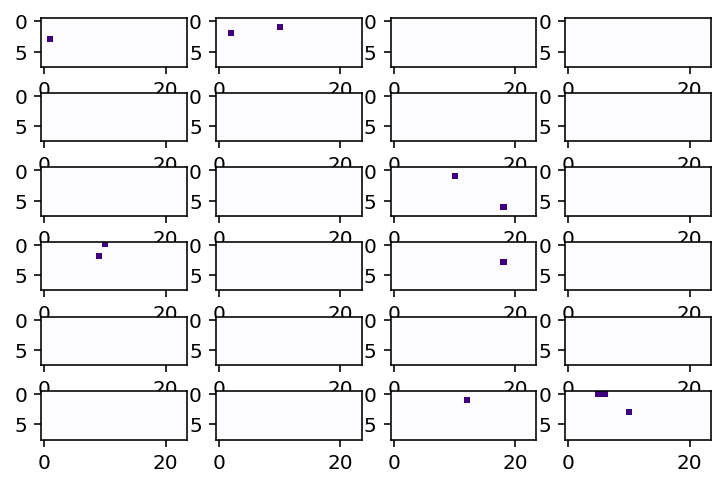

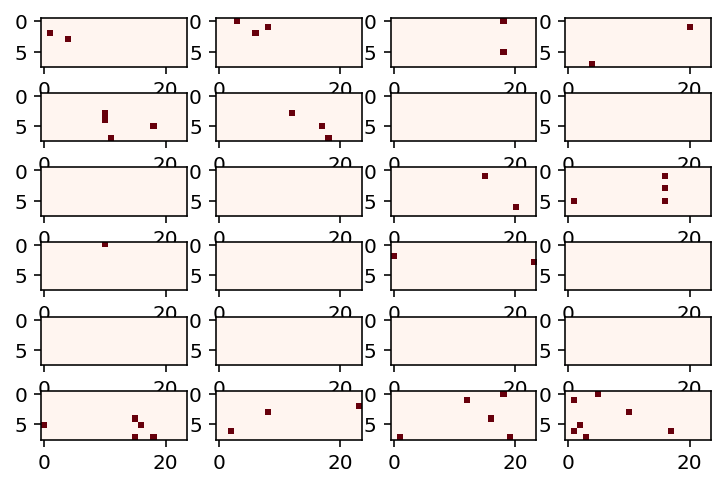

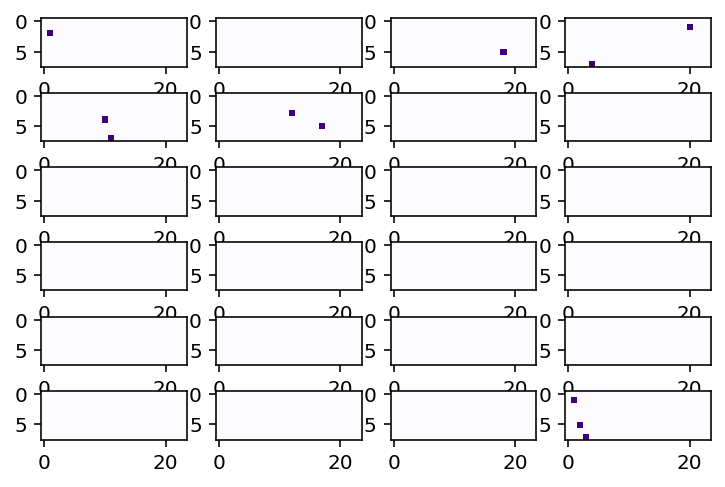

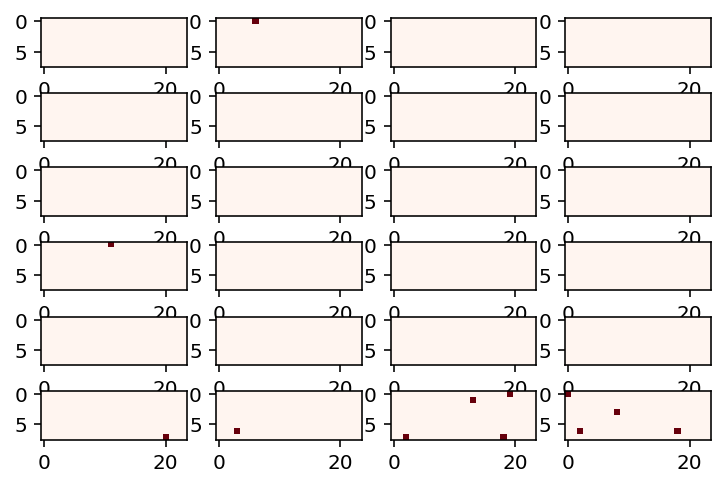

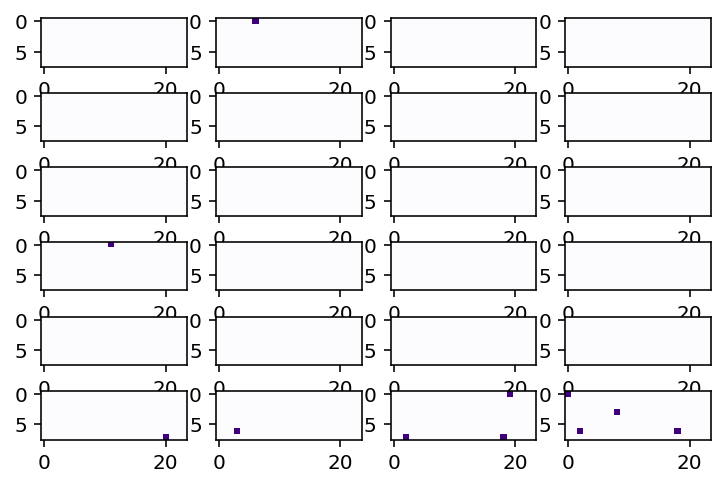

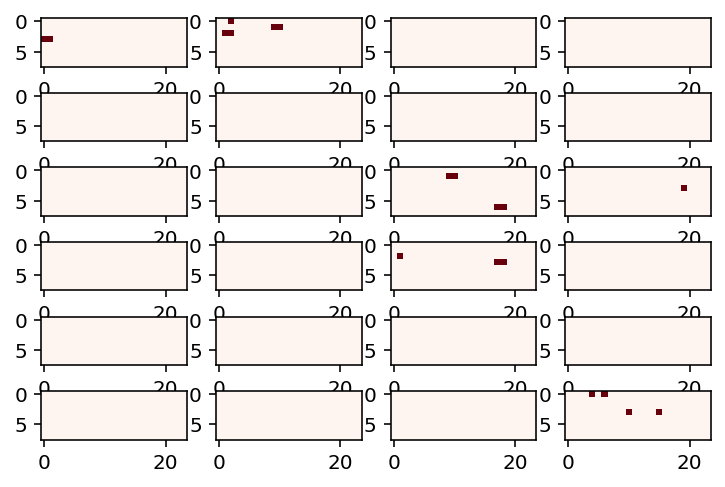

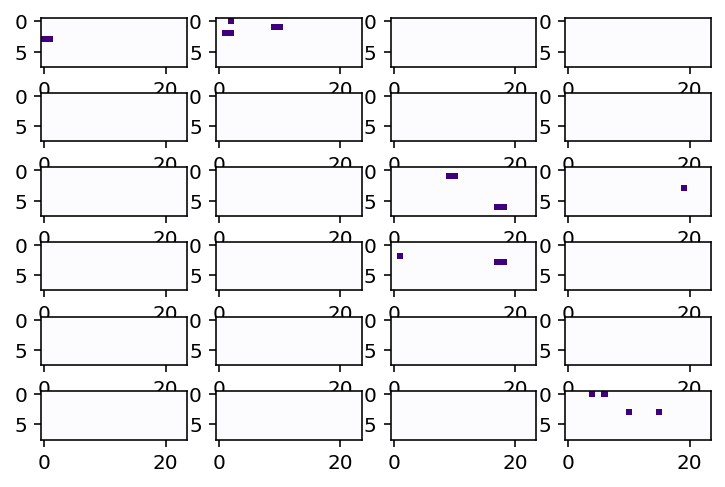

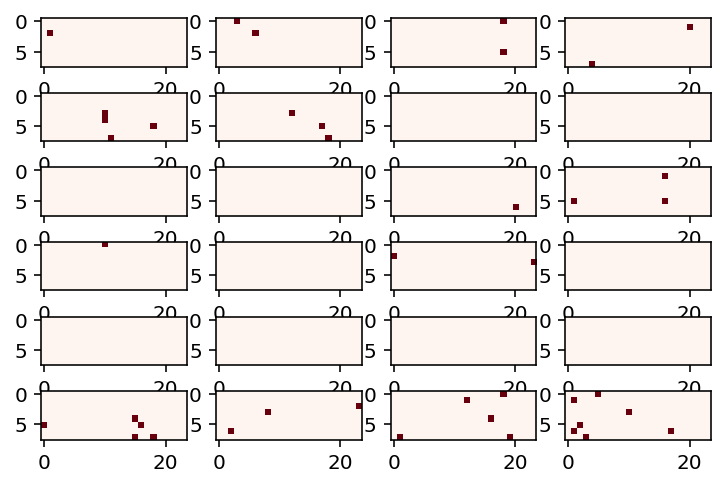

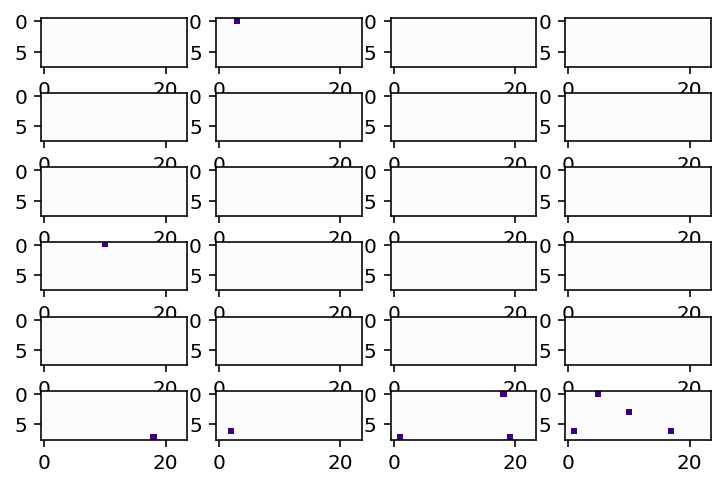

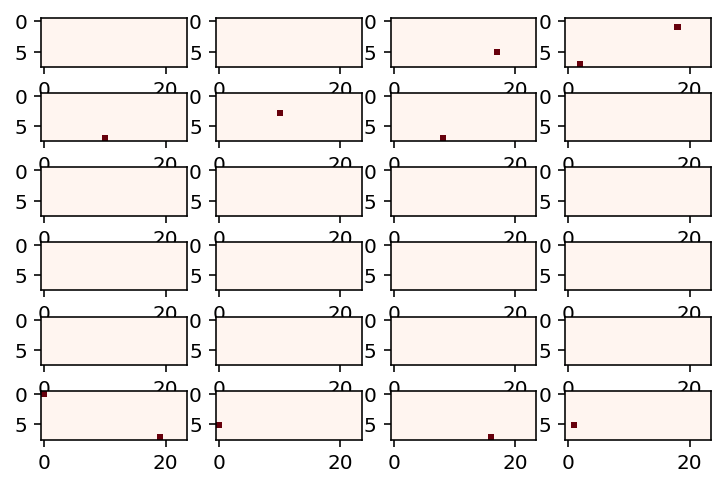

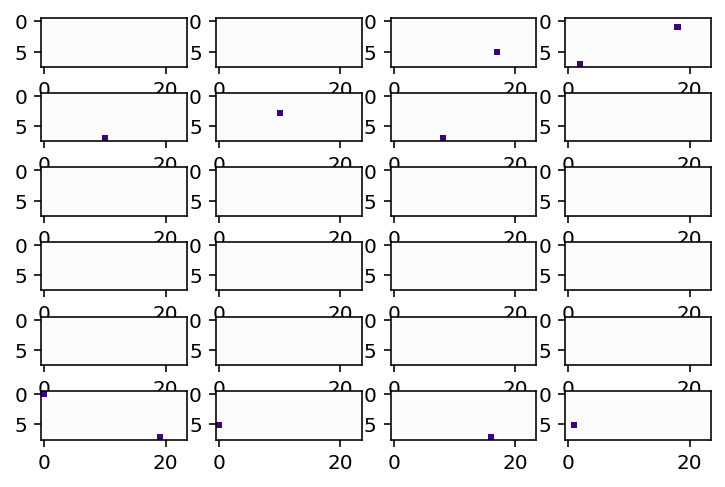

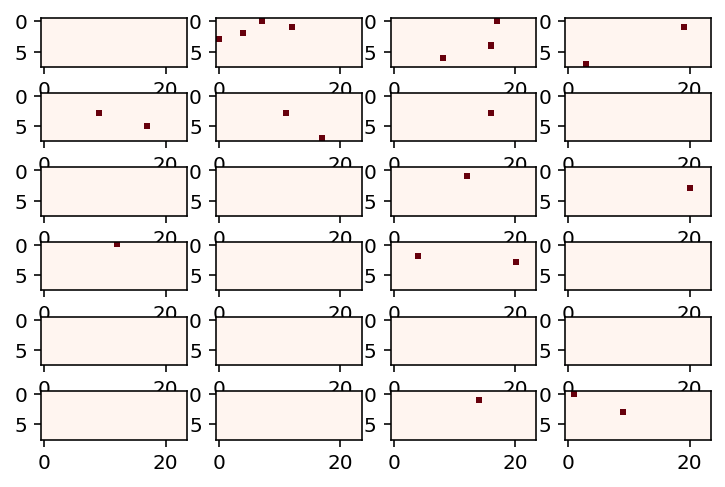

In [12]:
for i in range(len(notes)):
    pitchBits        = encPitch.encode(notes[i][0])
    lengthBits = encLength.encode(notes[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    tm.activateDendrites(True)
    
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

    reshapeActiveCells =tm.getActiveCells().dense.reshape(24,8,24)
    
    #clear_output(wait = True)
    #plt.cla
    for j in range(24):
        plt.subplot(6,4,j+1)
        plt.imshow(reshapeActiveCells[j], cmap = "Purples")
    plt.show()

    reshapePredictCells =tm.getPredictiveCells().dense.reshape(24,8,24)
    
    for j in range(24):
        plt.subplot(6,4,j+1)
        plt.imshow(reshapePredictCells[j], cmap = "Reds")
    plt.show()

In [10]:
pitchPredictor = Predictor( steps=[1,2,3,4,5,6,7], alpha=0.1)
resolution = 1
minimum = 48
lenghPredictor = Predictor( steps=[1,2,3,4,5,6,7], alpha=0.1)
resolution = 0.01
minimum = 0

In [17]:
tm.reset()
print(tm)

Temporal Memory Connections:
    Inputs (462) ~> Outputs (4608) via Segments (491)
    Segments on Cell Min/Mean/Max 0 / 0.106554 / 3
    Potential Synapses on Segment Min/Mean/Max 11 / 18.3727 / 60
    Connected Synapses on Segment Min/Mean/Max 11 / 18.3727 / 60
    Synapses Dead (0%) Saturated (0.280013%)
    Synapses pruned (0%) Segments pruned (0%)



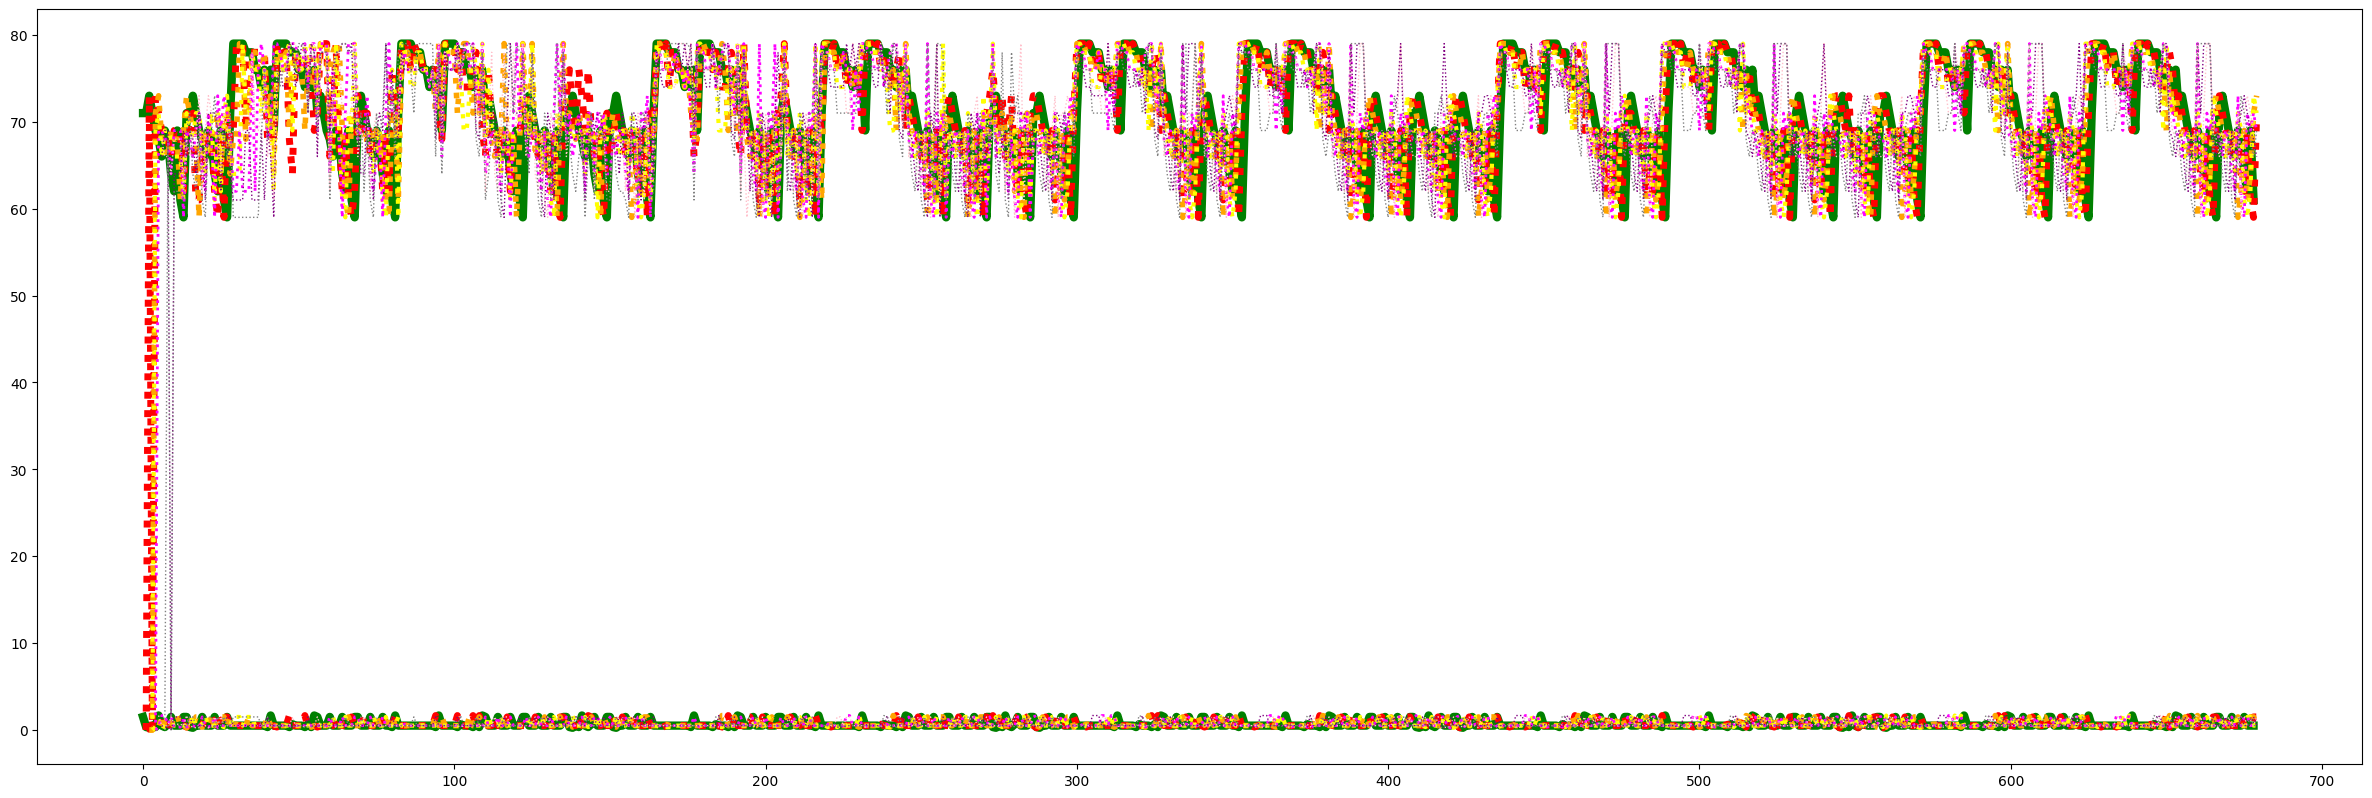

{1: [nan, 0.0, 73.0, 0.0, 73.0, 71.0, 69.0, 68.0, 68.0, 66.0, 69.0, 69.0, 69.0, 62.0, 71.0, 68.0, 71.0, 61.0, 61.0, 66.0, 69.0, 68.0, 68.0, 62.0, 59.0, 68.0, 59.0, 71.0, 68.0, 69.0, 79.0, 79.0, 79.0, 69.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 68.0, 71.0, 68.0, 79.0, 79.0, 78.0, 78.0, 68.0, 64.0, 78.0, 76.0, 76.0, 76.0, 78.0, 76.0, 69.0, 71.0, 79.0, 79.0, 79.0, 66.0, 69.0, 79.0, 68.0, 62.0, 69.0, 61.0, 59.0, 62.0, 73.0, 69.0, 71.0, 71.0, 66.0, 69.0, 68.0, 68.0, 62.0, 69.0, 61.0, 76.0, 71.0, 69.0, 79.0, 79.0, 79.0, 76.0, 79.0, 78.0, 78.0, 76.0, 76.0, 76.0, 76.0, 76.0, 71.0, 68.0, 79.0, 79.0, 79.0, 79.0, 76.0, 78.0, 74.0, 74.0, 74.0, 76.0, 78.0, 76.0, 69.0, 66.0, 76.0, 69.0, 68.0, 66.0, 69.0, 68.0, 68.0, 62.0, 69.0, 69.0, 69.0, 71.0, 73.0, 71.0, 69.0, 68.0, 66.0, 69.0, 68.0, 68.0, 62.0, 69.0, 61.0, 59.0, 71.0, 73.0, 76.0, 71.0, 69.0, 76.0, 73.0, 69.0, 76.0, 69.0, 66.0, 69.0, 61.0, 59.0, 71.0, 66.0, 68.0, 71.0, 69.0, 69.0, 66.0, 69.0, 68.0, 68.0, 62.0, 69.0, 68.0, 59.0, 71.0, 69.0, 79.0, 79

In [12]:
seqPlot=[]
pitchPredictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
lengthPredictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
for j in range(5):
    seqPlot.extend(notes)
    for i in range(len(notes)):
        pitchBits        = encPitch.encode(notes[i][0])
        lengthBits = encLength.encode(notes[i][1])

        inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
        sp.compute(inputSDR, True, activeSDR)

        tm.compute( activeSDR, learn=True)

        pitchPredictor.learn(i+len(notes)*j, tm.getActiveCells() , int((notes[i][0] - minimum) / resolution))

        pitchPdf = pitchPredictor.infer( tm.getActiveCells() )
        for n in (1,2,3,4,5,6,7):
            if pitchPdf[n]:
                pitchPredictions[n].append( np.argmax( pitchPdf[n] ) * resolution + minimum )
            else:
                pitchPredictions[n].append(float('nan'))
        
        lenghPredictor.learn(i+len(notes)*j, tm.getActiveCells() , int((notes[i][1] - minimum) / resolution))

        lengthPdf = lenghPredictor.infer( tm.getActiveCells() )
        for m in (1,2,3,4,5,6,7):
            if lengthPdf[m]:
                lengthPredictions[m].append( np.argmax( lengthPdf[m] ) * resolution + minimum )
            else:
                lengthPredictions[m].append(float('nan'))
        
        clear_output(wait = True)
        plt.cla
        plot = plt.figure(figsize=(30,10),dpi=50)
        plt.plot(seqPlot[0:i+len(notes)*j], color='green', linestyle = "solid", linewidth = 6.0)
        plt.plot(pitchPredictions[1], color='red', linestyle = "dotted", linewidth = 5.0)
        plt.plot(pitchPredictions[2], color='orange', linestyle = "dotted", linewidth = 4.0)
        plt.plot(pitchPredictions[3], color='yellow', linestyle = "dotted", linewidth = 3.0)
        plt.plot(pitchPredictions[4], color='magenta', linestyle = "dotted", linewidth = 2.0)
        plt.plot(pitchPredictions[5], color='pink', linestyle = "dotted", linewidth = 1.0)
        plt.plot(pitchPredictions[6], color='purple', linestyle = "dotted", linewidth = 1.0)
        plt.plot(pitchPredictions[7], color='gray', linestyle = "dotted", linewidth = 1.0)
        plt.plot(lengthPredictions[1], color='red', linestyle = "dotted", linewidth = 5.0)
        plt.plot(lengthPredictions[2], color='orange', linestyle = "dotted", linewidth = 4.0)
        plt.plot(lengthPredictions[3], color='yellow', linestyle = "dotted", linewidth = 3.0)
        plt.plot(lengthPredictions[4], color='magenta', linestyle = "dotted", linewidth = 2.0)
        plt.plot(lengthPredictions[5], color='pink', linestyle = "dotted", linewidth = 1.0)
        plt.plot(lengthPredictions[6], color='purple', linestyle = "dotted", linewidth = 1.0)
        plt.plot(lengthPredictions[7], color='gray', linestyle = "dotted", linewidth = 1.0)
        plt.show()
                
print(pitchPredictions)
print(lengthPredictions)

In [13]:
print(tm)

Temporal Memory Connections:
    Inputs (521) ~> Outputs (4608) via Segments (597)
    Segments on Cell Min/Mean/Max 0 / 0.129557 / 3
    Potential Synapses on Segment Min/Mean/Max 11 / 26.0787 / 153
    Connected Synapses on Segment Min/Mean/Max 11 / 26.0787 / 153
    Synapses Dead (0%) Saturated (0.6195%)
    Synapses pruned (0%) Segments pruned (0%)



In [14]:
#trainNotes[[71, 1.5], [71, 0.333333], [73, 0.25], [71, 0.5], [69, 0.333333], [68, 1.666667], [66, 0.5]]
testNotes =[[71, 2], [71, 0.5], [74, 0.25], [71, 1], [69, 0.25], [68, 1.5], [66, 0.66]]

In [ ]:
s2 = stream.Stream()

for n in range(len(testNotes)):
    noteMidi = testNotes[n][0]
    noteLength=testNotes[n][1]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s2.append(n)

print("Score of testMidi.mid")
s2.show()
s2.write("midi","./data/testMidi.mid")

Score of testMidi.mid


In [ ]:
!python3 play.py "./data/testMidi.mid"

In [17]:
pitchPredictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
lengthPredictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for i in range(len(testNotes)):
    pitchBits        = encPitch.encode(testNotes[i][0])
    lengthBits = encLength.encode(testNotes[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=False)

    pitchPdf = pitchPredictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5,6,7):
        if pitchPdf[n]:
            pitchPredictions[n].append( np.argmax( pitchPdf[n] ) * resolution + minimum )
        else:
            pitchPredictions[n].append(float('nan'))

    lengthPdf = lenghPredictor.infer( tm.getActiveCells() )
    for m in (1,2,3,4,5,6,7):
        if lengthPdf[m]:
            lengthPredictions[m].append( np.argmax( lengthPdf[m] ) * resolution + minimum )
        else:
            lengthPredictions[m].append(float('nan'))
                
print(pitchPredictions)
print(lengthPredictions)

{1: [73.0, 79.0, 71.0, 73.0, 71.0, 66.0, 64.0], 2: [71.0, 79.0, 69.0, 71.0, 69.0, 69.0, 62.0], 3: [69.0, 79.0, 68.0, 69.0, 68.0, 68.0, 69.0], 4: [68.0, 79.0, 66.0, 68.0, 66.0, 64.0, 61.0], 5: [66.0, 78.0, 69.0, 66.0, 69.0, 62.0, 59.0], 6: [69.0, 78.0, 68.0, 69.0, 68.0, 69.0, 71.0], 7: [68.0, 78.0, 64.0, 68.0, 64.0, 61.0, 71.0]}
{1: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5], 2: [0.5, 0.5, 0.33, 0.5, 0.33, 0.5, 0.5], 3: [0.5, 0.5, 1.6600000000000001, 0.5, 1.6600000000000001, 0.5, 0.5], 4: [1.5, 0.5, 0.5, 1.5, 0.5, 1.5, 0.5], 5: [0.5, 0.5, 0.5, 0.5, 0.33, 0.5, 1.5], 6: [0.5, 0.5, 0.5, 0.5, 0.66, 0.5, 1.5], 7: [0.5, 0.5, 1.5, 0.5, 1.5, 0.5, 0.33]}


In [18]:
nextPitchPredictions=[]
for i in range(len(testNotes)):
    nextPitchPredictions.append(pitchPredictions[i+1][len(testNotes)-1]) 
print(nextPitchPredictions)

nextLengthPredictions=[]
for i in range(len(testNotes)):
    nextLengthPredictions.append(lengthPredictions[i+1][len(testNotes)-1]) 
print(nextLengthPredictions)

[64.0, 62.0, 69.0, 61.0, 59.0, 71.0, 71.0]
[1.5, 0.5, 0.5, 0.5, 1.5, 1.5, 0.33]


Score of predictMidi.mid


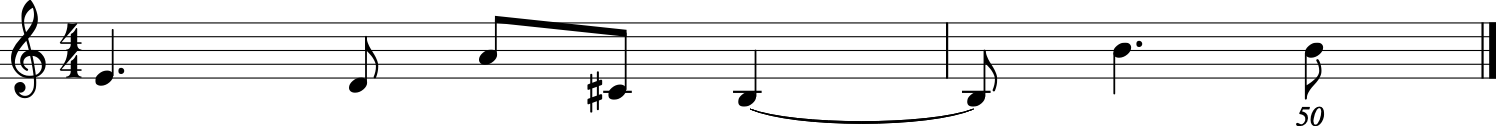

'./data/predictMidi.mid'

In [19]:
s3 = stream.Stream()
    
for n in range(len(nextPitchPredictions)):
    noteMidi = nextPitchPredictions[n]
    noteLength=nextLengthPredictions[n]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s3.append(n)

print("Score of predictMidi.mid")
s3.show()
s3.write("midi","./data/predictMidi.mid")

In [25]:
!python3 play.py "./data/predictMidi.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file ./data/predictMidi.mid loaded!
